# Exploring the NYT-Article Dataframe (including NLP-Cluster)

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## Importing the dataframes

In [126]:
data_clean = pd.read_csv('NYT_Australia_articles_cleaned.csv')

In [127]:
data_nytcluster = pd.read_csv('NYT_Australia_articles_NLPcluster.csv')

In [128]:
data_ea = pd.concat([data_clean,data_nytcluster['cluster']],axis=1)

In [129]:
data_ea.head()

source                                           headline   keyword1  \
0    NYT       Tensions Over Racism Rock Australian Netball  Australia   
1    NYT  After Years of ‘Hell’ in ISIS Detention Camp, ...     others   
2    NYT          How Australia Fell Behind on Data Privacy     others   
3    NYT  New Crack in Apple’s Armor as Dozens Strike at...     others   
4    NYT  Rising Waters Again Force Evacuations and Spre...  Australia   

    keyword2   keyword3    pub_date news_desk  section_name type_of_material  \
0     others     others  2022-10-30   Foreign         World             News   
1     others  Australia  2022-10-29   Foreign         World             News   
2     others     others  2022-10-21   Foreign         World             News   
3  Australia     others  2022-10-18  Business  Business Day             News   
4     others     others  2022-10-15   Foreign         World             News   

   word_count  month  year  cluster  
0        1321     10  2022        4  
1         910     10  2022        4  
2        1054     10  2022        4  
3        1165     10  2022        3  
4         395     10  2022        4

In [130]:
data_ea.shape

(12818, 13)

## Re-adjusting the Dataframe

In [131]:
# New column with values for a full year:
data_ea['pub_date'] = pd.to_datetime(data_ea['pub_date'], errors='coerce')

In [132]:
new_list = []
for i in range(len(data_ea)):
    if ((data_ea['month'][i] <= 10) & (data_ea['year'][i] == 2022)) | (data_ea['month'][i] >= 11) & (data_ea['year'][i] == 2021):
        new_list.append(1)
    elif ((data_ea['month'][i] <= 10) & (data_ea['year'][i] == 2021)) | (data_ea['month'][i] >= 11) & (data_ea['year'][i] == 2020):
        new_list.append(2)
    elif ((data_ea['month'][i] <= 10) & (data_ea['year'][i] == 2020)) | (data_ea['month'][i] >= 11) & (data_ea['year'][i] == 2019):
        new_list.append(3)
    elif ((data_ea['month'][i] <= 10) & (data_ea['year'][i] == 2019)) | (data_ea['month'][i] >= 11) & (data_ea['year'][i] == 2018):
        new_list.append(4)
    else:
        new_list.append(5)
        
print(new_list)
len(new_list)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

12818

In [133]:
pub_year = pd.DataFrame({'pub_year' : new_list})

In [134]:
data_ea = pd.concat([data_ea, pub_year], axis=1)

In [135]:
data_ea

source                                           headline   keyword1  \
0        NYT       Tensions Over Racism Rock Australian Netball  Australia   
1        NYT  After Years of ‘Hell’ in ISIS Detention Camp, ...     others   
2        NYT          How Australia Fell Behind on Data Privacy     others   
3        NYT  New Crack in Apple’s Armor as Dozens Strike at...     others   
4        NYT  Rising Waters Again Force Evacuations and Spre...  Australia   
...      ...                                                ...        ...   
12813    NYT          Understanding Rural America’s Gun Culture     others   
12814    NYT                     Corrections: November 28, 2017       None   
12815    NYT        No, Mr. President, It Is ‘a Guns Situation’     others   
12816    NYT                 A Better Way to Elect a President?     others   
12817    NYT             One Man’s Self-Imposed News ‘Blockade’     others   

        keyword2                   keyword3   pub_date news_desk  \
0         others                     others 2022-10-30   Foreign   
1         others                  Australia 2022-10-29   Foreign   
2         others                     others 2022-10-21   Foreign   
3      Australia                     others 2022-10-18  Business   
4         others                     others 2022-10-15   Foreign   
...          ...                        ...        ...       ...   
12813     others                       None 2018-03-24    others   
12814       None                       None 2017-11-28    others   
12815     others                     others 2017-11-06    others   
12816     others  US politics and relations 2017-11-18    others   
12817     others  US politics and relations 2018-03-17    others   

       section_name type_of_material  word_count  month  year  cluster  \
0             World             News        1321     10  2022        4   
1             World             News         910     10  2022        4   
2             World             News        1054     10  2022        4   
3      Business Day             News        1165     10  2022        3   
4             World             News         395     10  2022        4   
...             ...              ...         ...    ...   ...      ...   
12813       Opinion           others        1300      3  2018        4   
12814        others           others         621     11  2017        4   
12815       Opinion           others         828     11  2017        4   
12816       Opinion           others        1215     11  2017        4   
12817       Opinion           others        1324      3  2018        4   

       pub_year  
0             1  
1             1  
2             1  
3             1  
4             1  
...         ...  
12813         5  
12814         5  
12815         5  
12816         5  
12817         5  

[12818 rows x 14 columns]

## Check for Outliers via Boxplot

In [ ]:
# in relation to word_count, month, year, cluster and pub_year 

In [13]:
data_ea['month'].value_counts(dropna=False)

1     1266
3     1174
9     1126
7     1102
5     1074
8     1068
2     1059
11    1051
6     1035
12     959
4      958
10     946
Name: month, dtype: int64

In [14]:
data_ea['year'].value_counts(dropna=False)

2018    3105
2019    2710
2020    2480
2021    2320
2022    1764
2017     439
Name: year, dtype: int64

### Source

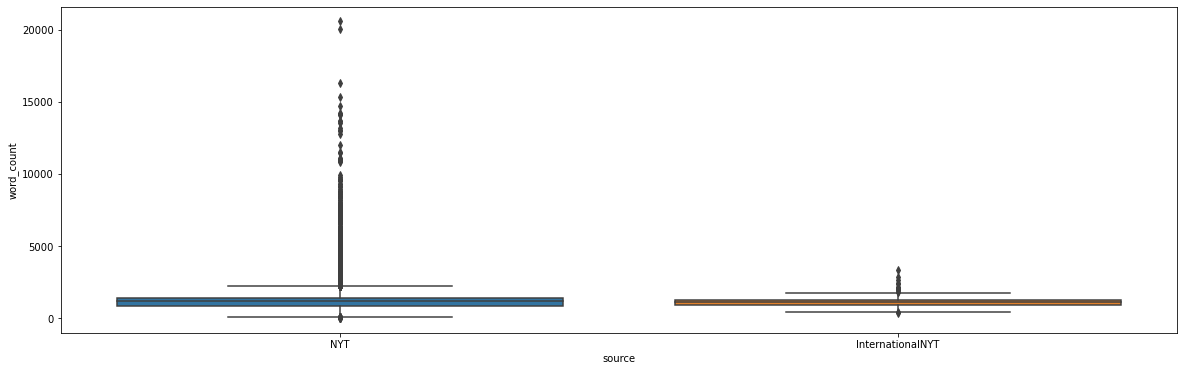

In [15]:
# Boxplot word_count and source:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="source", y="word_count", data=data_ea)
plt.show()

In [ ]:
# interesting: most articles till 10000 words, a few till around 15000 - and some outliers in 20000

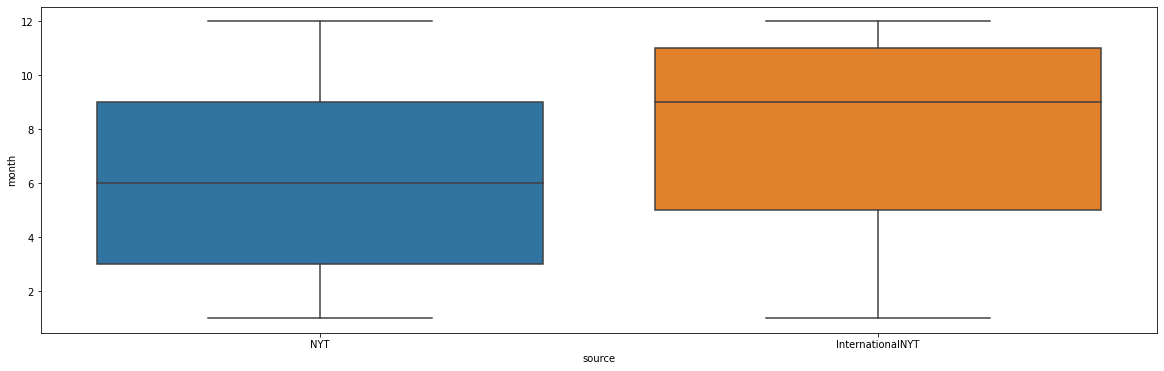

In [16]:
# Boxplot month and source:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="source", y="month", data=data_ea)
plt.show()

In [ ]:
# InternationalNYT more end of the year?

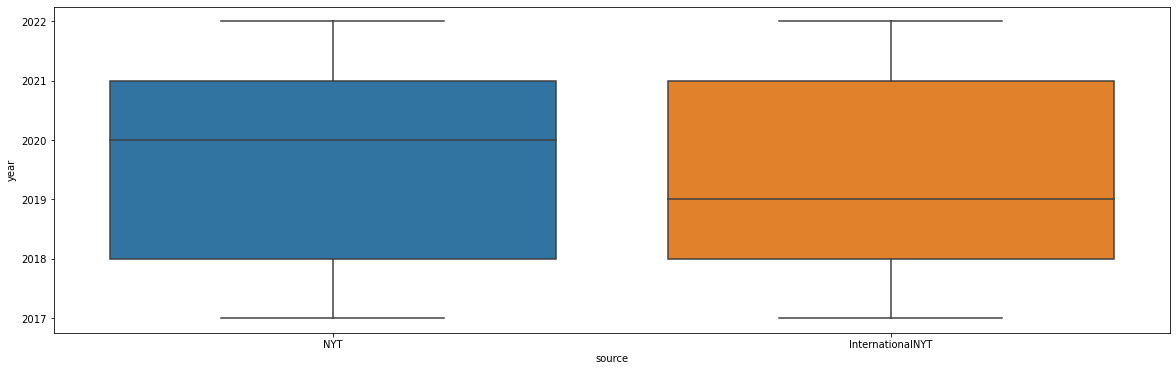

In [17]:
# Boxplot year and source:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="source", y="year", data=data_ea)
plt.show()

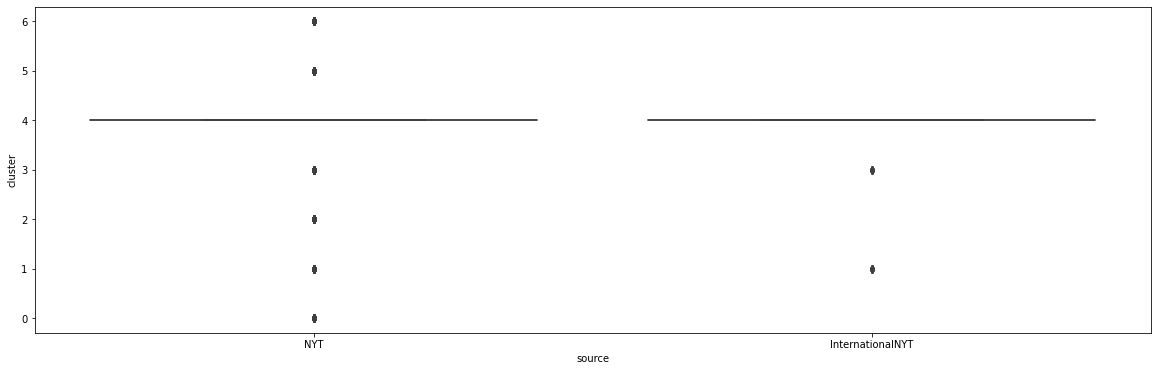

In [18]:
# Boxplot cluster and source:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="source", y="cluster", data=data_ea)
plt.show()

In [ ]:
# InternationalNYT has mostly Cluster 1 and 3 - Tennis, Oceania-Mix and TV
# NYT has all the clusters

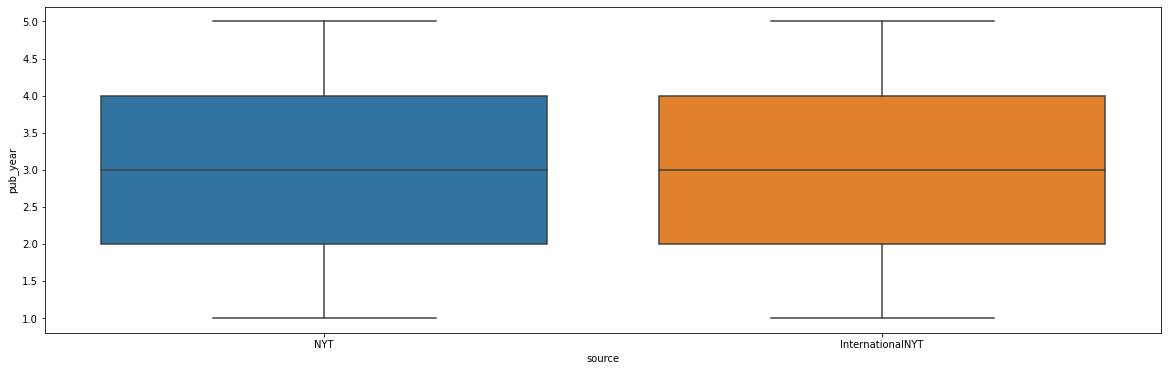

In [69]:
# Boxplot pub_year and source:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="source", y="pub_year", data=data_ea)
plt.show()

### keyword1

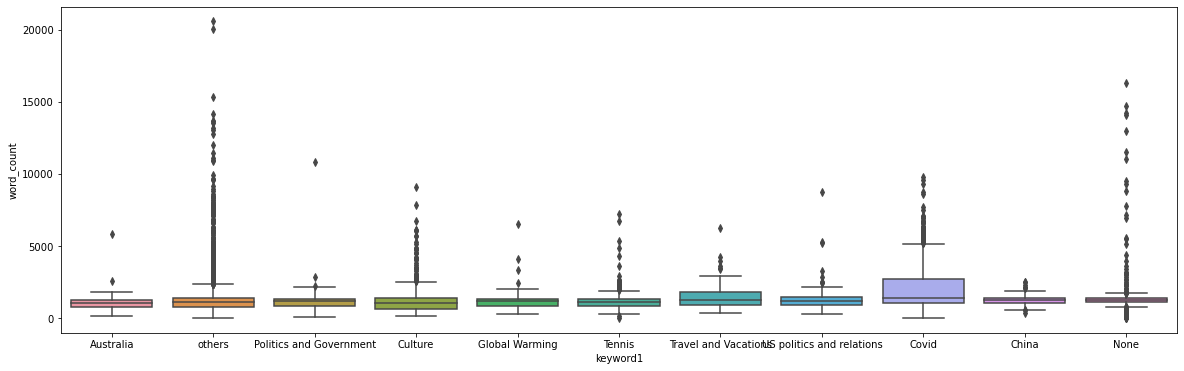

In [19]:
# Boxplot word_count and keyword1:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="keyword1", y="word_count", data=data_ea)
plt.show()

In [20]:
# articles with keyword Australia, Politics and Governemt and China have a smaller word_count 
# than Culture, Travel and Vacations, Tennis

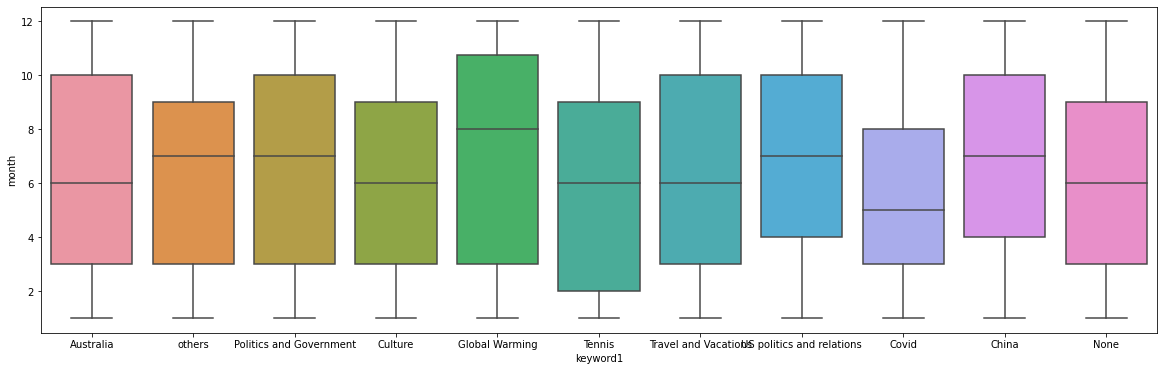

In [21]:
# Boxplot month and keyword1:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="keyword1", y="month", data=data_ea)
plt.show()

In [22]:
# travel as keyword1 more on the first half of the year

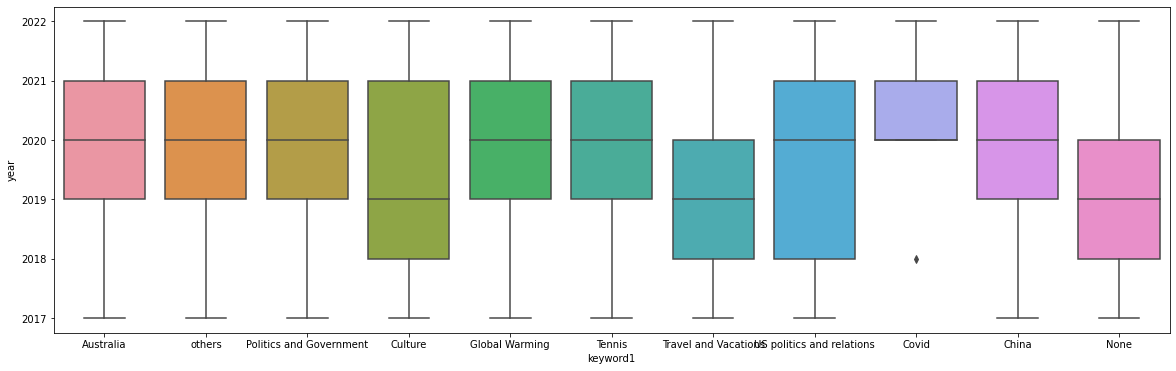

In [23]:
# Boxplot year and keyword1:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="keyword1", y="year", data=data_ea)
plt.show()

In [24]:
# travel and Vacations esp. till 2020 - 202 is also when Covid arrives as a keywords 
# Covid hat an Outlier 2018

In [25]:
# Outlier in Covid:
data_ea[(data_ea['keyword1']=='Covid')&(data_ea['year']<2019)].head()

source                                           headline keyword1  \
12085    NYT  The Flu Vaccine Is Working Better Than Expecte...    Covid   

      keyword2 keyword3    pub_date news_desk section_name type_of_material  \
12085   others   others  2018-02-16   Science       Health             News   

       word_count  month  year  cluster  
12085         659      2  2018        4

In [ ]:
# One Article about Covid in February 2018, Science and Health

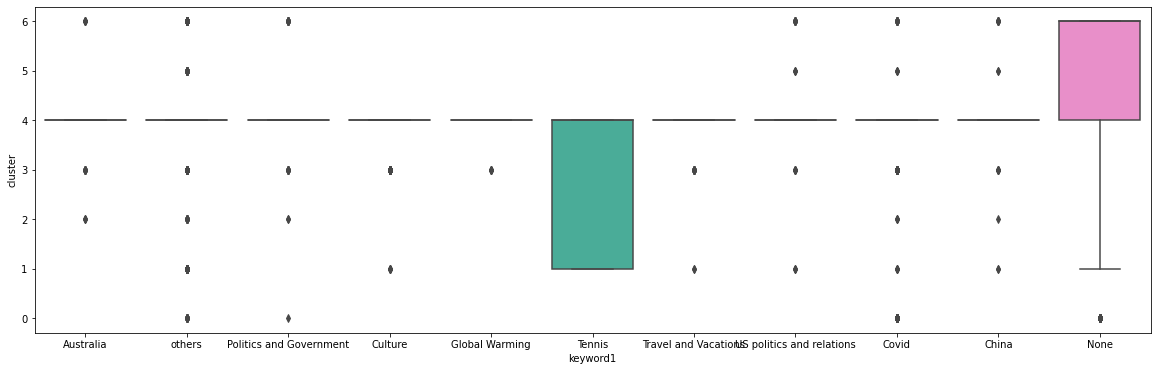

In [27]:
# Boxplot cluster and keyword1:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="keyword1", y="cluster", data=data_ea)
plt.show()

In [ ]:
# Global warming especially in Cluster 3

# Tennis has a lot between Cluster 1 and 4

# Culture and Travel and Vacation especially in Cluster 1 and 3

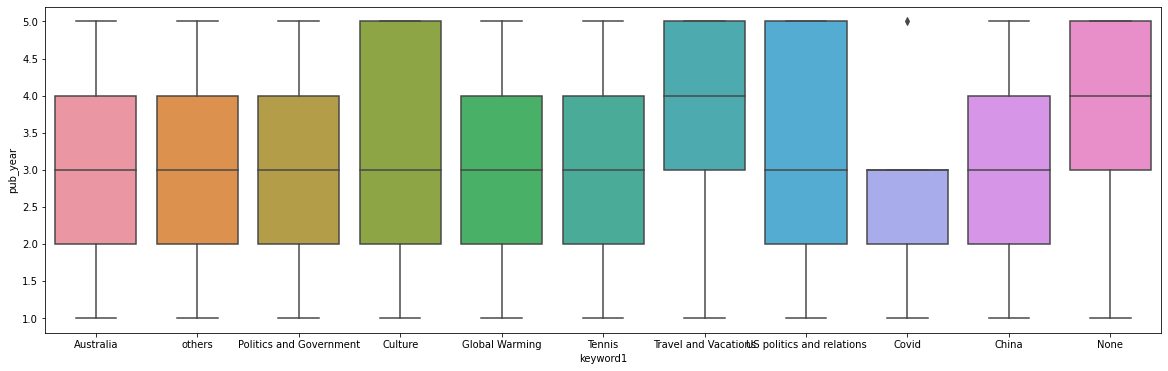

In [70]:
# Boxplot pub_year and keyword1:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="keyword1", y="pub_year", data=data_ea)
plt.show()

In [ ]:
# Culture and US politics and relations pretty broadly distributed
# Covid just from year 3 to 1 (now)
# Travel & Vacations died in year 3, None too

### keyword2

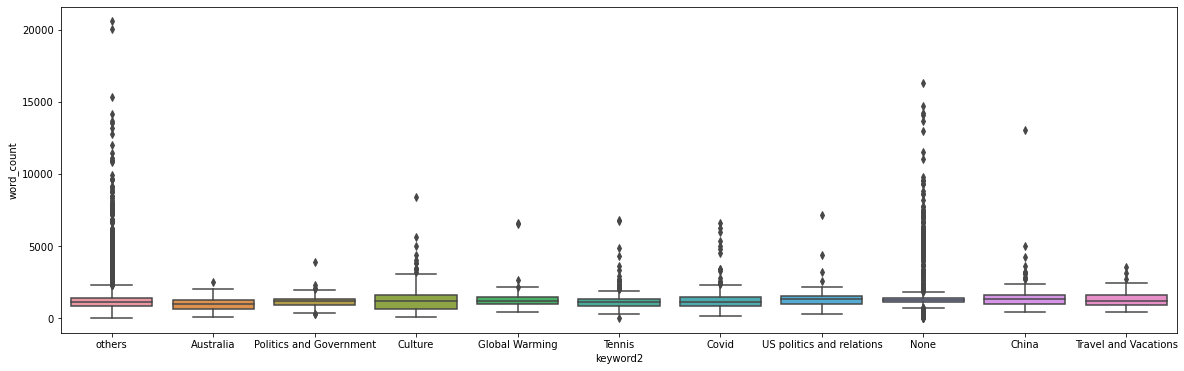

In [28]:
# Boxplot word_count and keyword2:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="keyword2", y="word_count", data=data_ea)
plt.show()

In [29]:
# Articles about Australia are shorter than the other keyword2

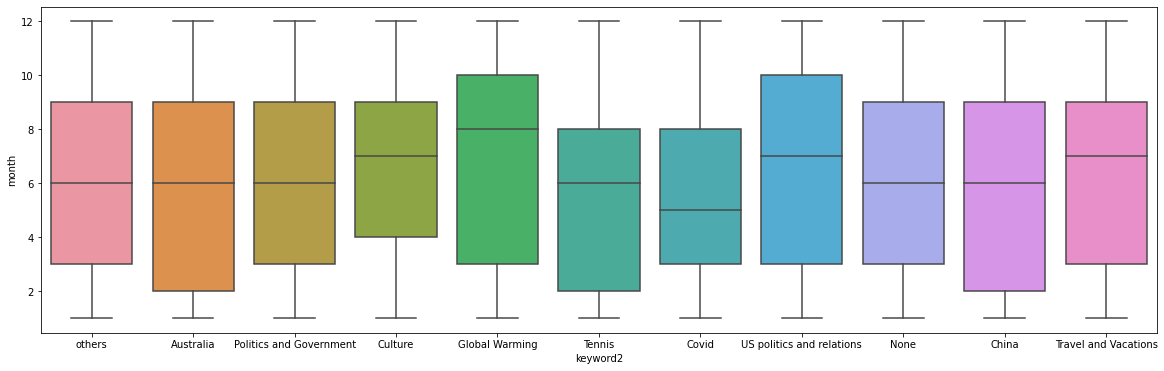

In [30]:
# Boxplot month and keyword2:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="keyword2", y="month", data=data_ea)
plt.show()

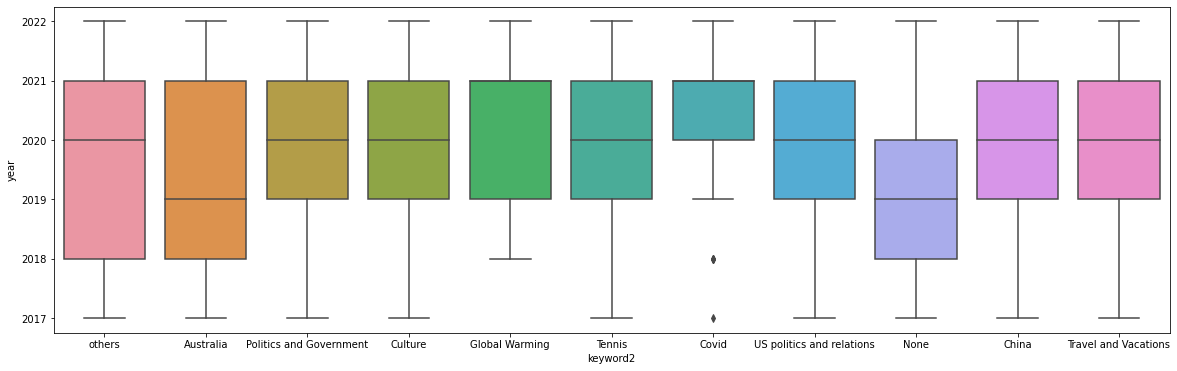

In [31]:
# Boxplot year and keyword2:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="keyword2", y="year", data=data_ea)
plt.show()

In [ ]:
# Covid from 2020 on, just some outliers 2017 and 2018
# china especially topic in 2019-2021
# travel and vacations throughout 2020?

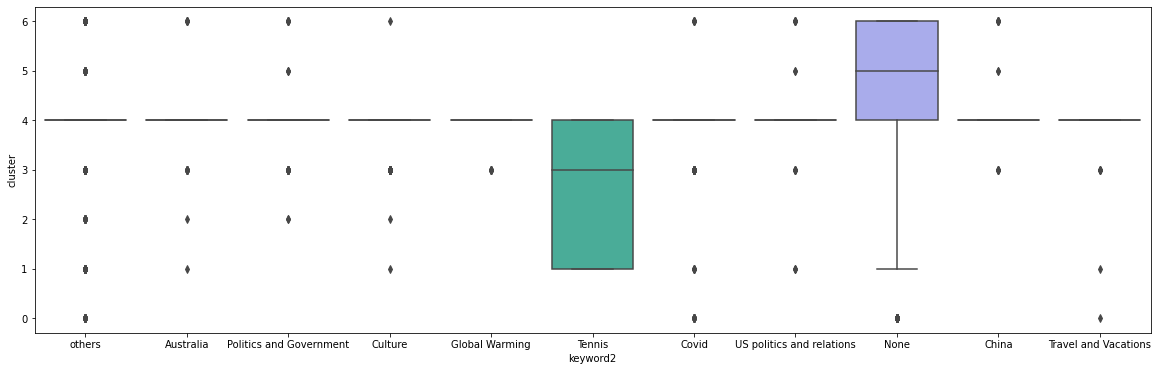

In [32]:
# Boxplot cluster and keyword2:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="keyword2", y="cluster", data=data_ea)
plt.show()

In [ ]:
# Tennis is espcially between cluster 1 and 4
# Global warming in cluster 3 (and 4)
# Covid in cluster 0, 1, 3

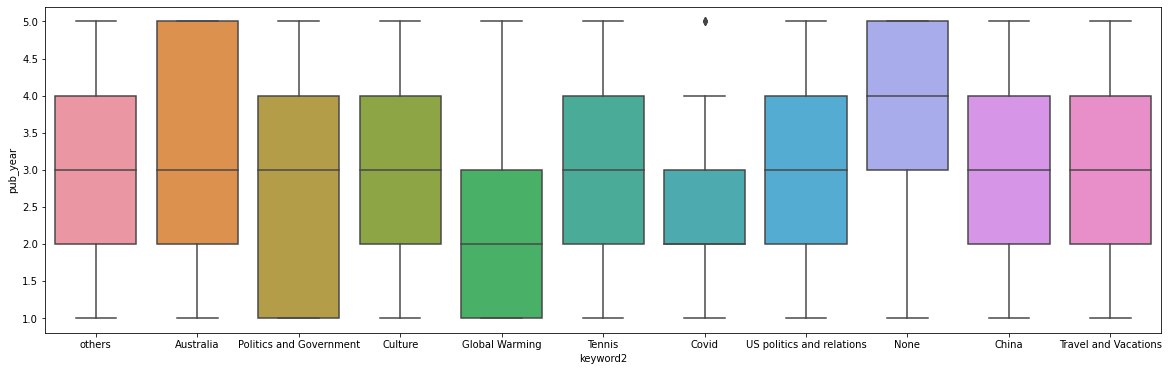

In [71]:
# Boxplot pub_year and keyword2:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="keyword2", y="pub_year", data=data_ea)
plt.show()

In [ ]:
# Global warning especially in the last 3 years
# Covid especially between 3 and 2
# Politics and Government big in the last 4 years
# Australia as keyword less in the last year

### keyword3

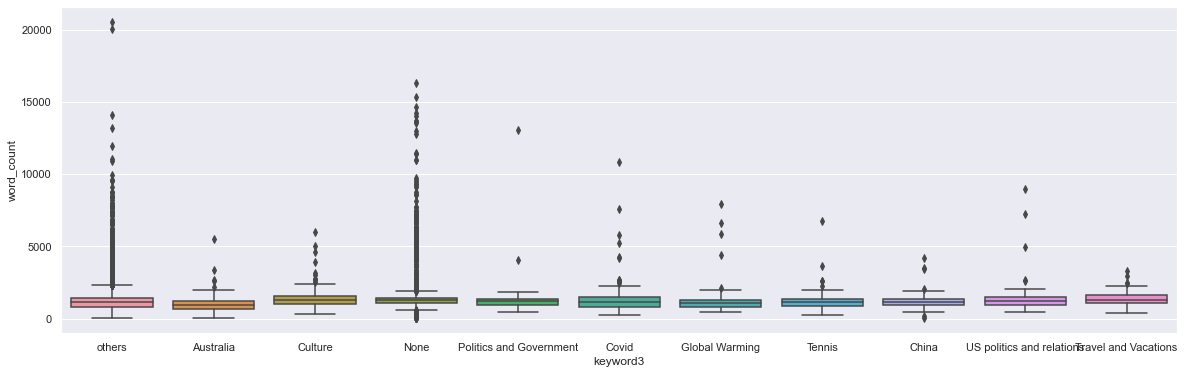

In [111]:
# Boxplot word_count and keyword3:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="keyword3", y="word_count", data=data_ea)
plt.show()

In [ ]:
# keyword 3 has more outliers in the higher word_counts in None and others, australia nothing over ca. 6000

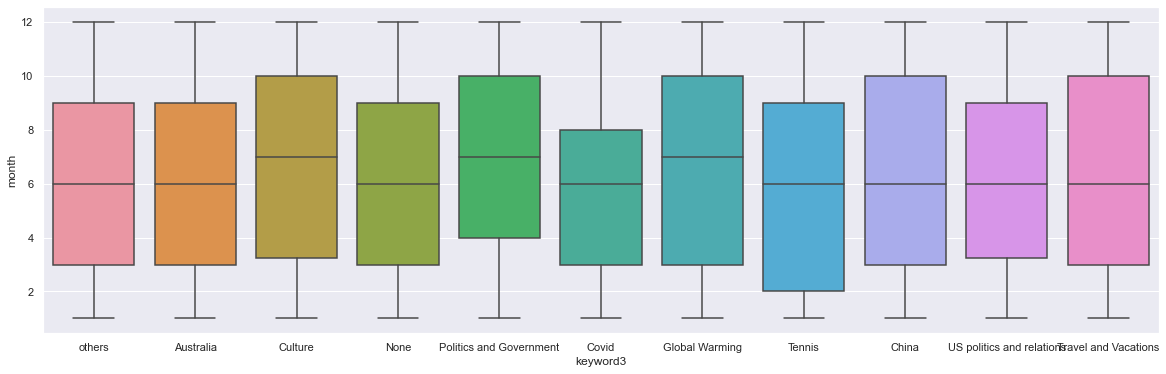

In [112]:
# Boxplot month and keyword3:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="keyword3", y="month", data=data_ea)
plt.show()

In [ ]:
# covid not throughout the year eveningly distributed? 

In [ ]:
# Boxplot year and keyword3:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="keyword3", y="year", data=data_ea)
plt.show()

In [ ]:
# covid again from 2020 on with an outlier in 2018
# travel and vacations till 2020, with outlier in 2022
# Tennis especially from 2019 till today

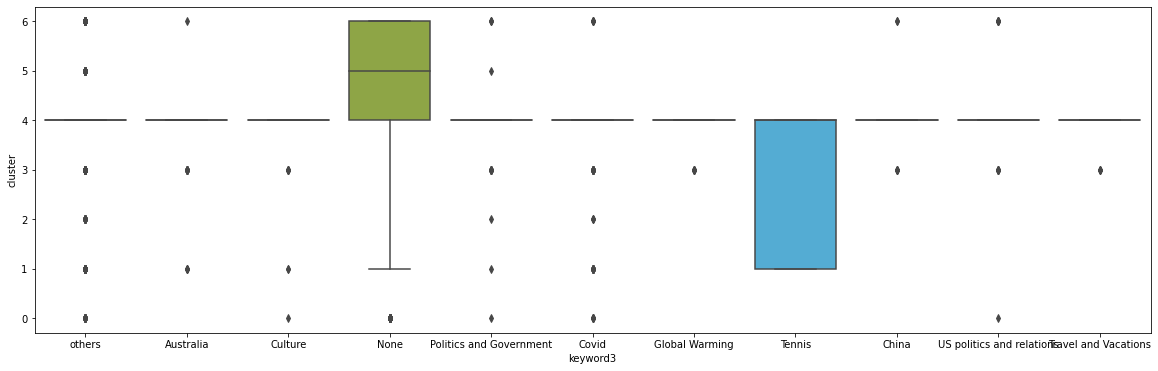

In [33]:
# Boxplot cluster and keyword3:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="keyword3", y="cluster", data=data_ea)
plt.show()

In [ ]:
# Tennis between cluster 1 and 4
# Global Warning in cluster 3 and 4
# Travel and Vacation in cluster 3 and 4
# China in cluster 3, 4 and 6

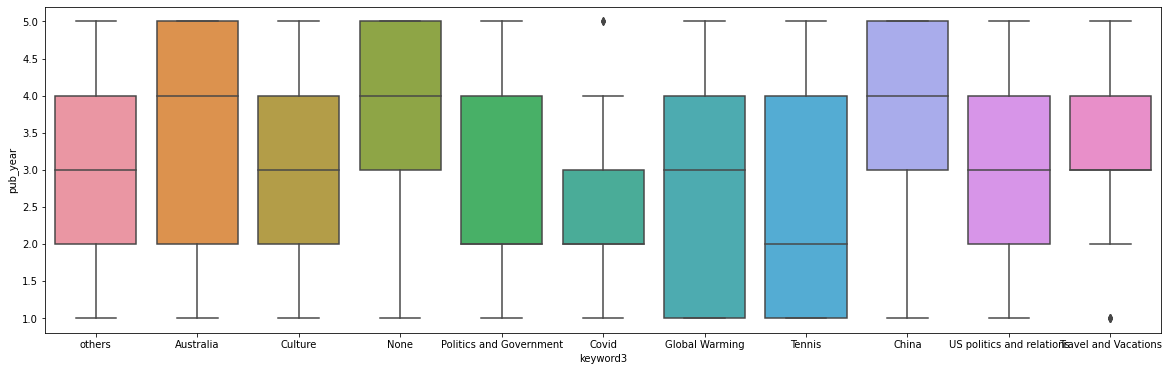

In [72]:
# Boxplot pub_year and keyword3:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="keyword3", y="pub_year", data=data_ea)
plt.show()

In [ ]:
# Covid especially year 3 and 2
# China especially year 5, 4, and 3
# Global Warning and Tennis big since year 4
# Travel and Vacations especially in year 4 and 3

### news_desk

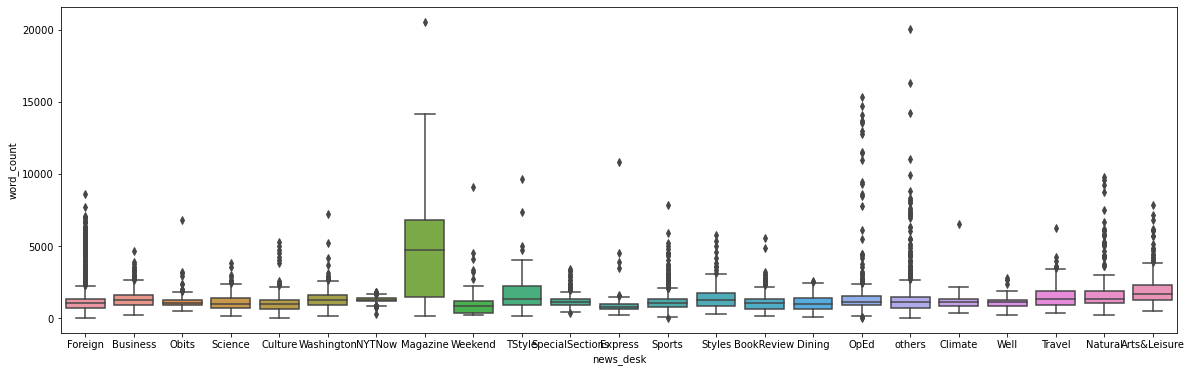

In [35]:
# Boxplot word_count and news_desk:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="news_desk", y="word_count", data=data_ea)
plt.show()

In [36]:
# Magazine has the biggest word_count, Foreign and OpEd a lot of outliers
# NYT Now and Climate is rather small

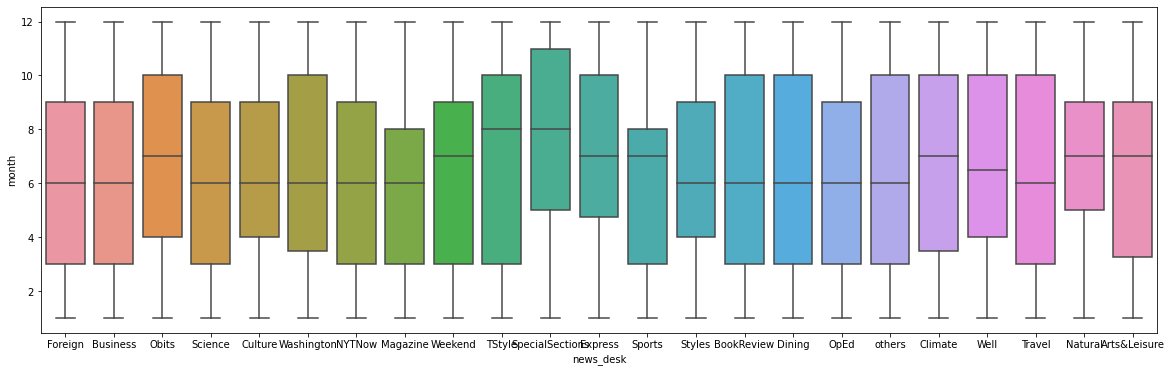

In [37]:
# Boxplot month and news_desk:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="news_desk", y="month", data=data_ea)
plt.show()

In [38]:
# more obits later in the year, also more special sections, Weekend, TStyle

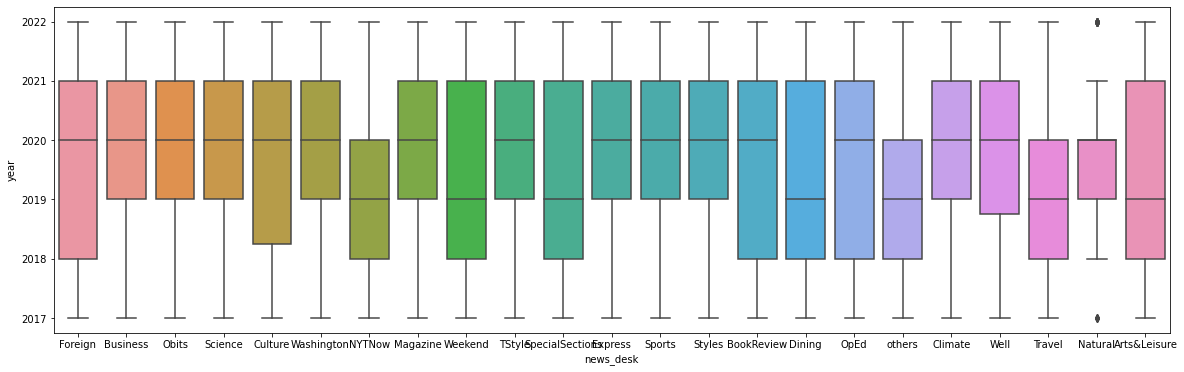

In [39]:
# Boxplot year and news_desk:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="news_desk", y="year", data=data_ea)
plt.show()

In [40]:
# Traveling till 2020, NYTNow till 2020
# Natural 2019 till 2020, outlier in 2022

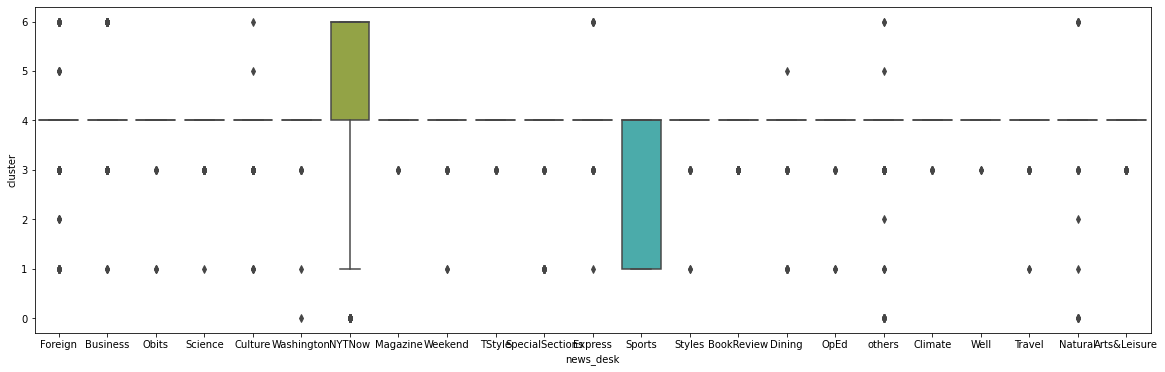

In [42]:
# Boxplot cluster and news_desk:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="news_desk", y="cluster", data=data_ea)
plt.show()

In [ ]:
# NYT Now especially in cluster 4-6
# Sports especially in cluster 1-4
# Arts & Leisure in cluster 3
# Climate and Well both in cluster 3
# Weekend and Obits in cluster 1 and 3
# Most articles in NYT now and sports

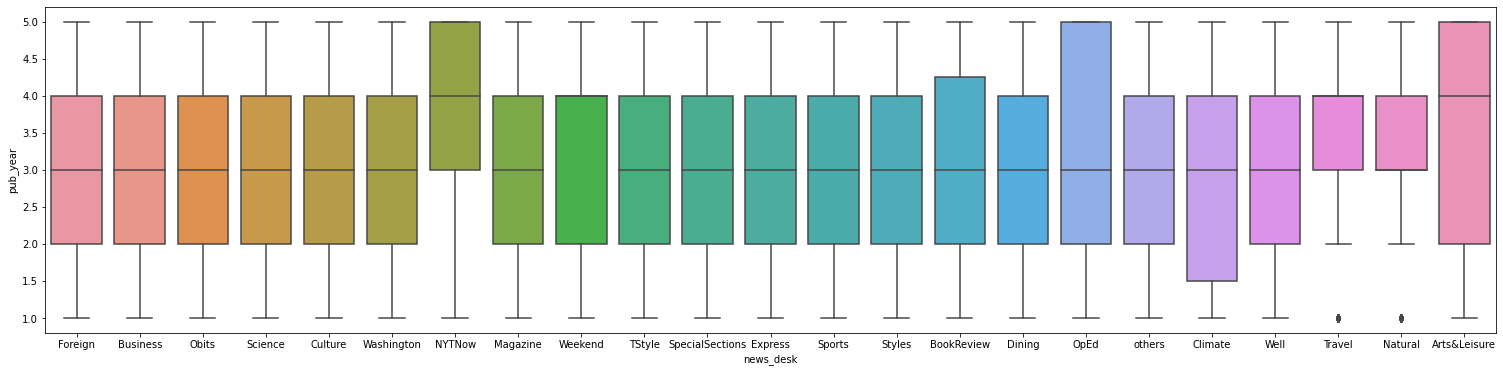

In [75]:
# Boxplot pub_year and news_desk:
plt.rcParams["figure.figsize"] = (26,6)
sns.boxplot(x="news_desk", y="pub_year", data=data_ea)
plt.show()

In [ ]:
# NYTNow till year 3
# OpEd 5-2
# --> still active?

# Travel and Natural in year 4 and 3, just outliers in year 1

### section_name

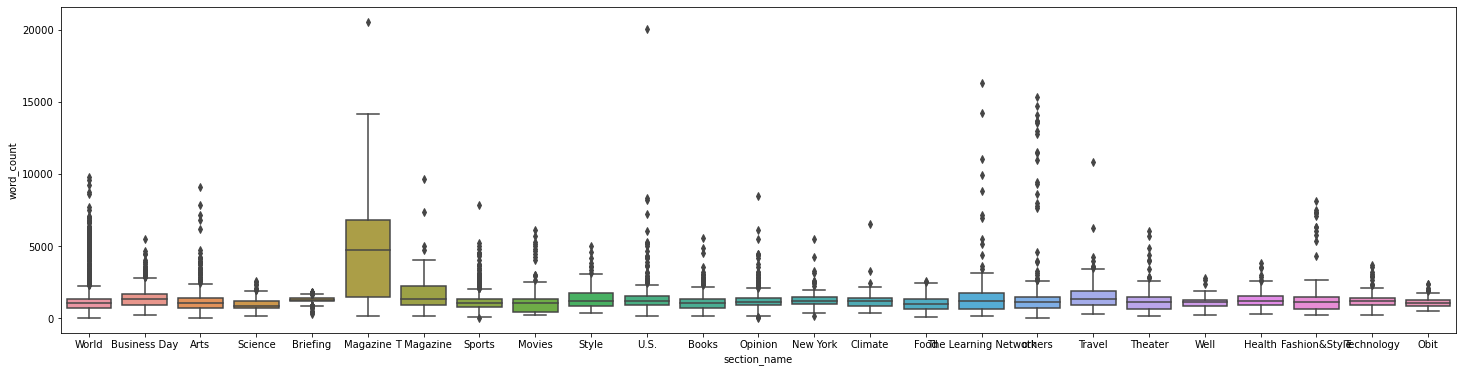

In [43]:
# Boxplot word_count and section_name:
plt.rcParams["figure.figsize"] = (25,6)
sns.boxplot(x="section_name", y="word_count", data=data_ea)
plt.show()

In [44]:
# biggest wordcount: Magazine, also learning networks and world
# smallest wordcount: Briefing, Fooie, Obit and Well

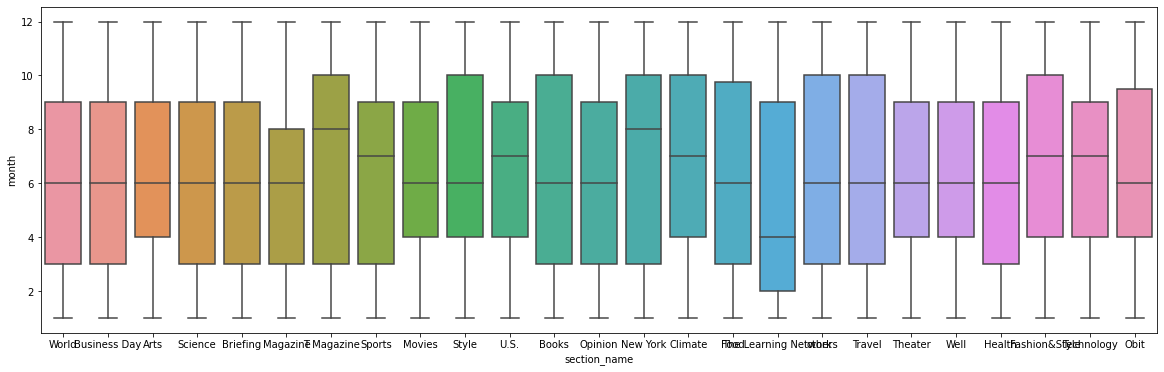

In [45]:
# Boxplot month and section_name:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="section_name", y="month", data=data_ea)
plt.show()

In [46]:
# TMagazine and New York later in the year
# LearningNetworks and Obit earlier in the year

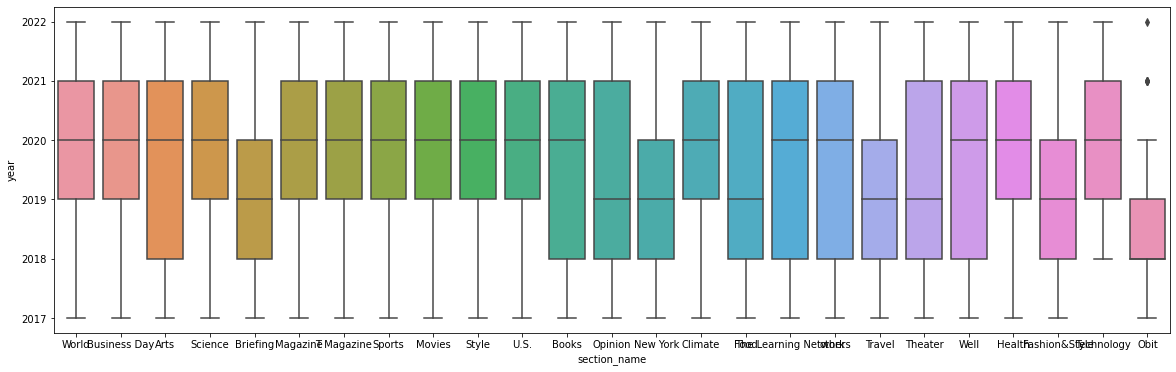

In [47]:
# Boxplot year and section_name:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="section_name", y="year", data=data_ea)
plt.show()

In [48]:
# Travel once more till 2020
# Briefing and New York till 2020

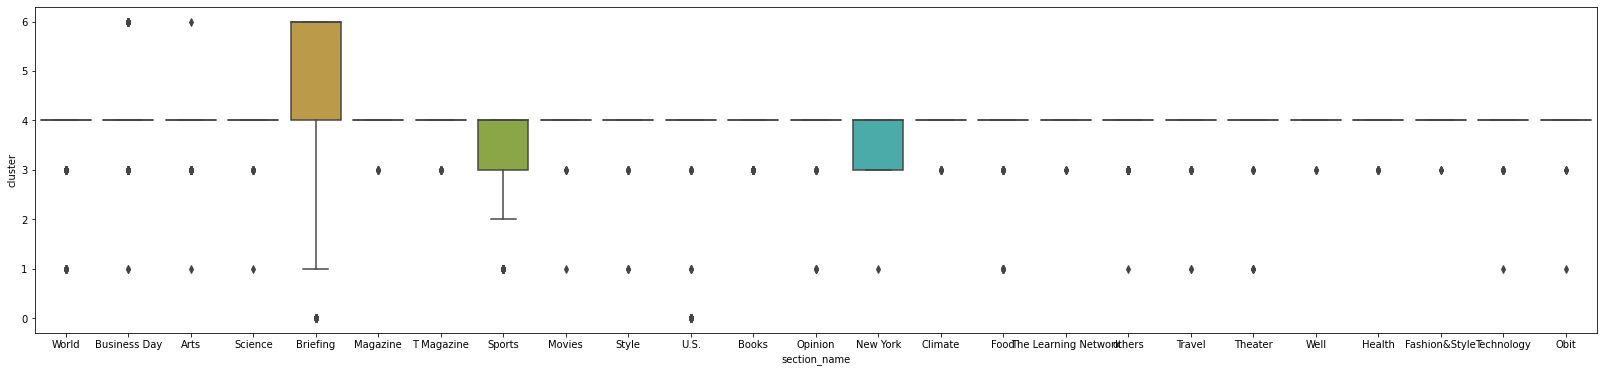

In [51]:
# Boxplot cluster and section_name:
plt.rcParams["figure.figsize"] = (28,6)
sns.boxplot(x="section_name", y="cluster", data=data_ea)
plt.show()

In [52]:
# Briefing mostly cluster 4-6
# Sports and New York mostly cluster 3 and 4 with outliers in 1
# cluster 4-6 (except Briefing) mostly empty
# Well, Health, Fashion & Style, Magazine T, Magazine, Books and Learning Networks just outliers in cluster 3
# --> cluster 3 more Lifestyle and Culture?

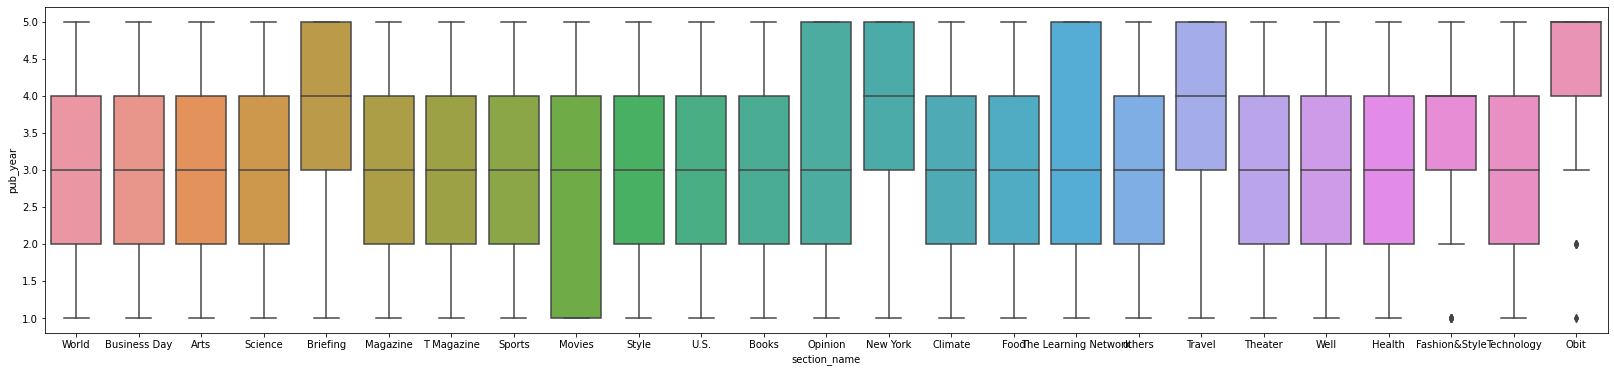

In [76]:
# Boxplot pub_year and section_name:
plt.rcParams["figure.figsize"] = (28,6)
sns.boxplot(x="section_name", y="pub_year", data=data_ea)
plt.show()

In [ ]:
# Briefing, New York and Travel in year 5 till 3
# Obits especially in year 5 and 4, some outliers later
# Fashion & Style in year 4 and 4, outlier in year 1
# Movies in year 4 till 1 - only selection big in year 1!

### type_of_material

In [53]:
data_cl['type_of_material'].value_counts(dropna=False)

News        8682
Briefing    2757
OpEd         542
others       300
Review       278
Obit         259
Name: type_of_material, dtype: int64

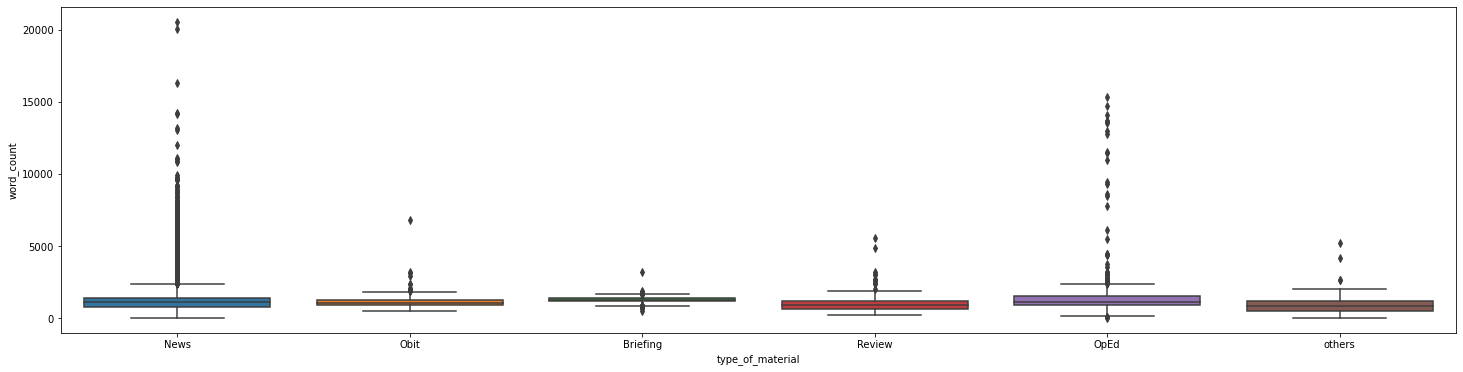

In [54]:
# Boxplot word_count and type_of_material:
plt.rcParams["figure.figsize"] = (25,6)
sns.boxplot(x="type_of_material", y="word_count", data=data_ea)
plt.show()

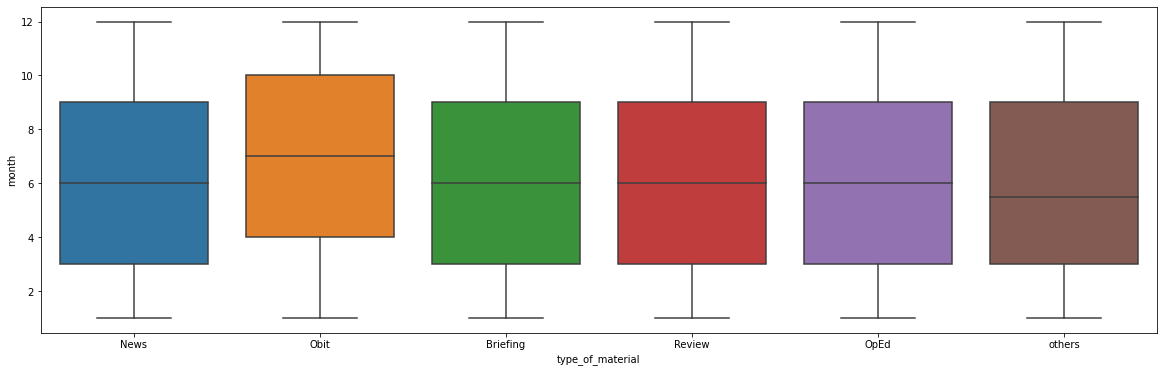

In [55]:
# Boxplot month and type_of_material:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="type_of_material", y="month", data=data_ea)
plt.show()

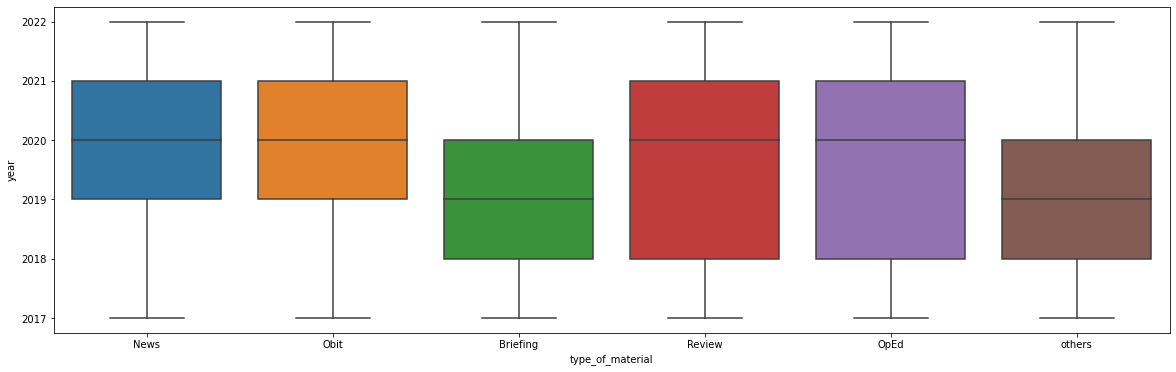

In [56]:
# Boxplot year and type_of_material:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="type_of_material", y="year", data=data_ea)
plt.show()

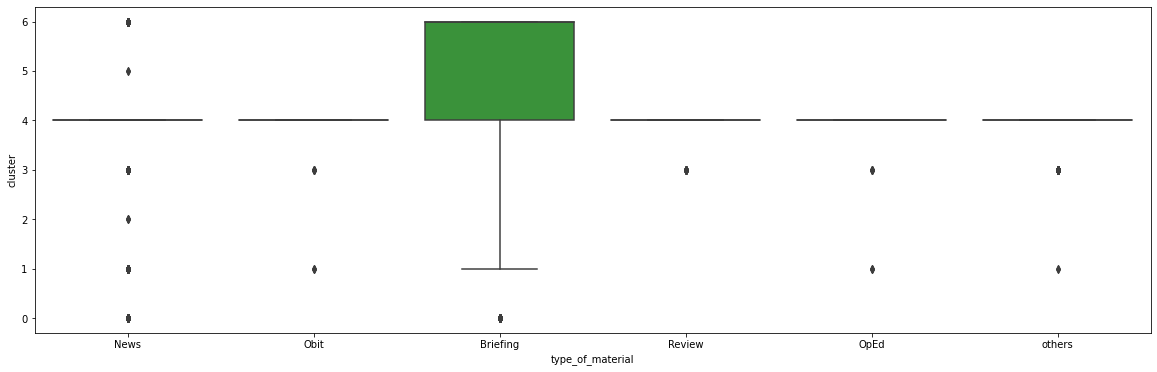

In [57]:
# Boxplot cluster and type_of_material:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="type_of_material", y="cluster", data=data_ea)
plt.show()

In [ ]:
# Briefing has by far the most, esp. cluster 4-6
# Review in cluster 3
# News eveningly distributed on cluster 0-6

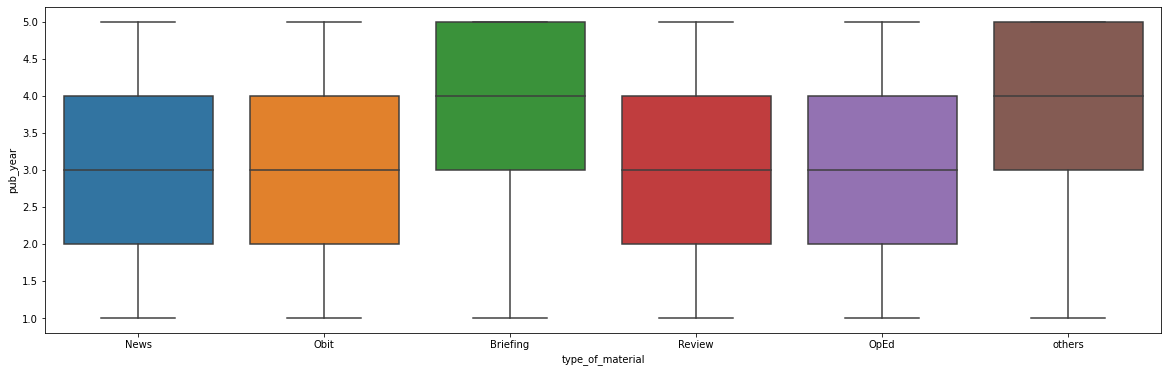

In [77]:
# Boxplot pub_year and type_of_material:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="type_of_material", y="pub_year", data=data_ea)
plt.show()

In [ ]:
# Briefing and others esp. in year 5, 4 and 3

### word_count

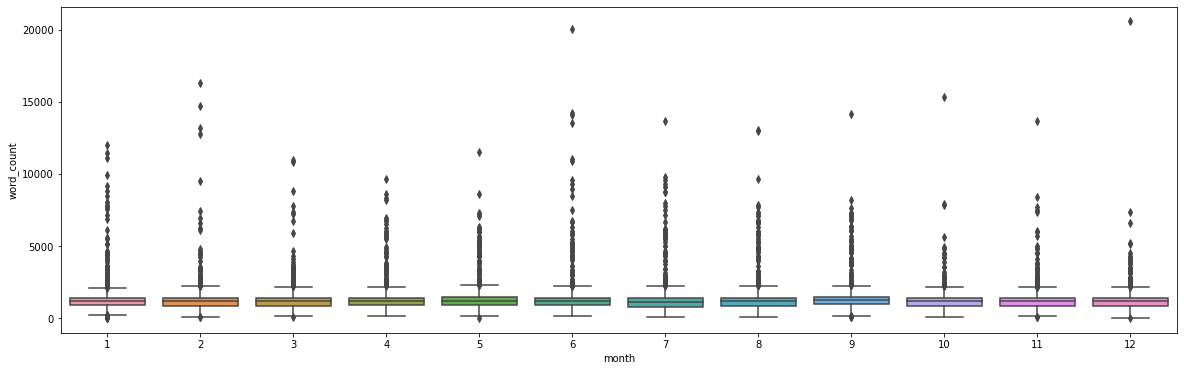

In [58]:
# Boxplot month and word_count:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="month", y="word_count", data=data_ea)
plt.show()

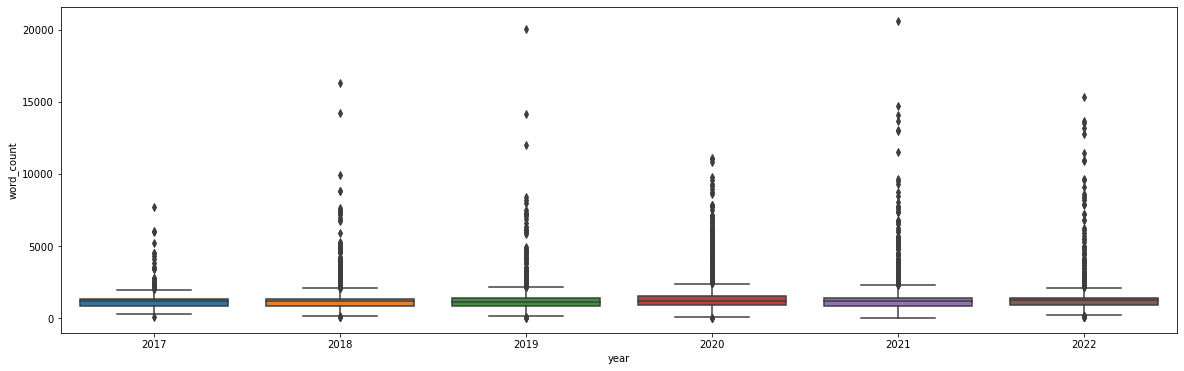

In [59]:
# Boxplot year and word_count:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="year", y="word_count", data=data_ea)
plt.show()

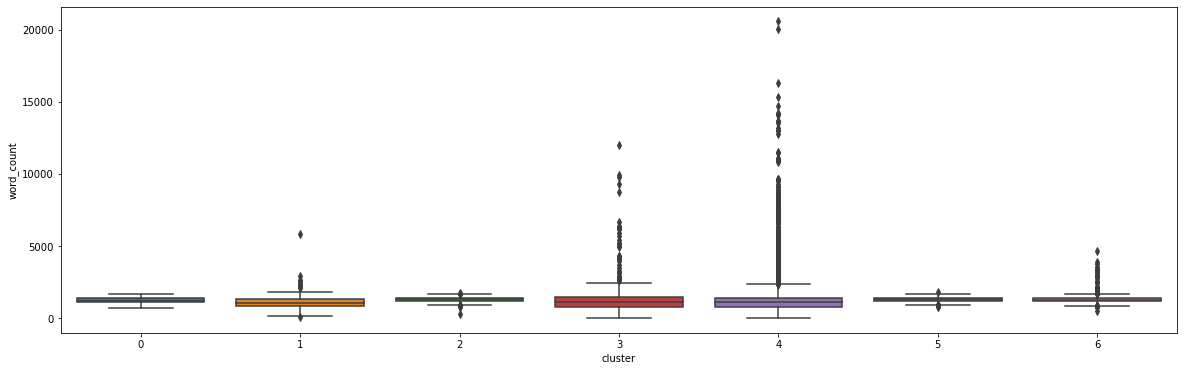

In [60]:
# Boxplot cluster and word_count:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="cluster", y="word_count", data=data_ea)
plt.show()

In [ ]:
# Cluster 4 has the most outliers in the higher word counts
# Cluster 3 the next one

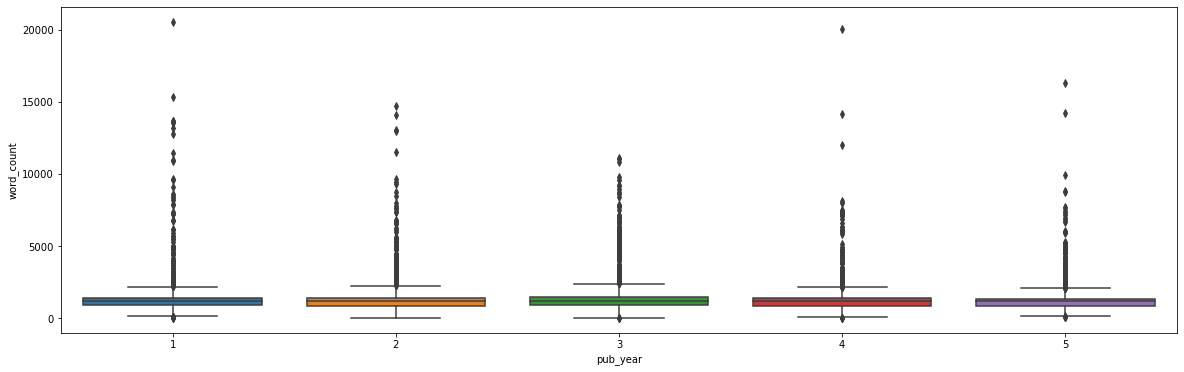

In [79]:
# Boxplot pub_year and word_count:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="pub_year", y="word_count", data=data_ea)
plt.show()

In [ ]:
# Year 3 less outliers with articles with bigger word count then the other years

### cluster

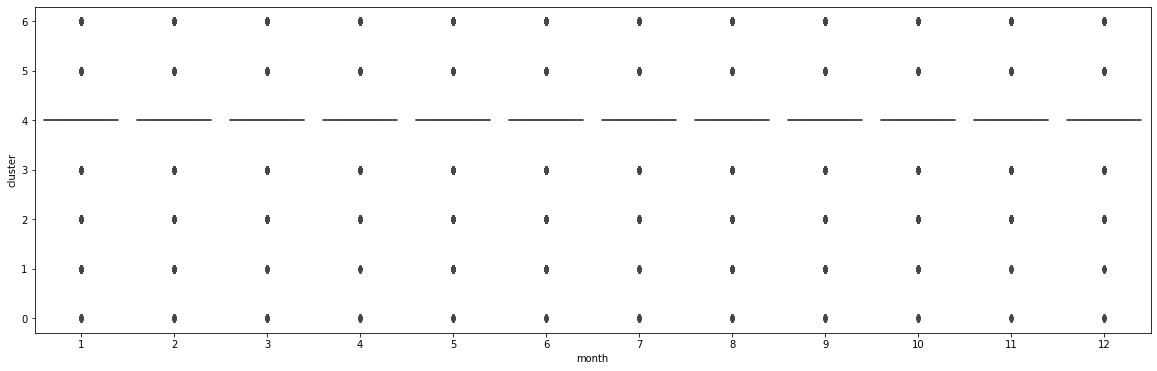

In [81]:
# Boxplot month and cluster:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="month", y="cluster", data=data_ea)
plt.show()

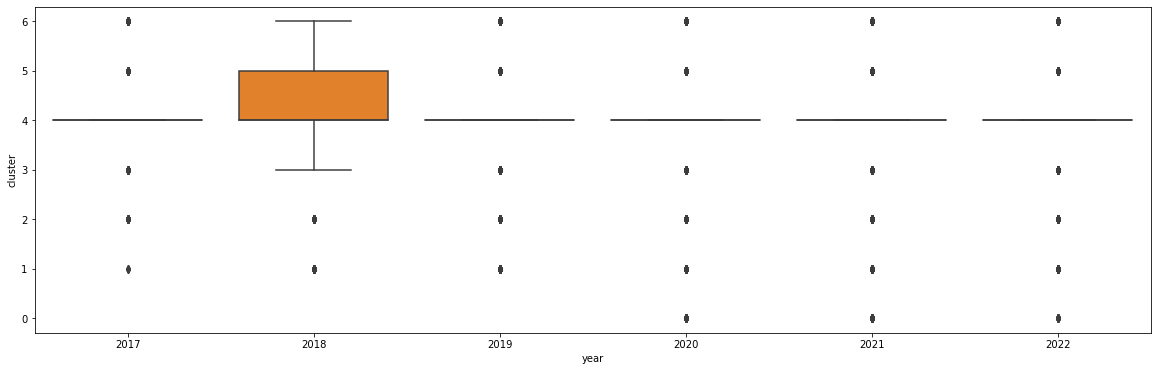

In [82]:
# Boxplot year and cluster:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="year", y="cluster", data=data_ea)
plt.show()

In [ ]:
# 2018 esp. cluster 5 and 4

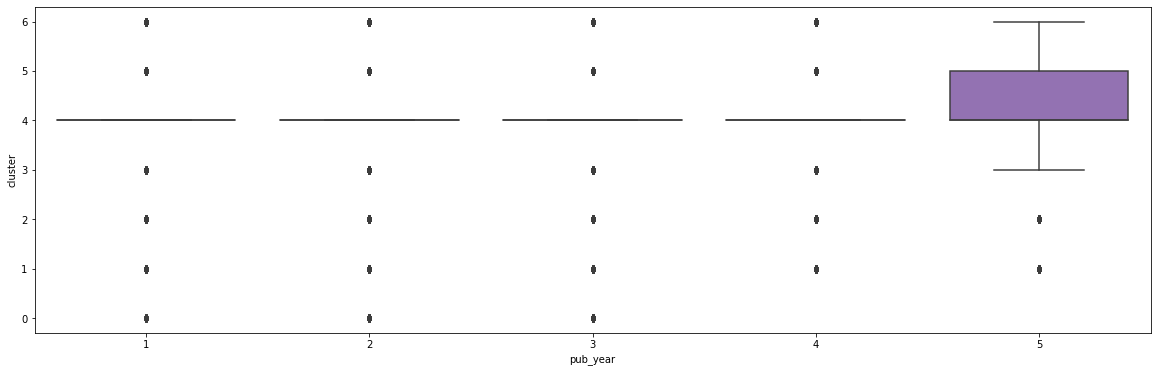

In [83]:
# Boxplot pub_year and cluster:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="pub_year", y="cluster", data=data_ea)
plt.show()

In [ ]:
# in pubyear_5, esp. cluster 4 and 5

### month

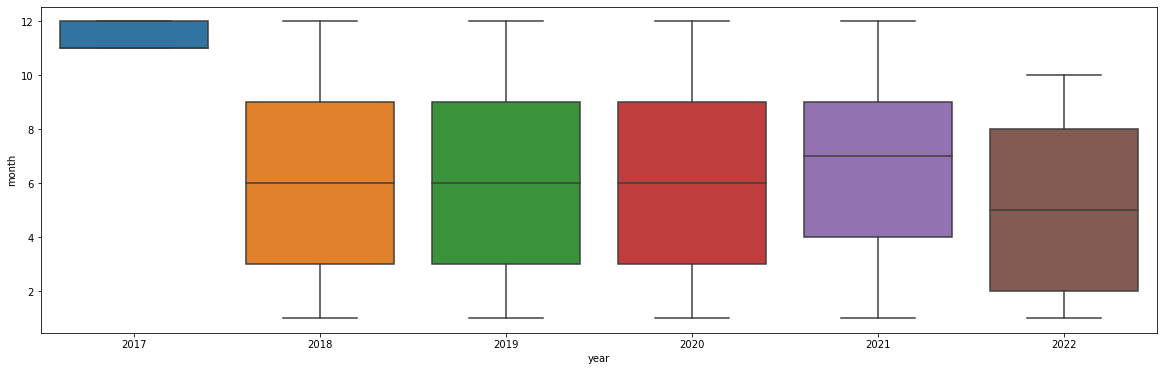

In [84]:
# Boxplot year and month:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="year", y="month", data=data_ea)
plt.show()

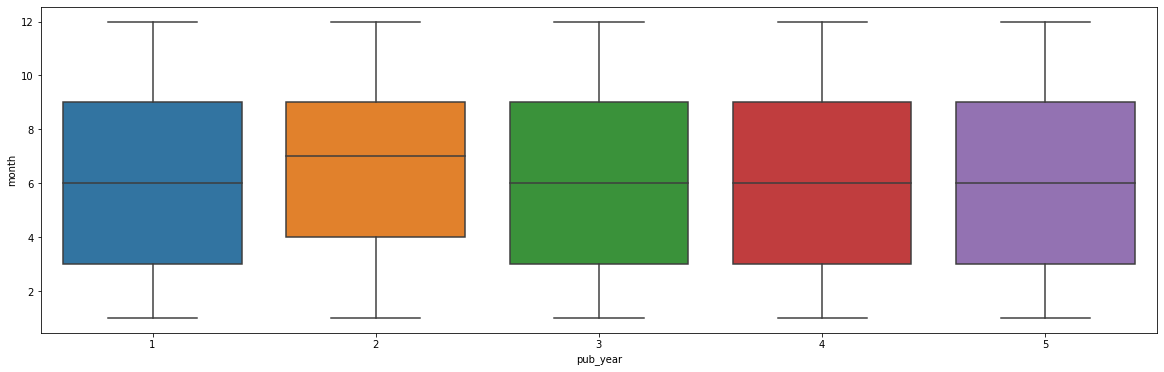

In [85]:
# Boxplot pub_year and month:
plt.rcParams["figure.figsize"] = (20,6)
sns.boxplot(x="pub_year", y="month", data=data_ea)
plt.show()

## Check for Distribution via Countplot

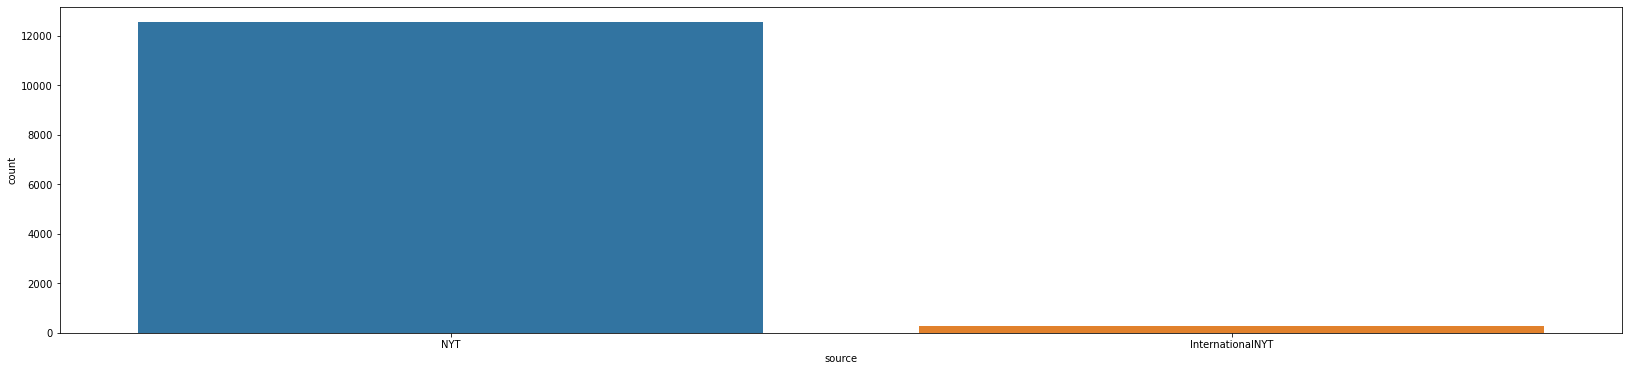

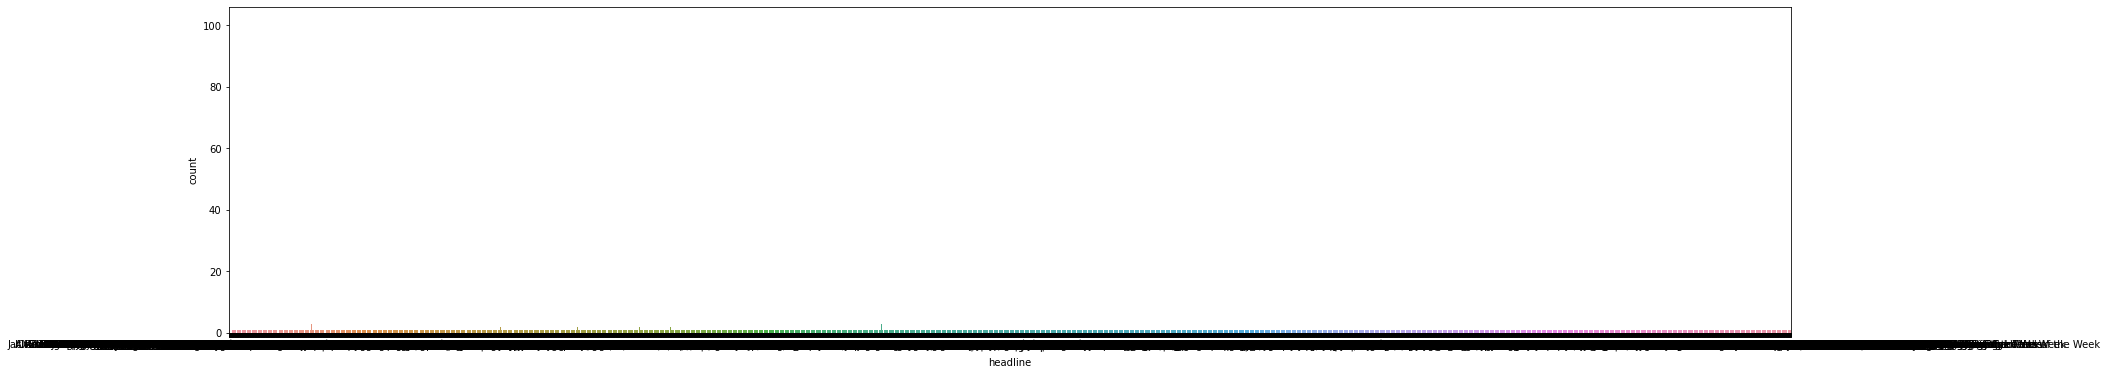

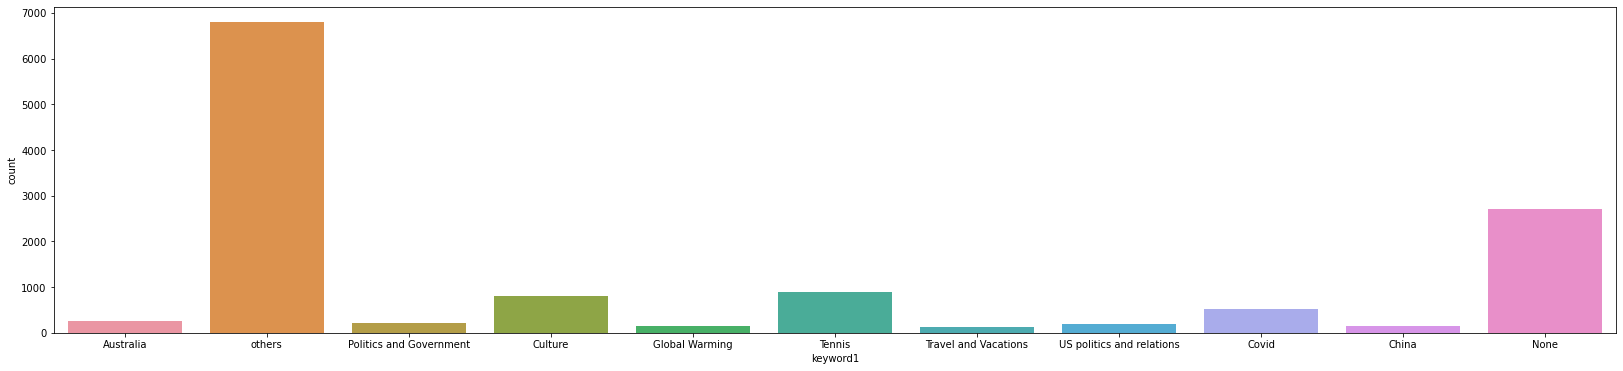

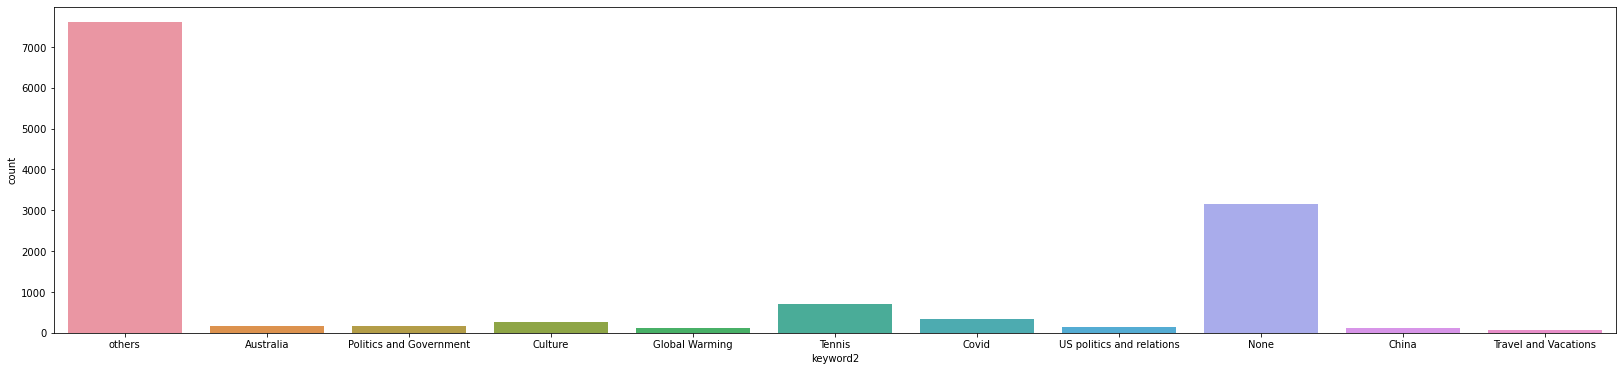

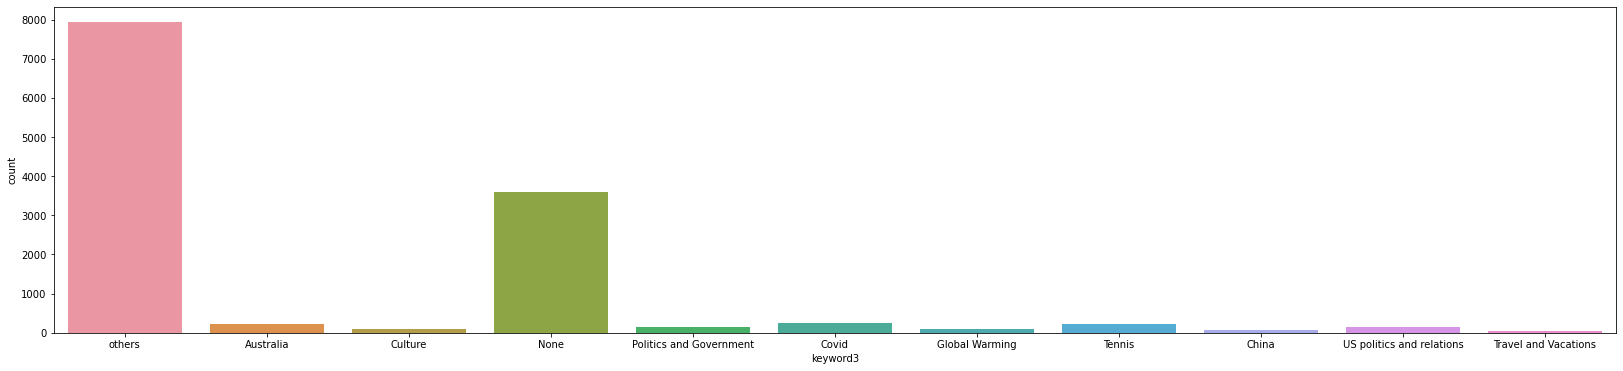

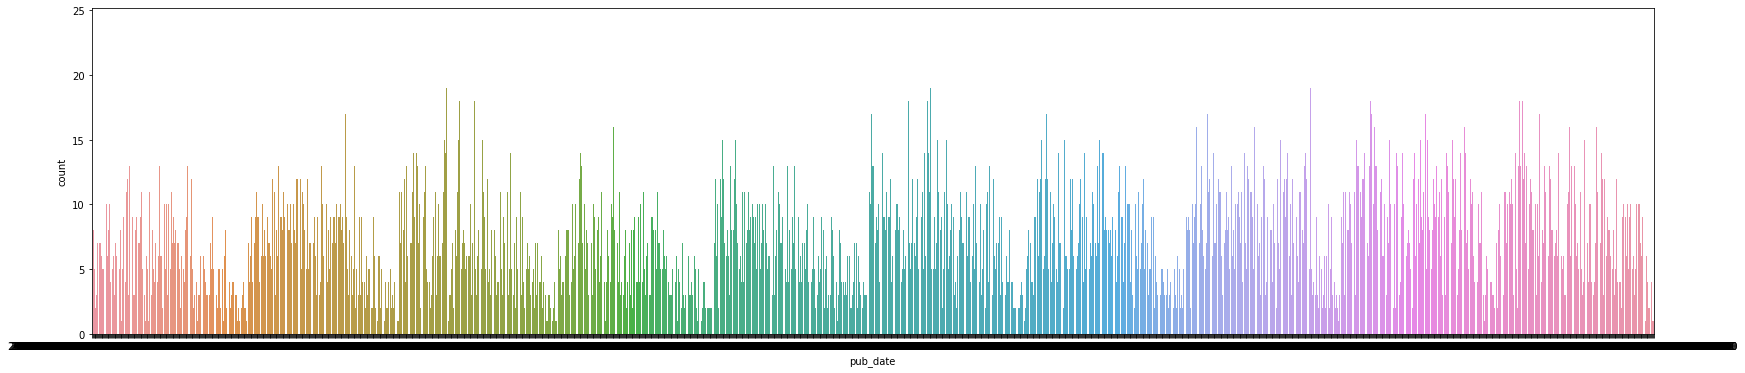

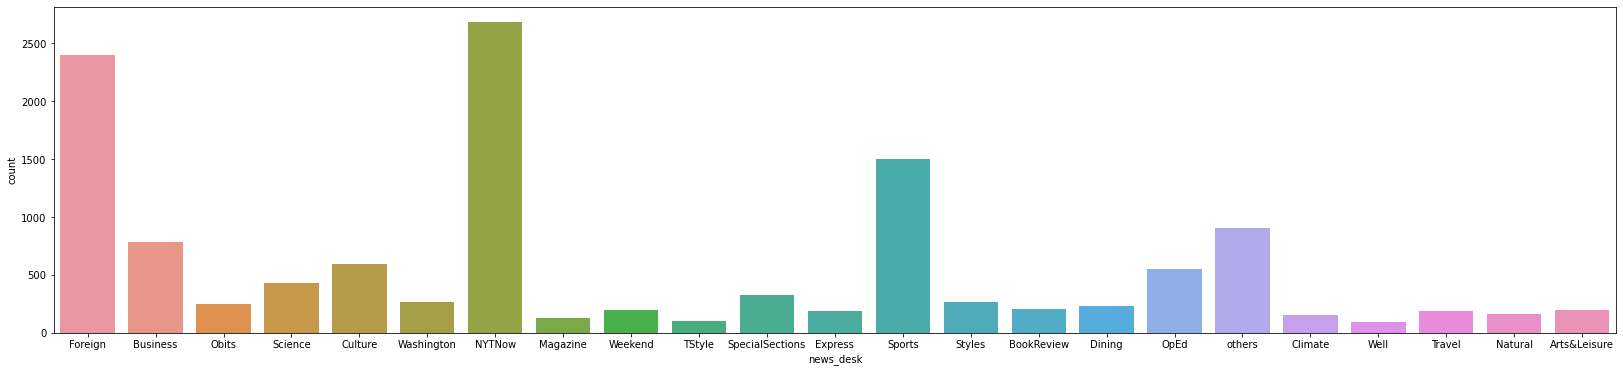

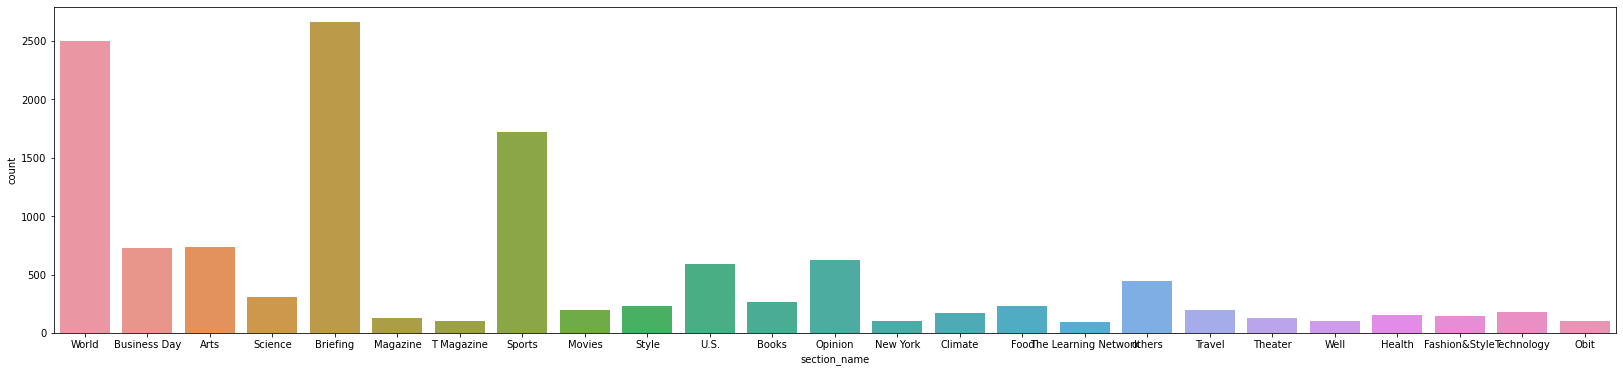

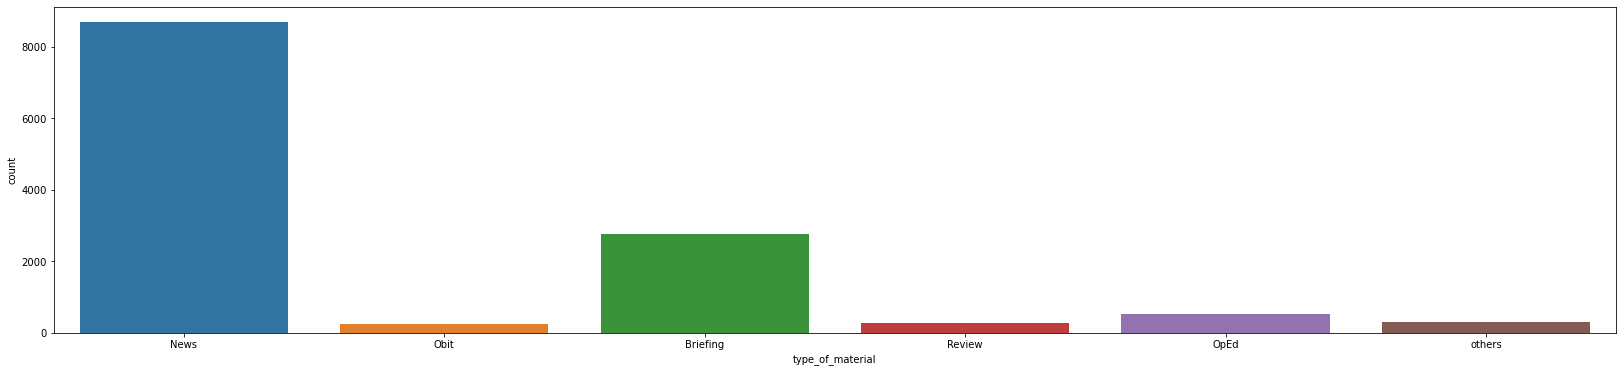

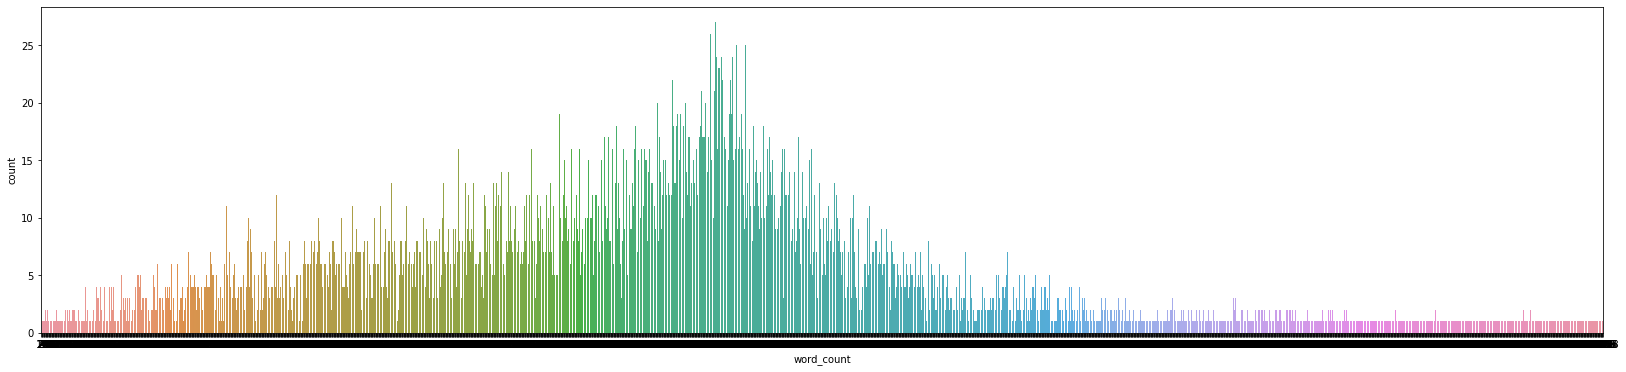

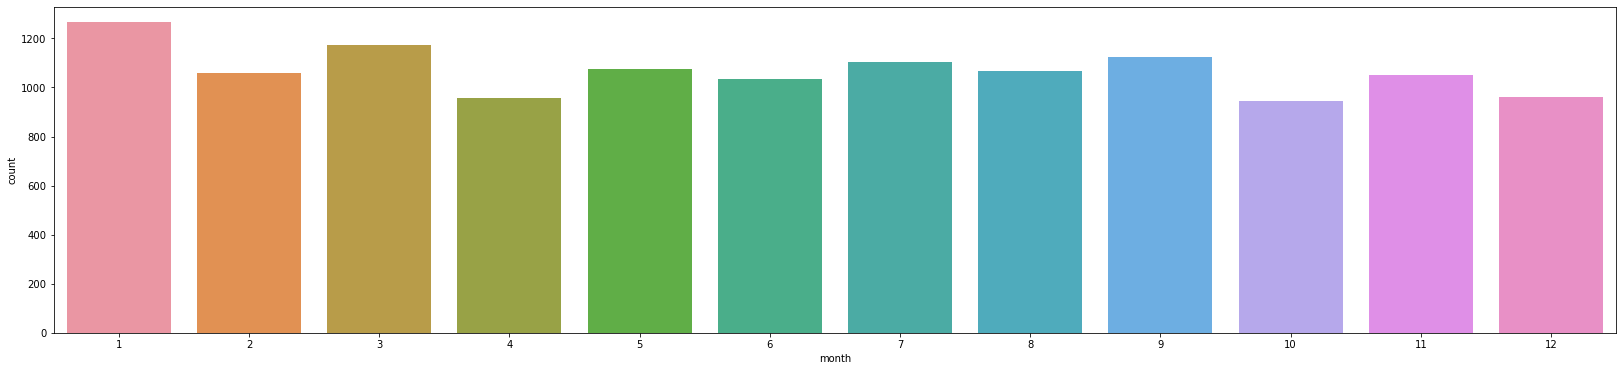

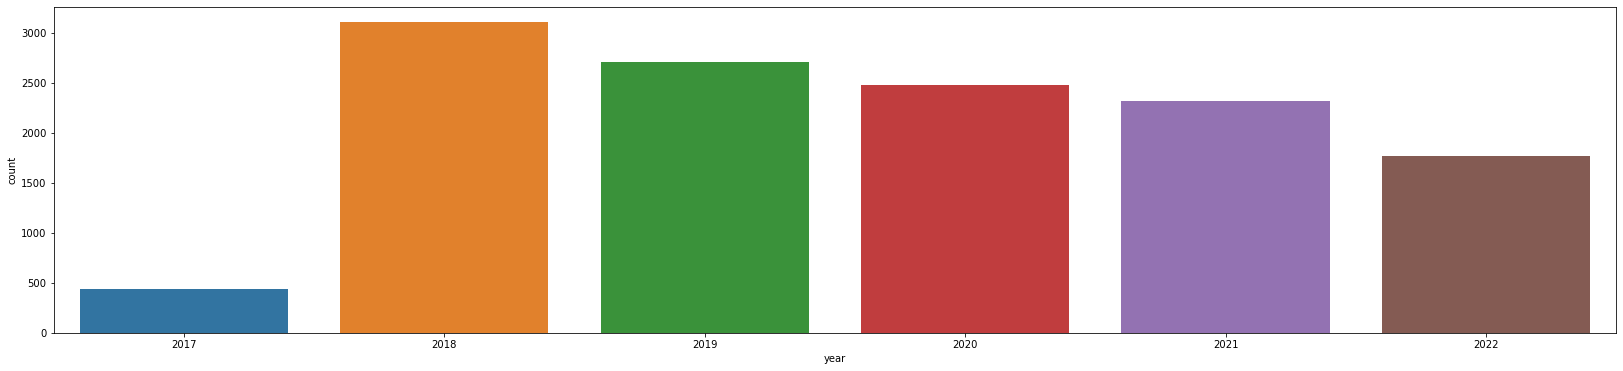

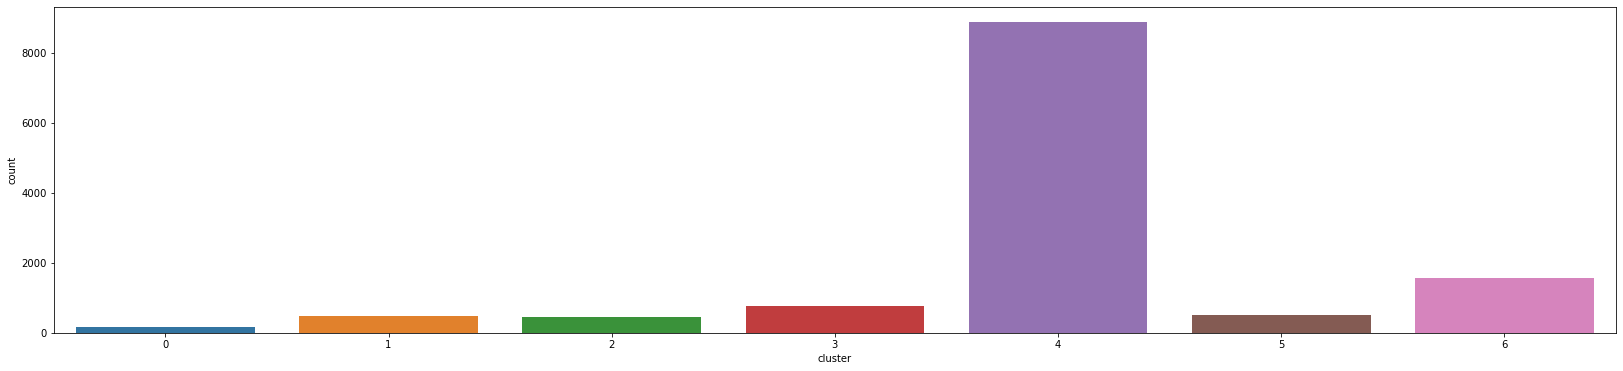

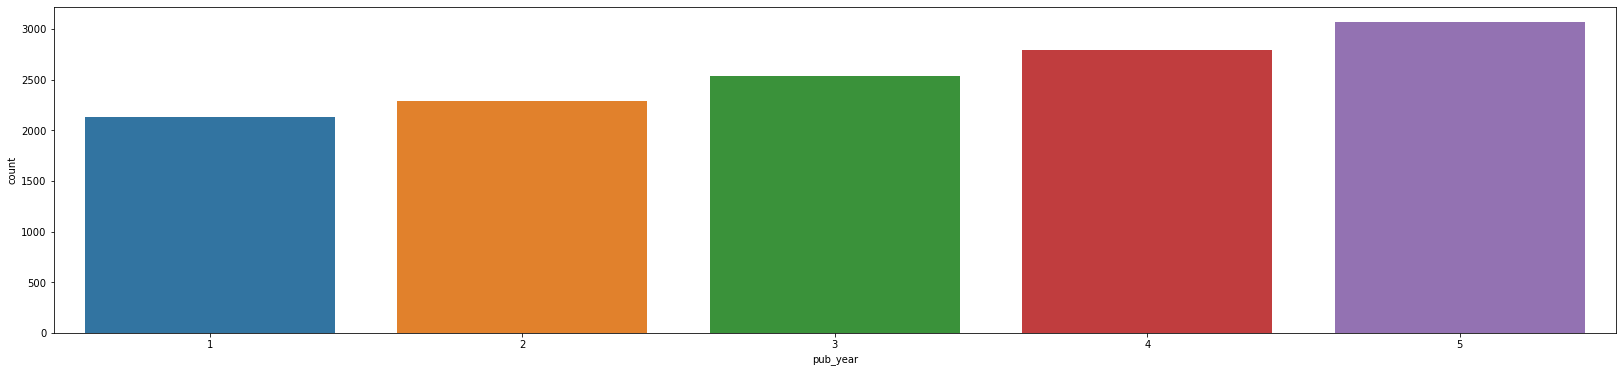

In [87]:
for column in data_ea.columns:
    plt.rcParams["figure.figsize"] = (28,6)
    sns.countplot(x=data_ea[column])
    plt.show()

## Re-Check via Histogram

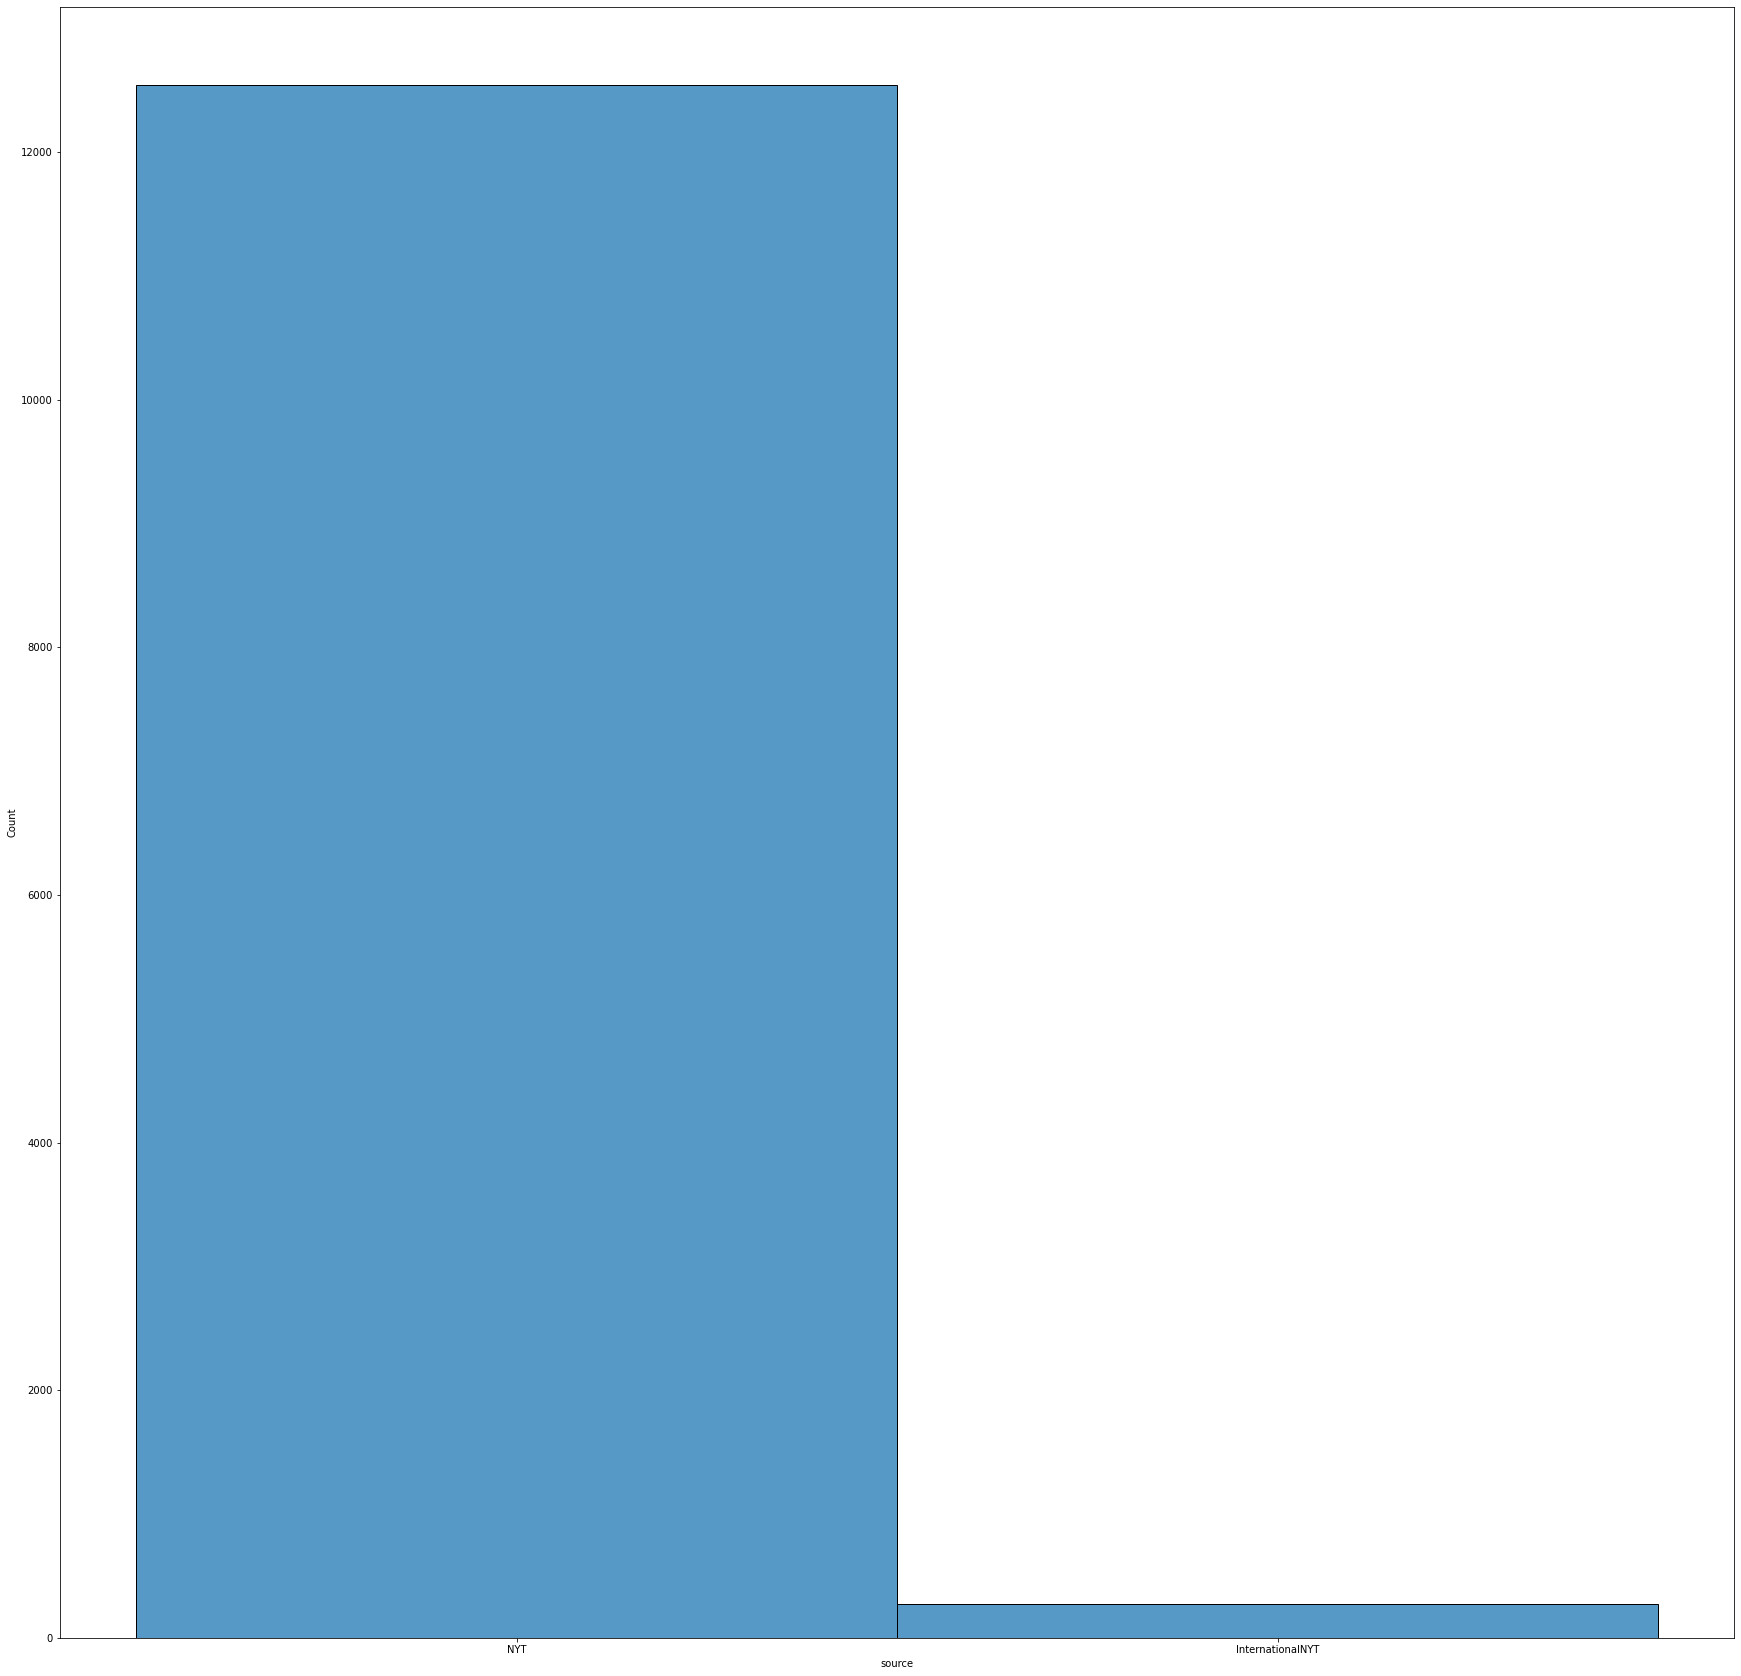

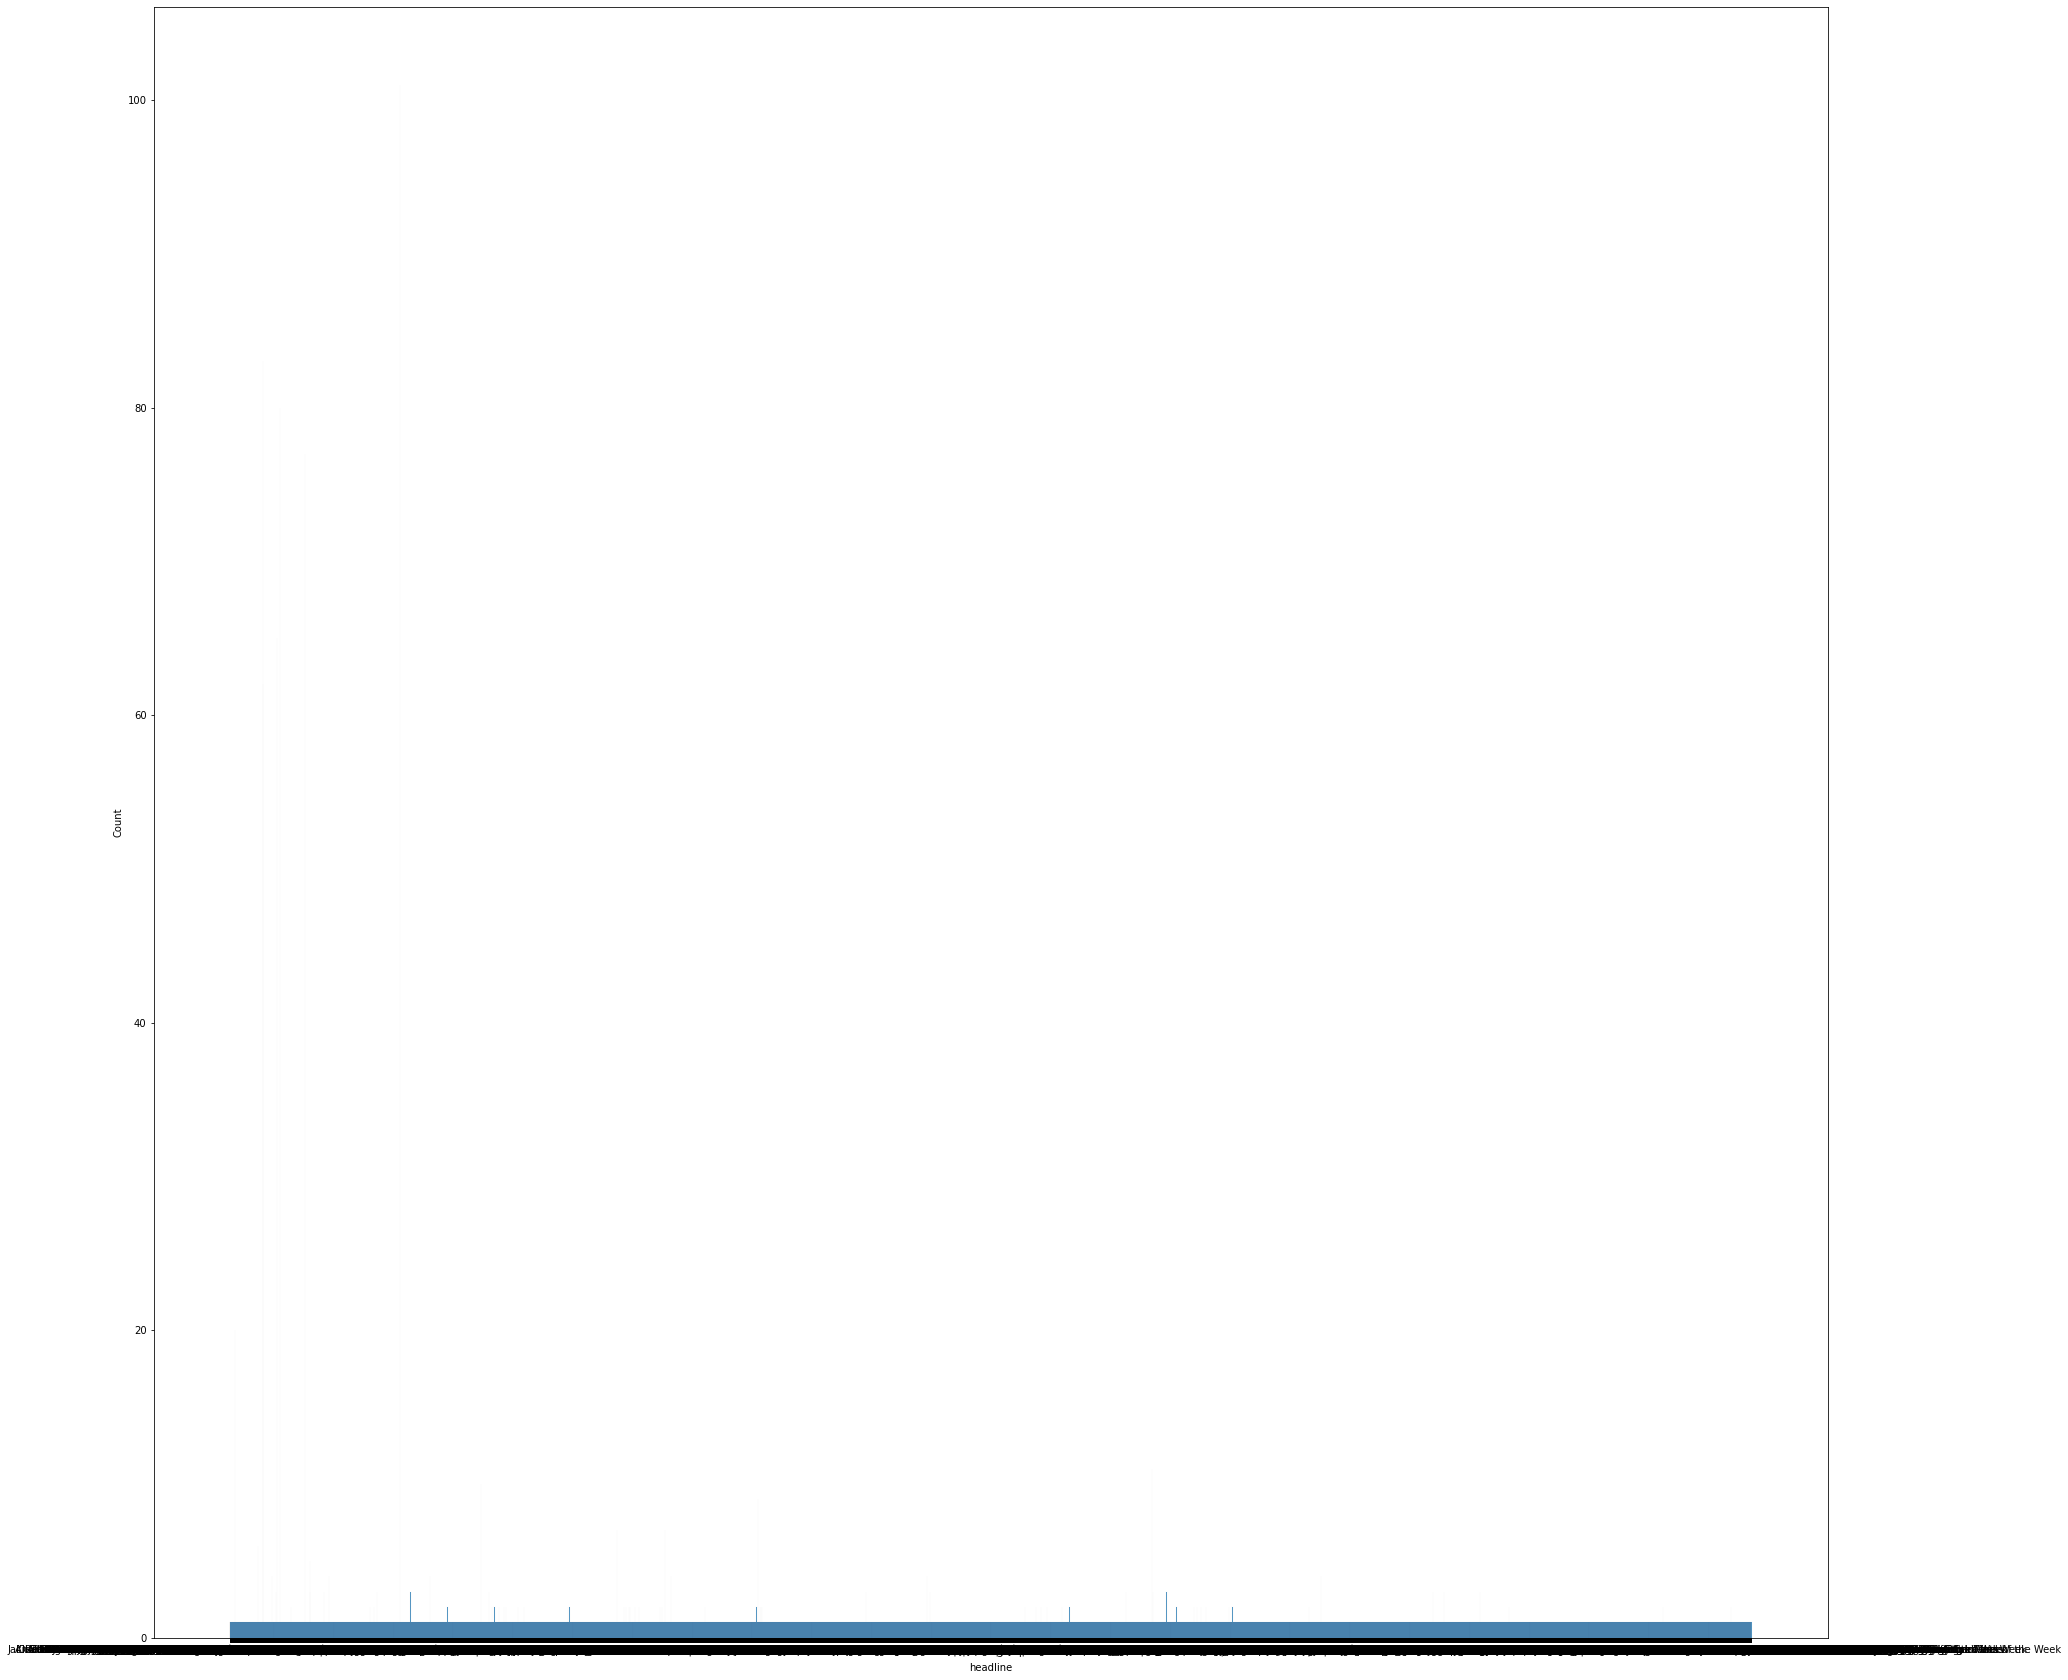

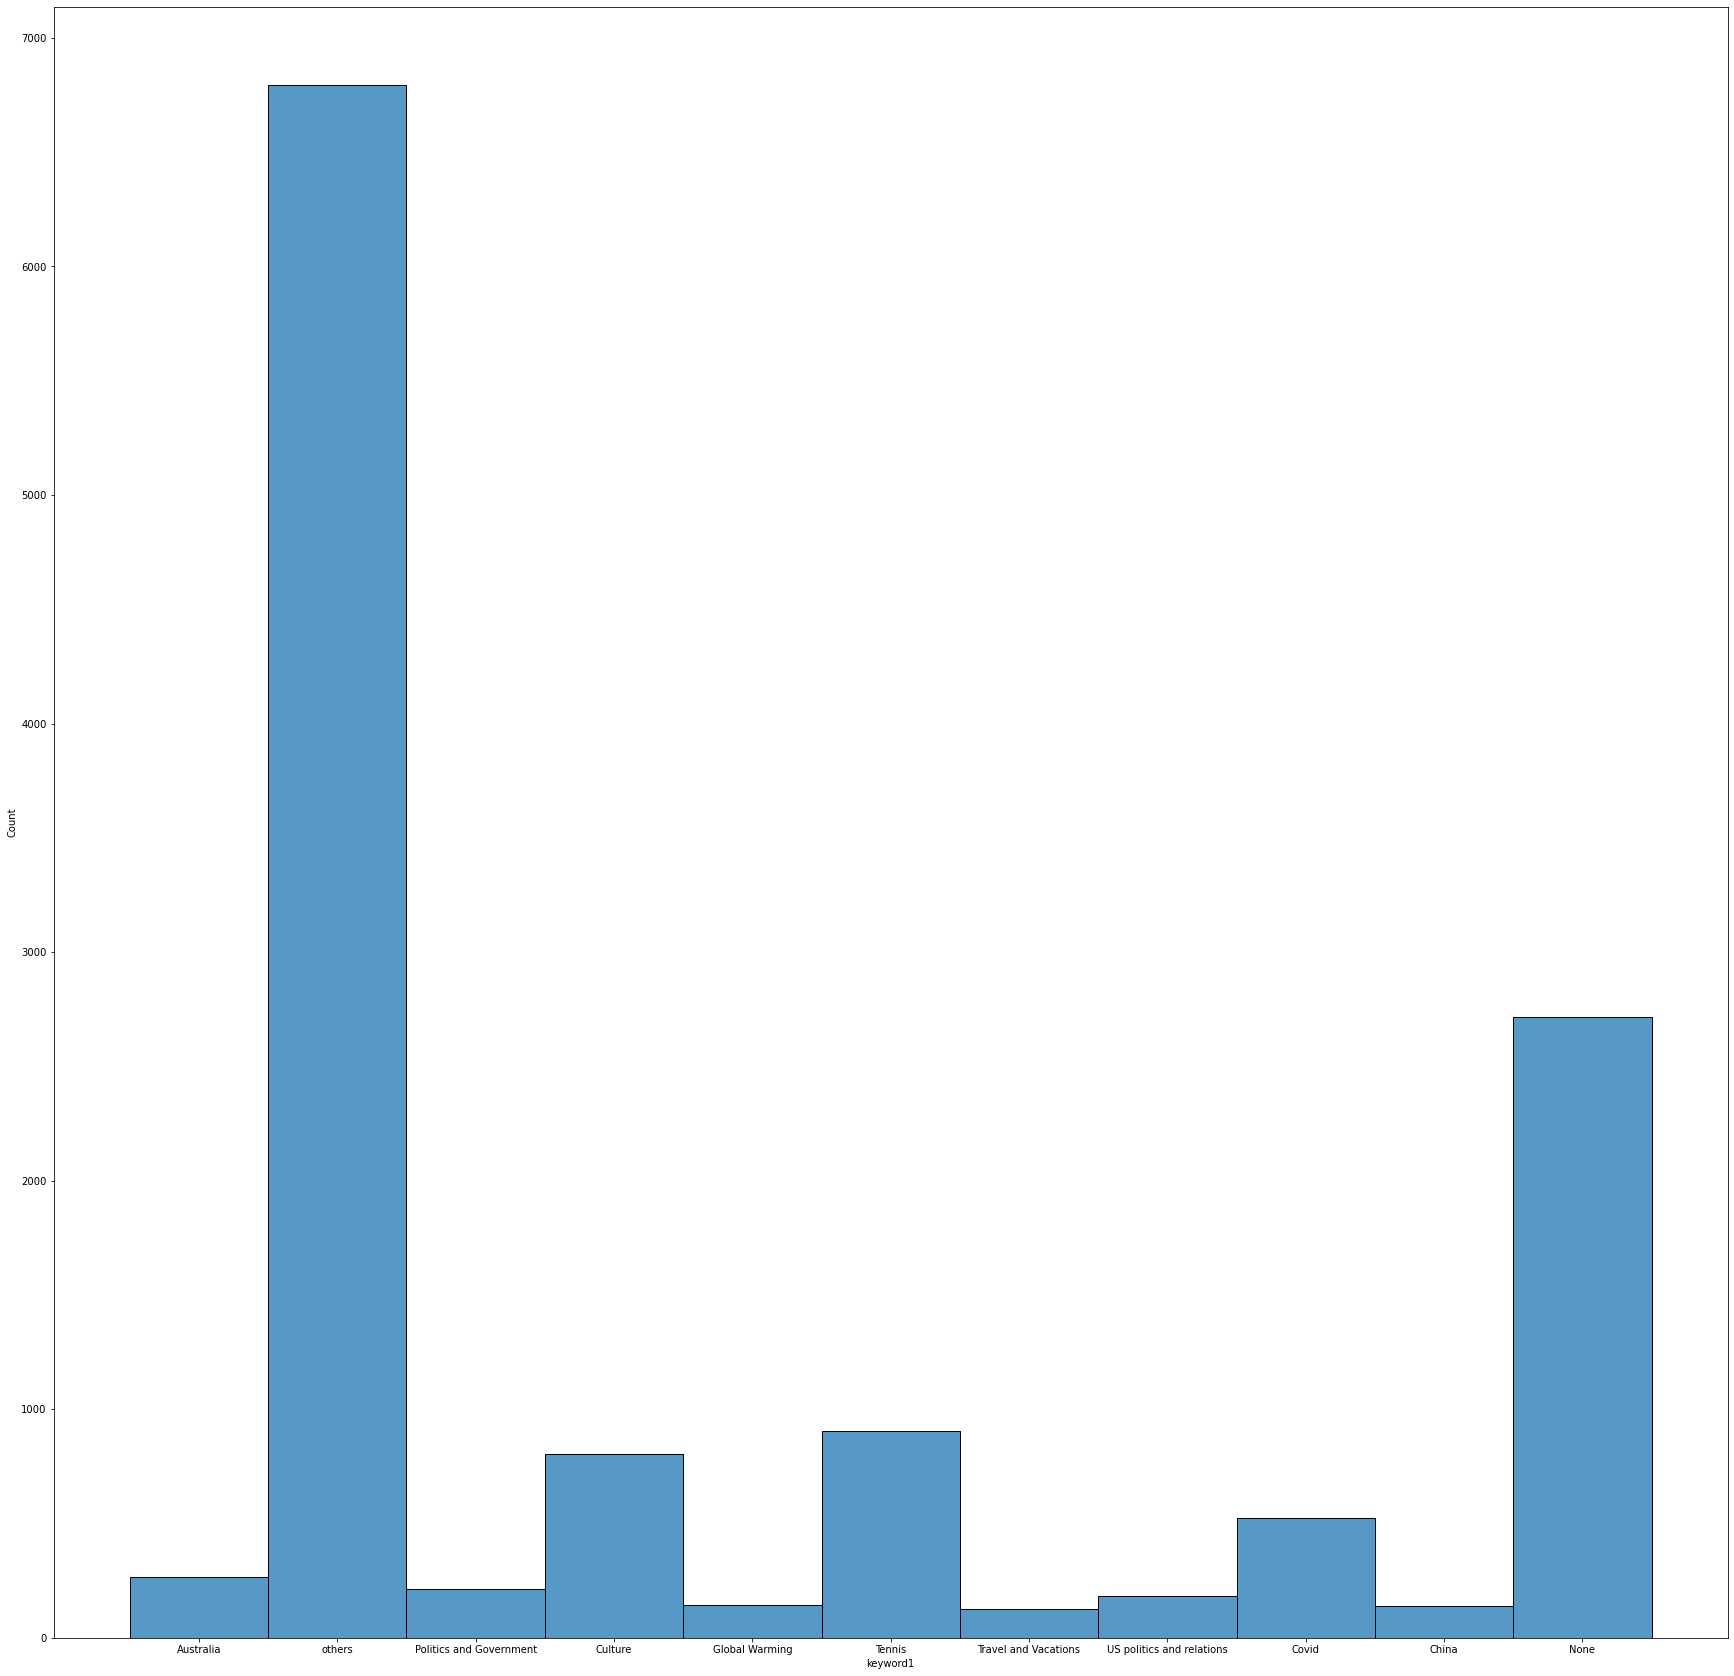

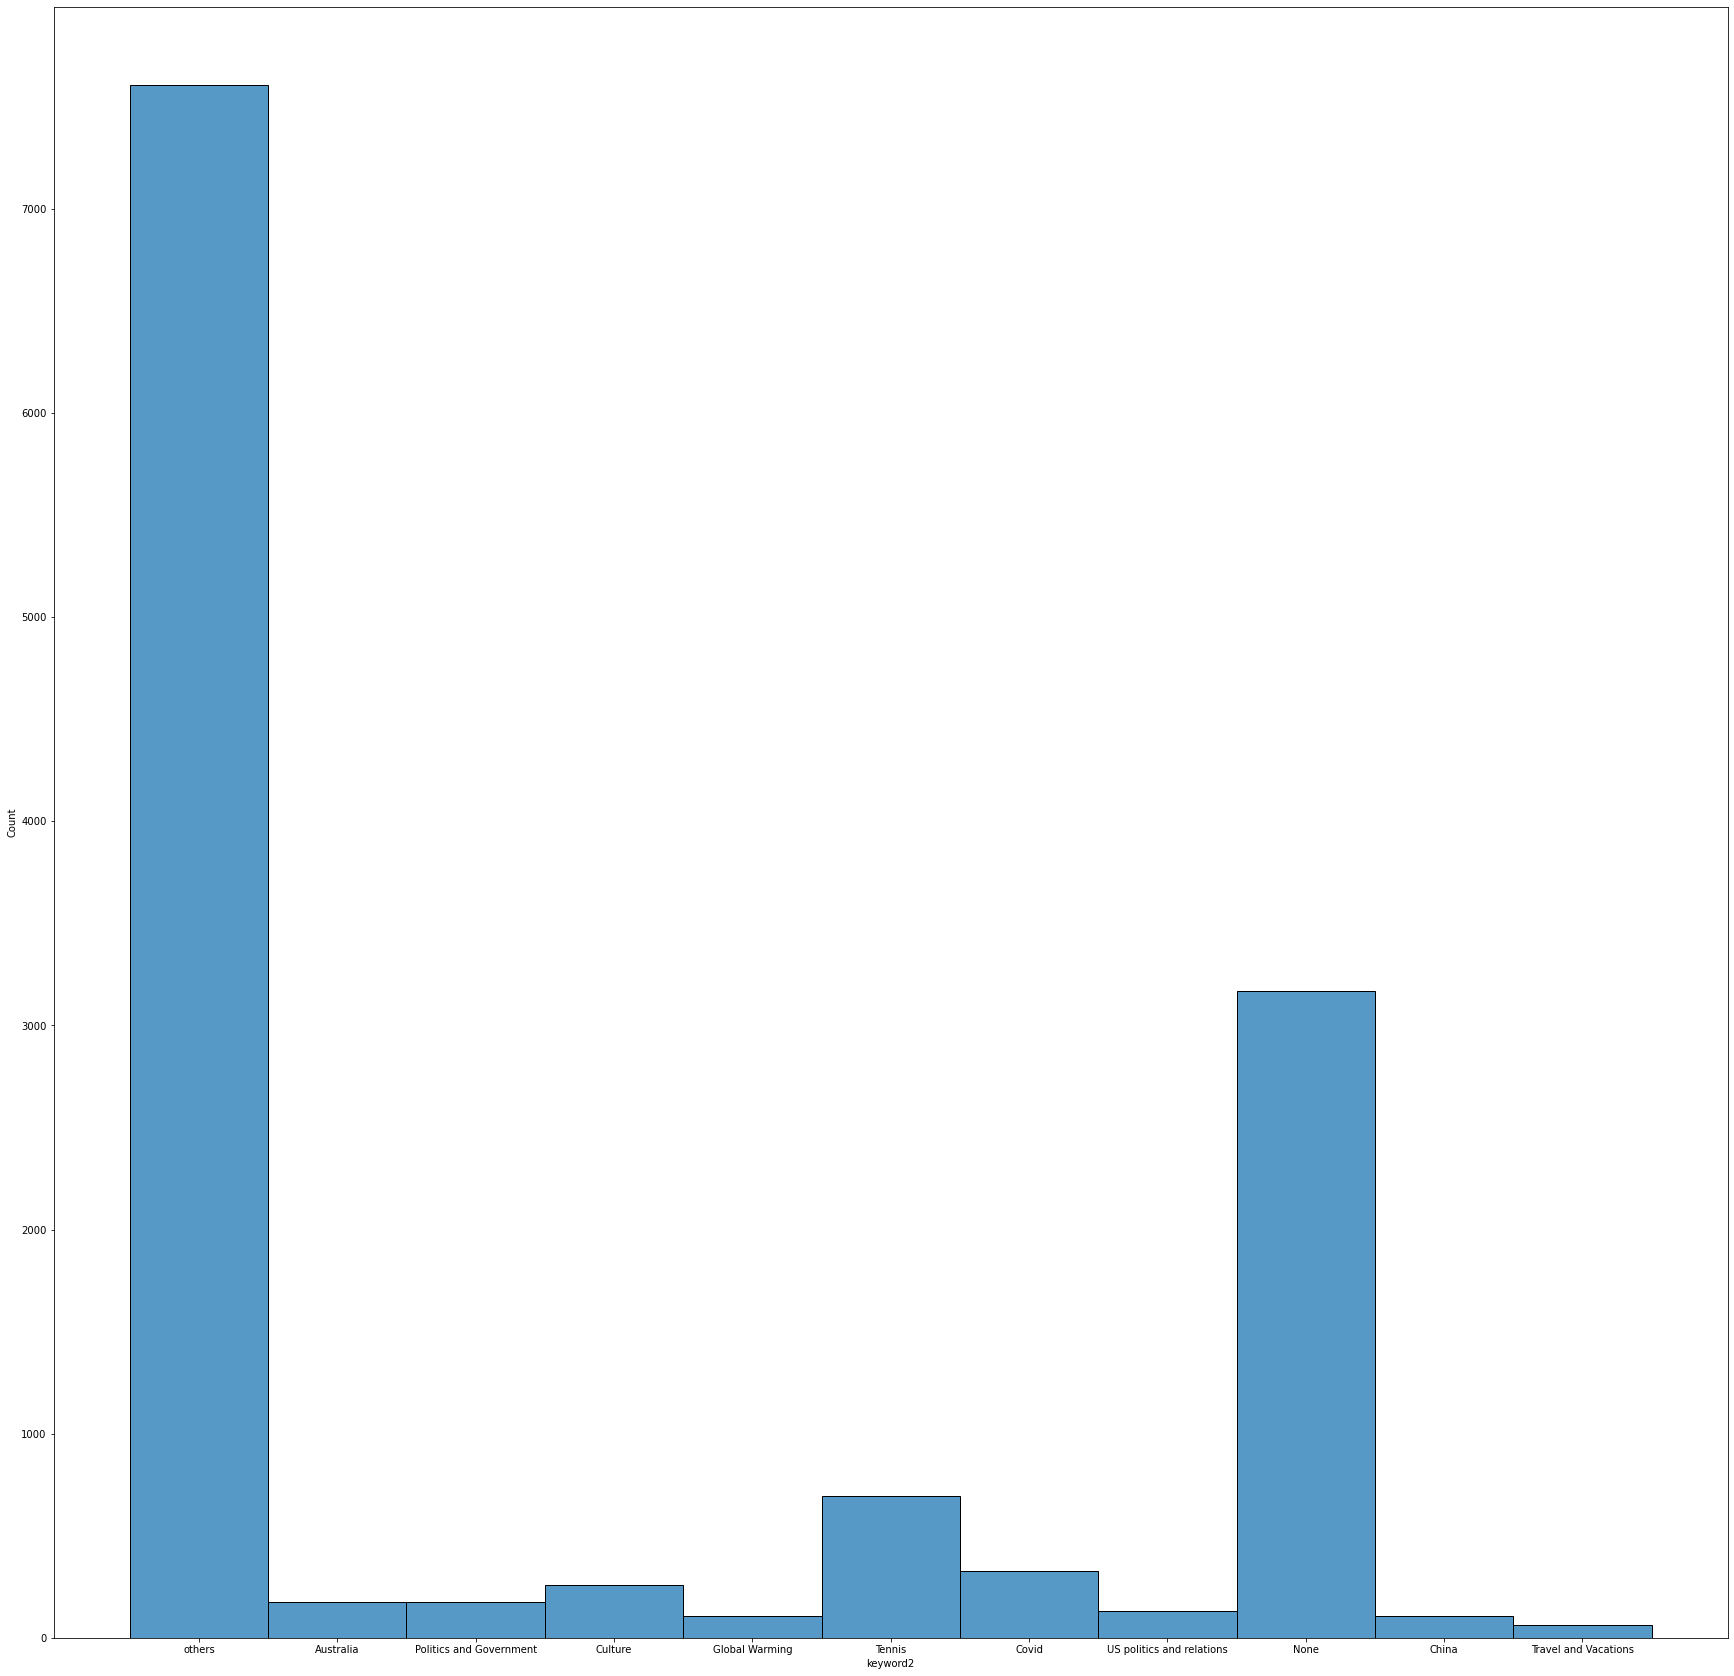

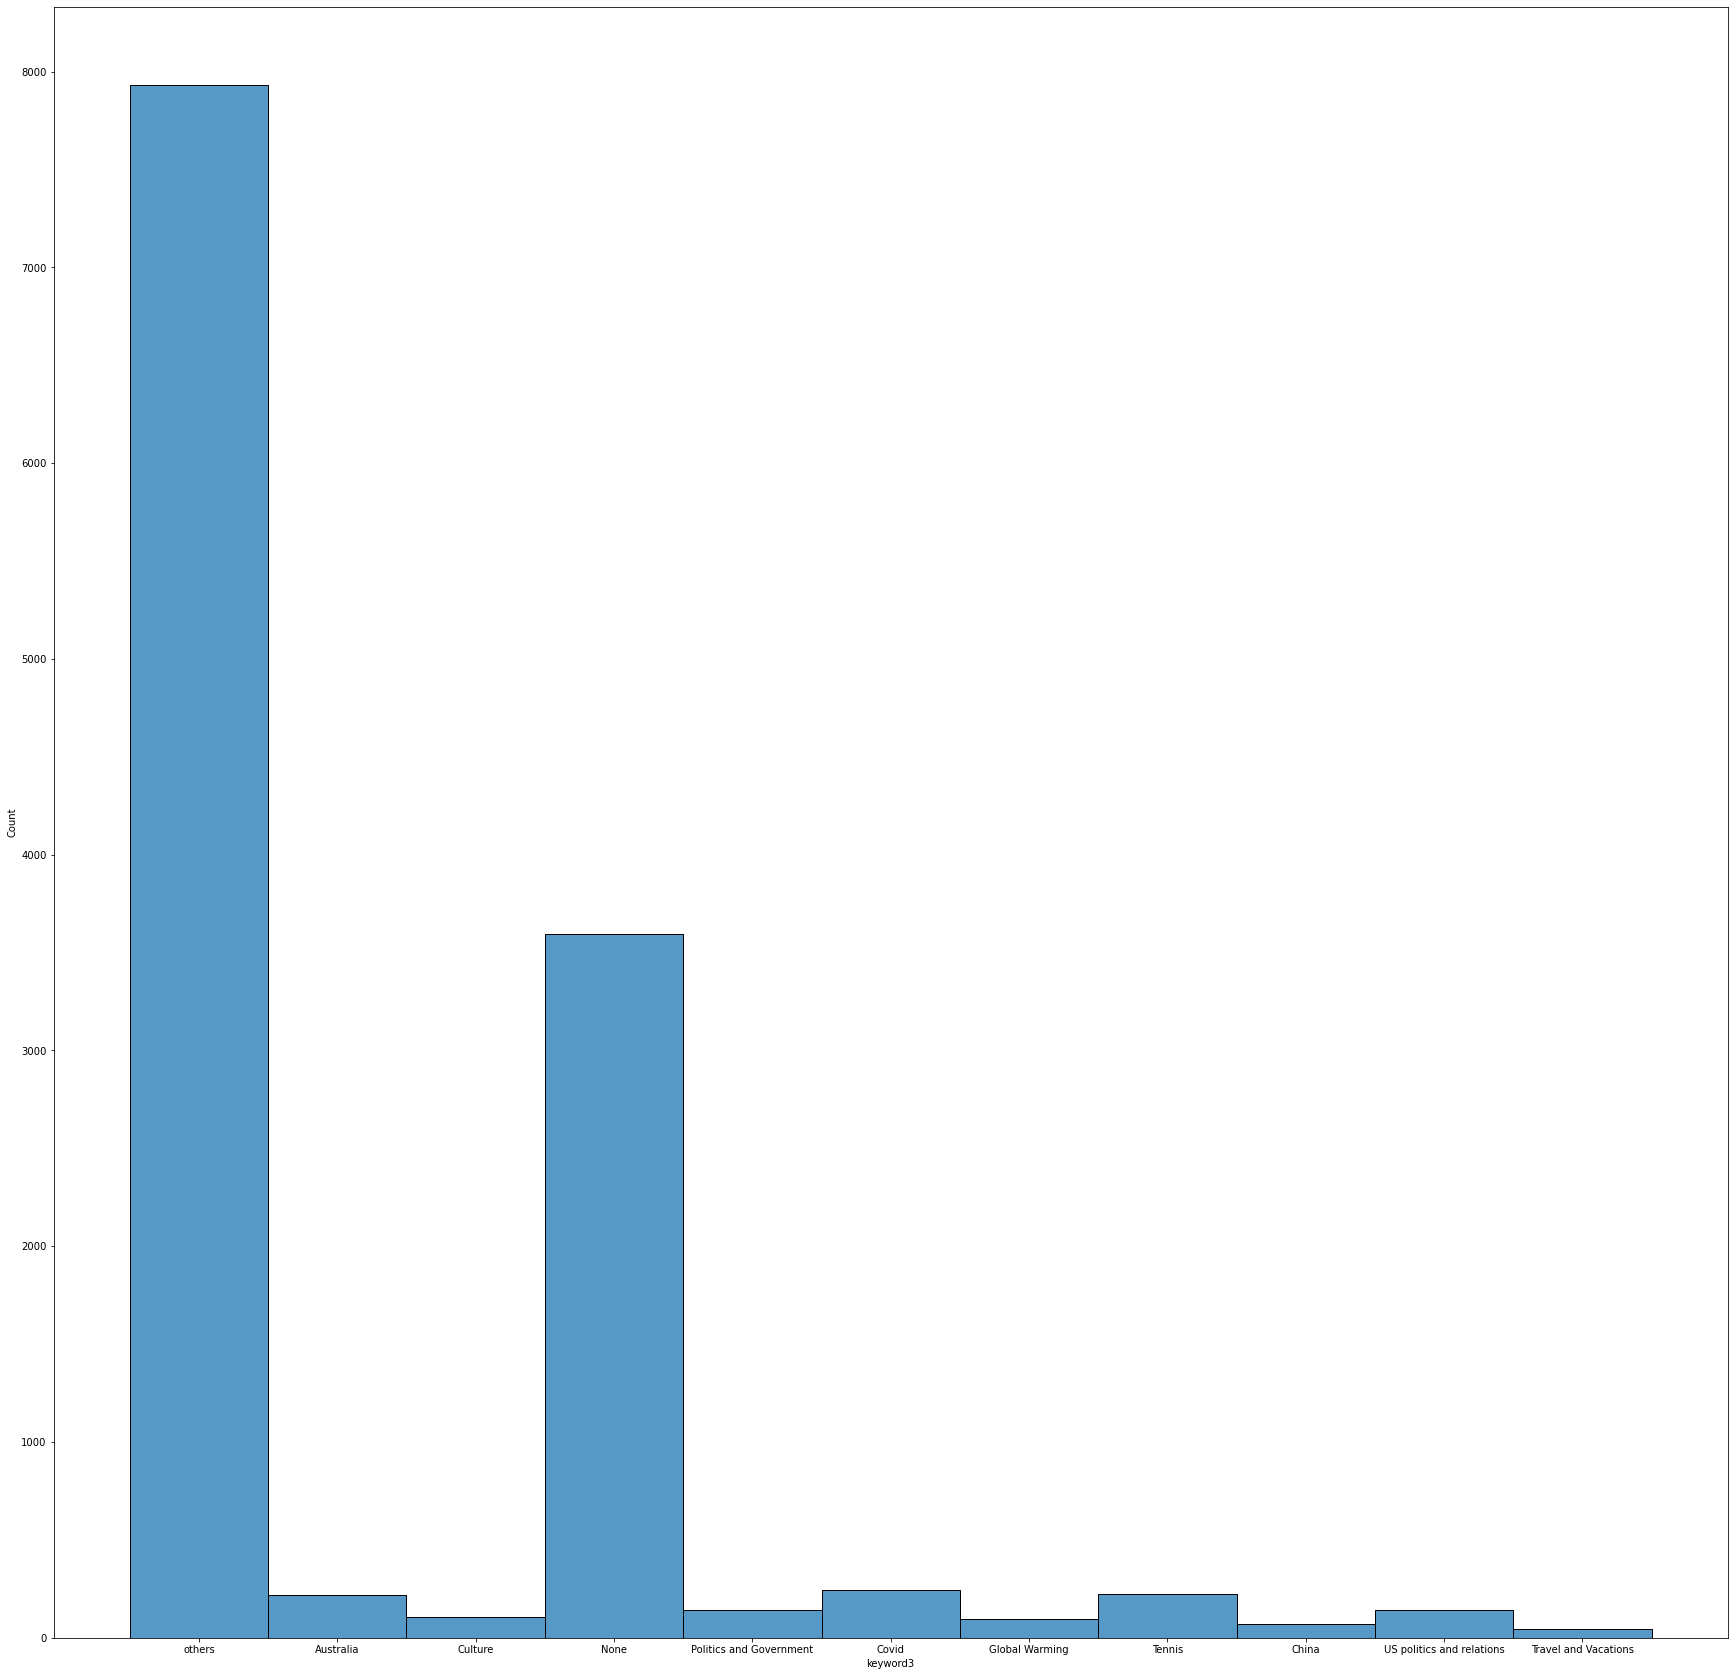

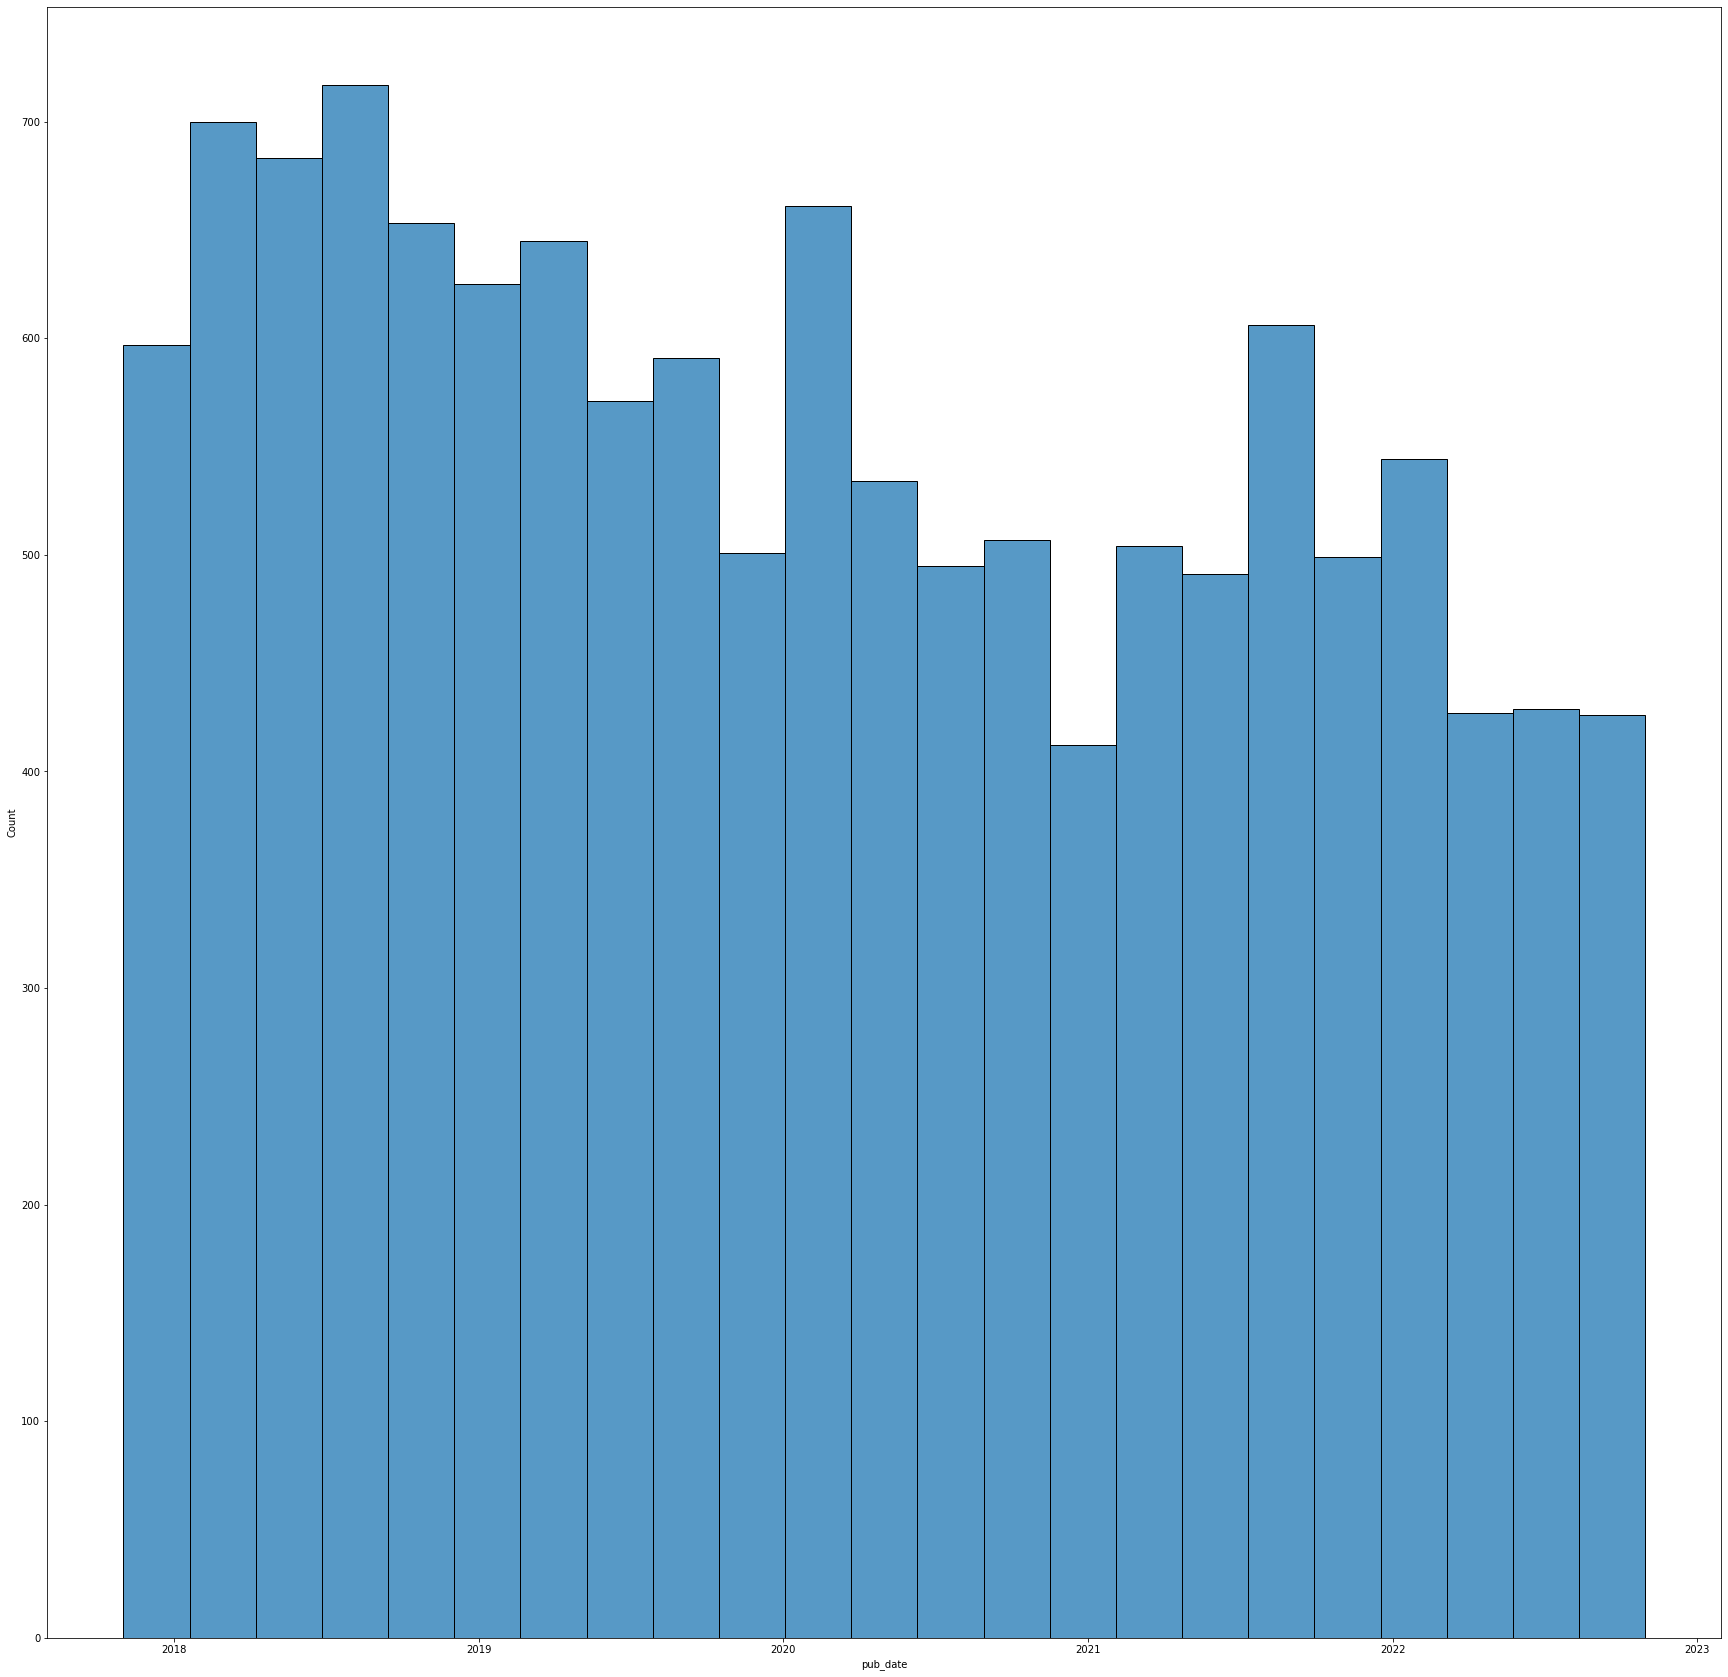

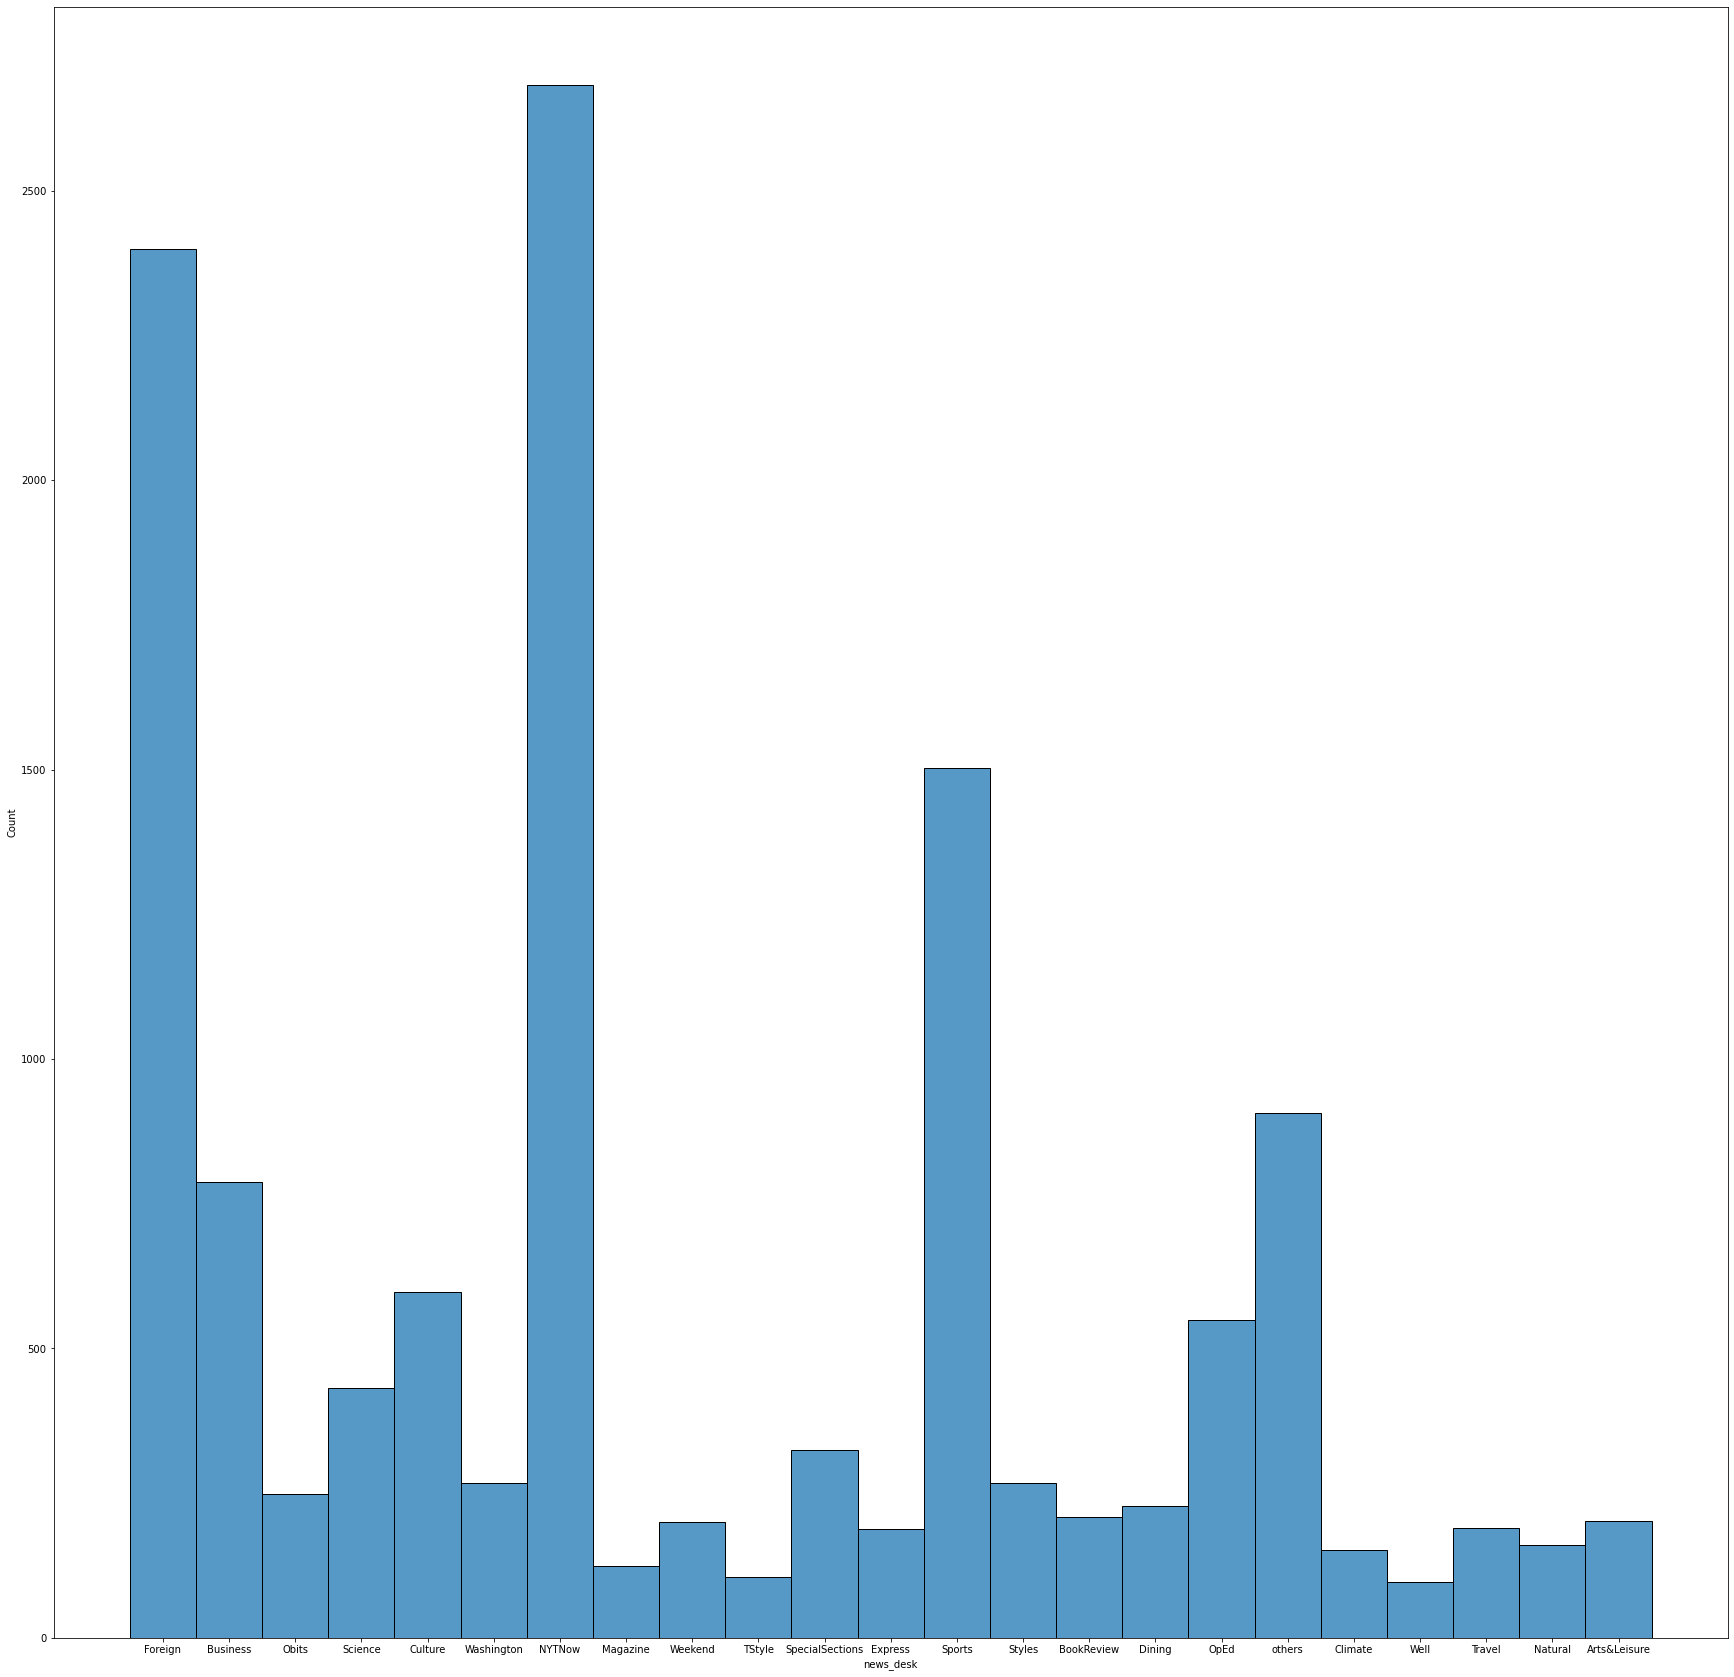

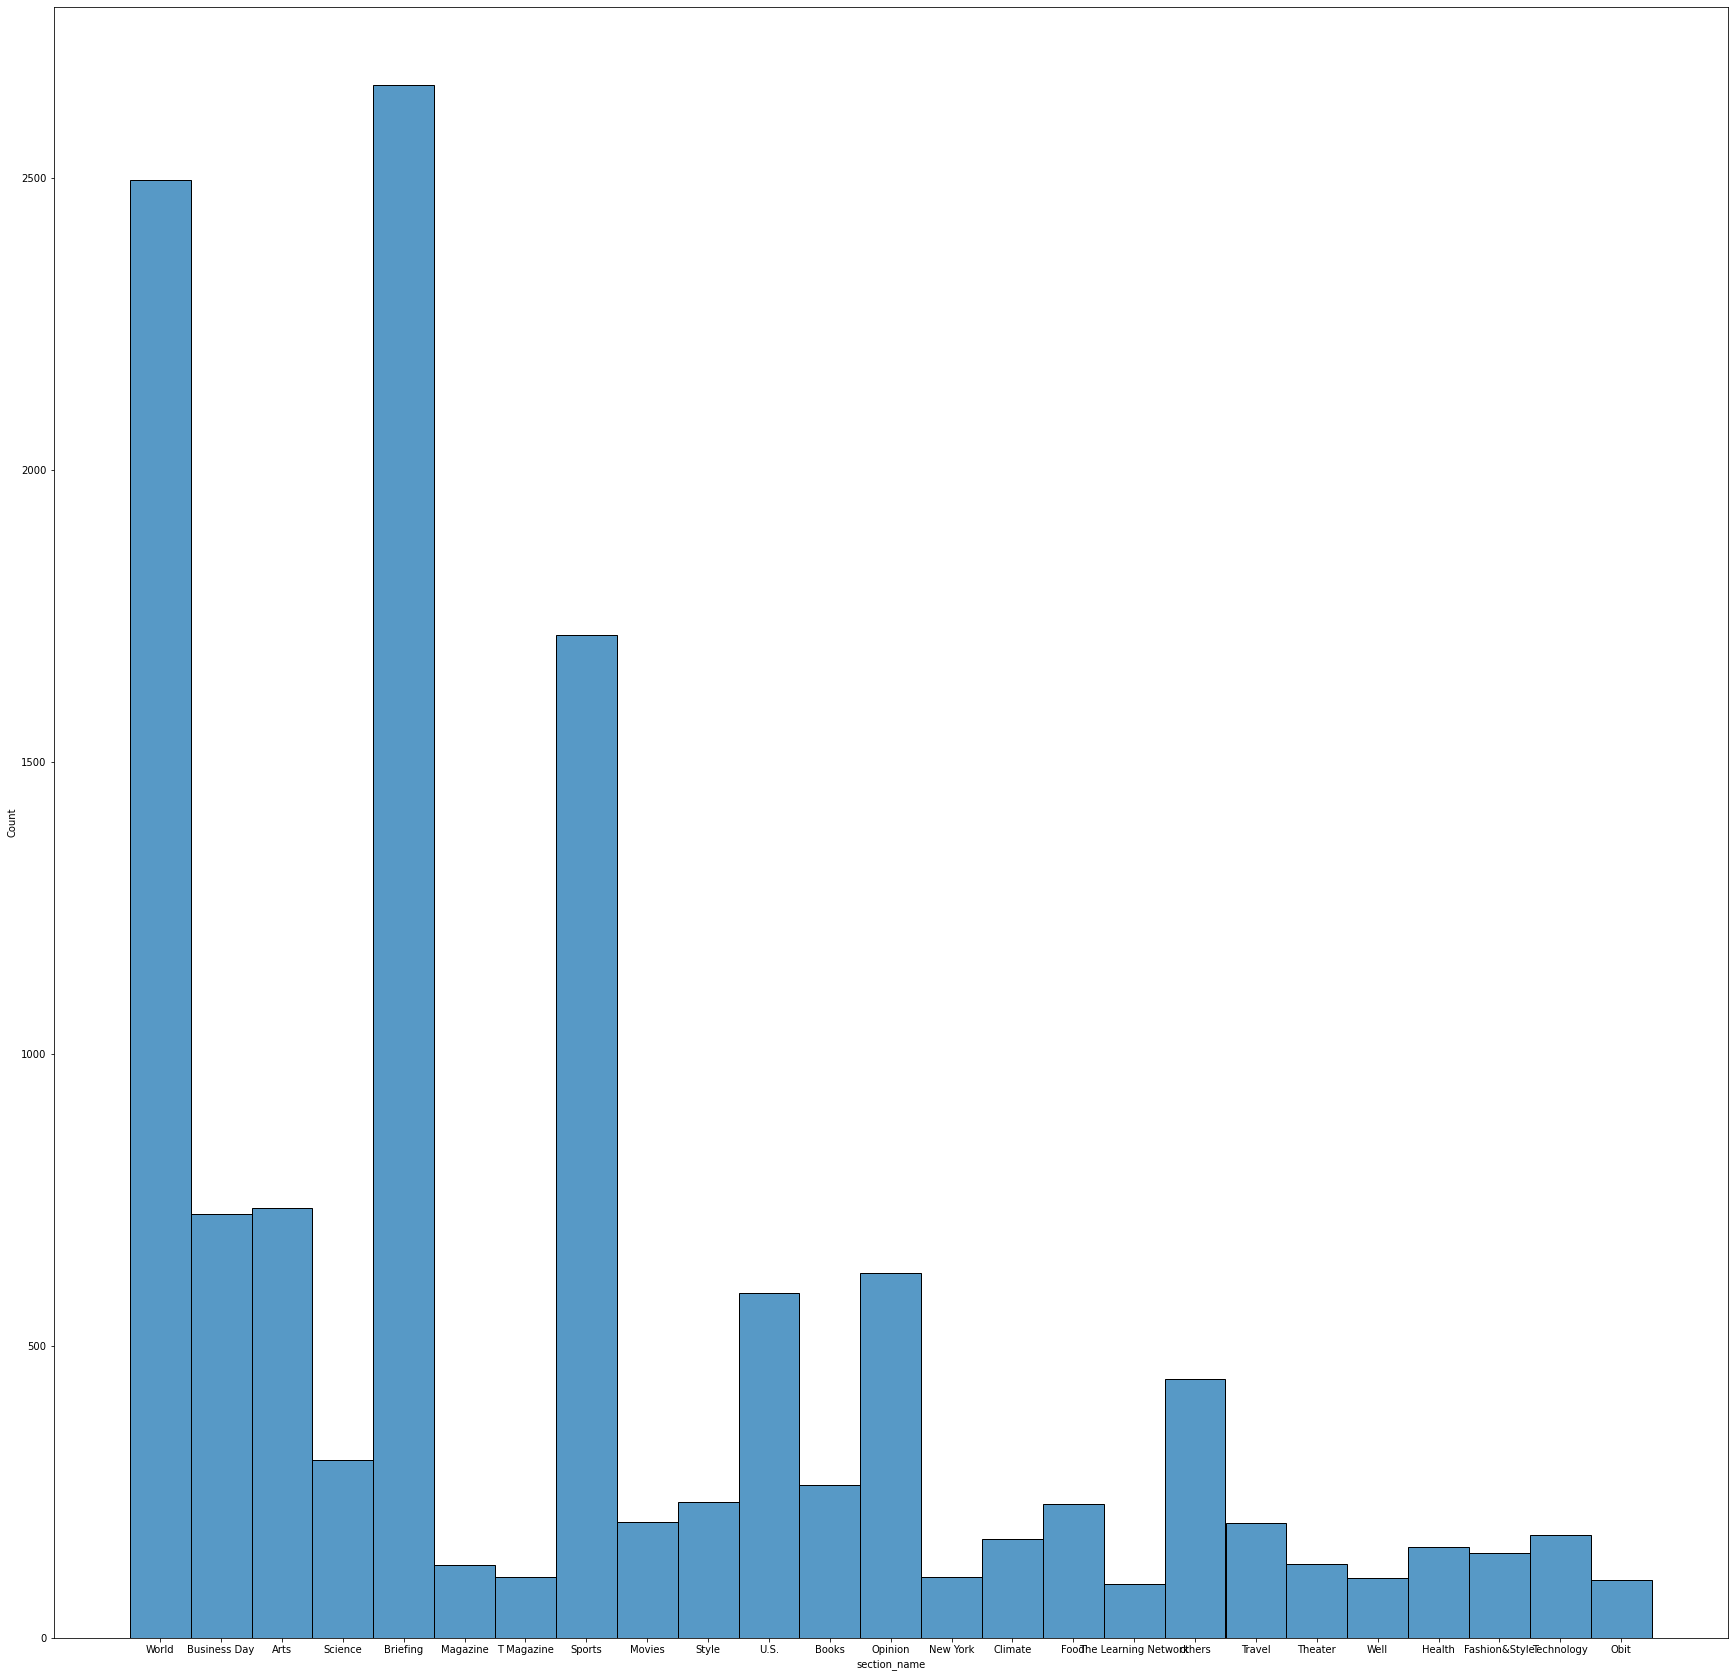

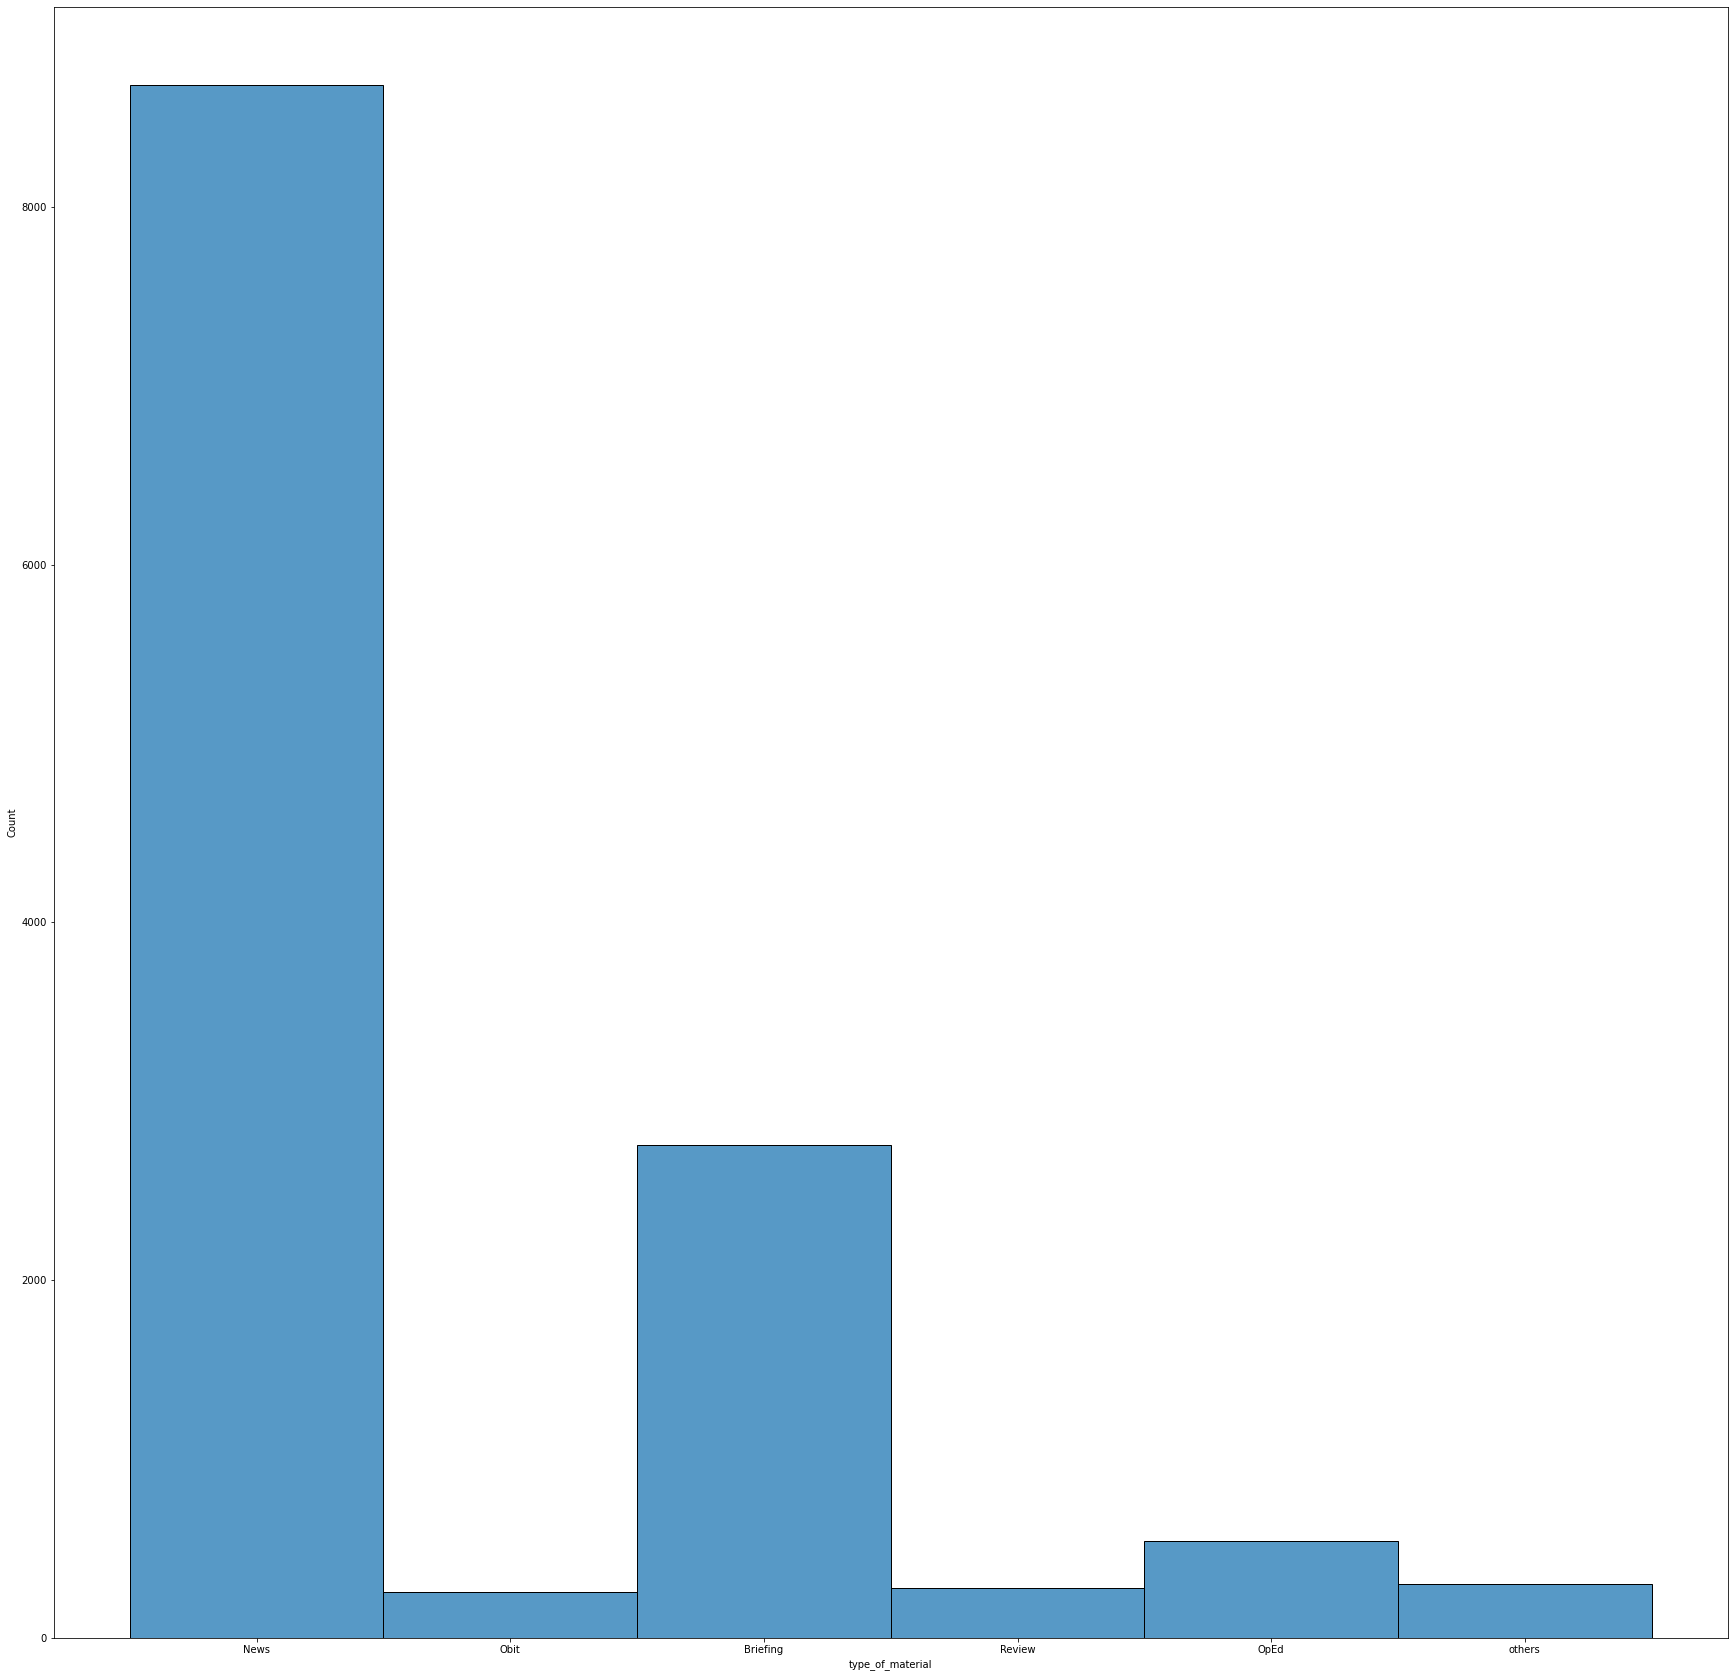

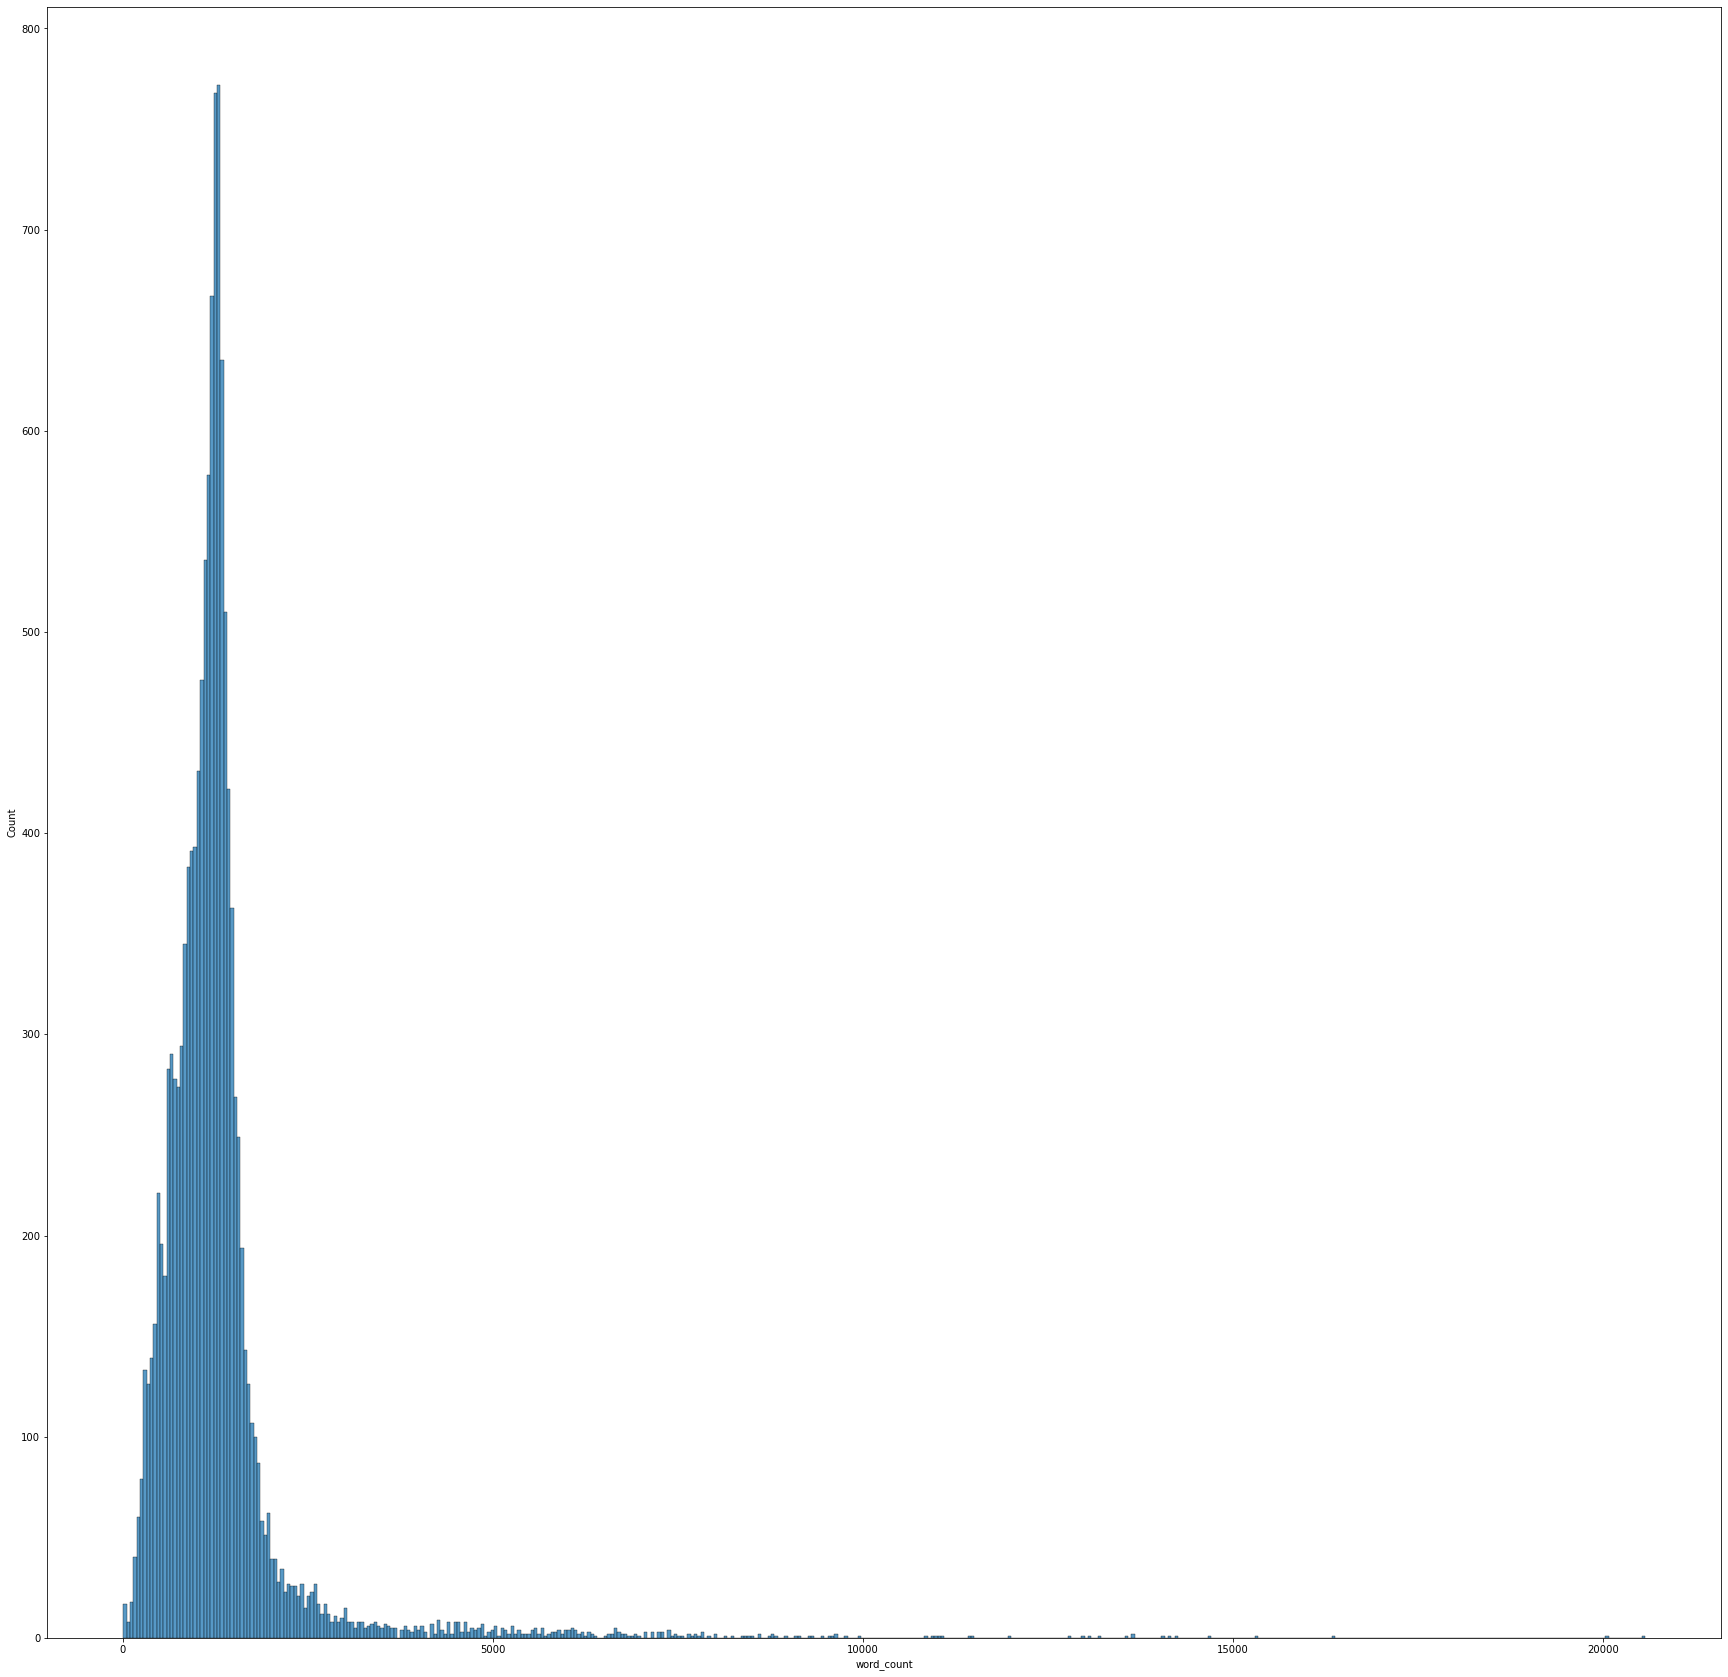

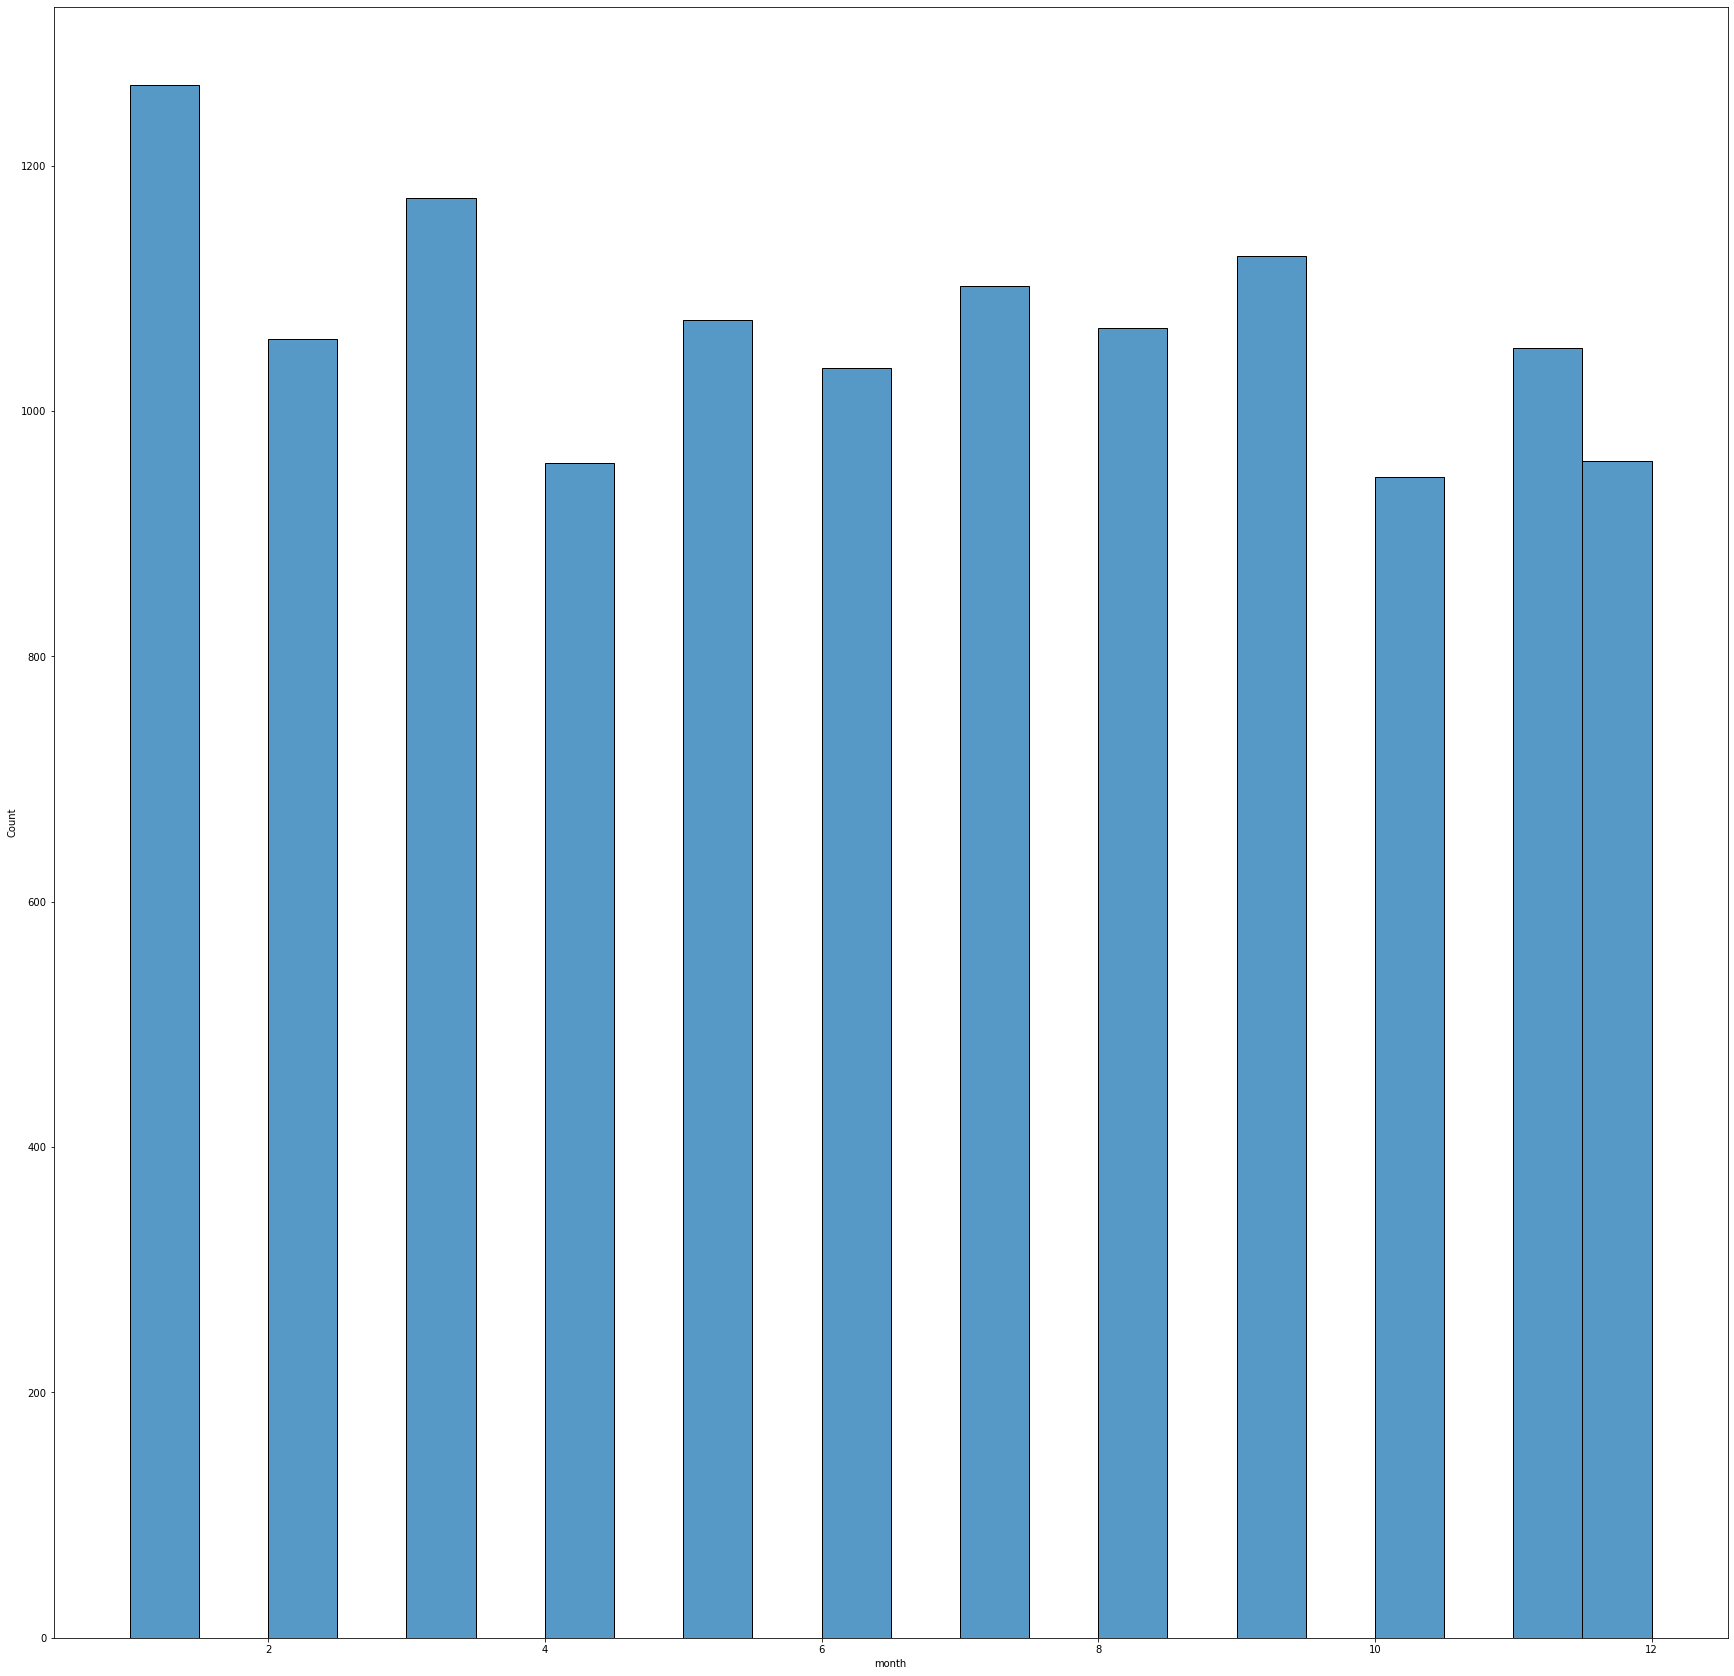

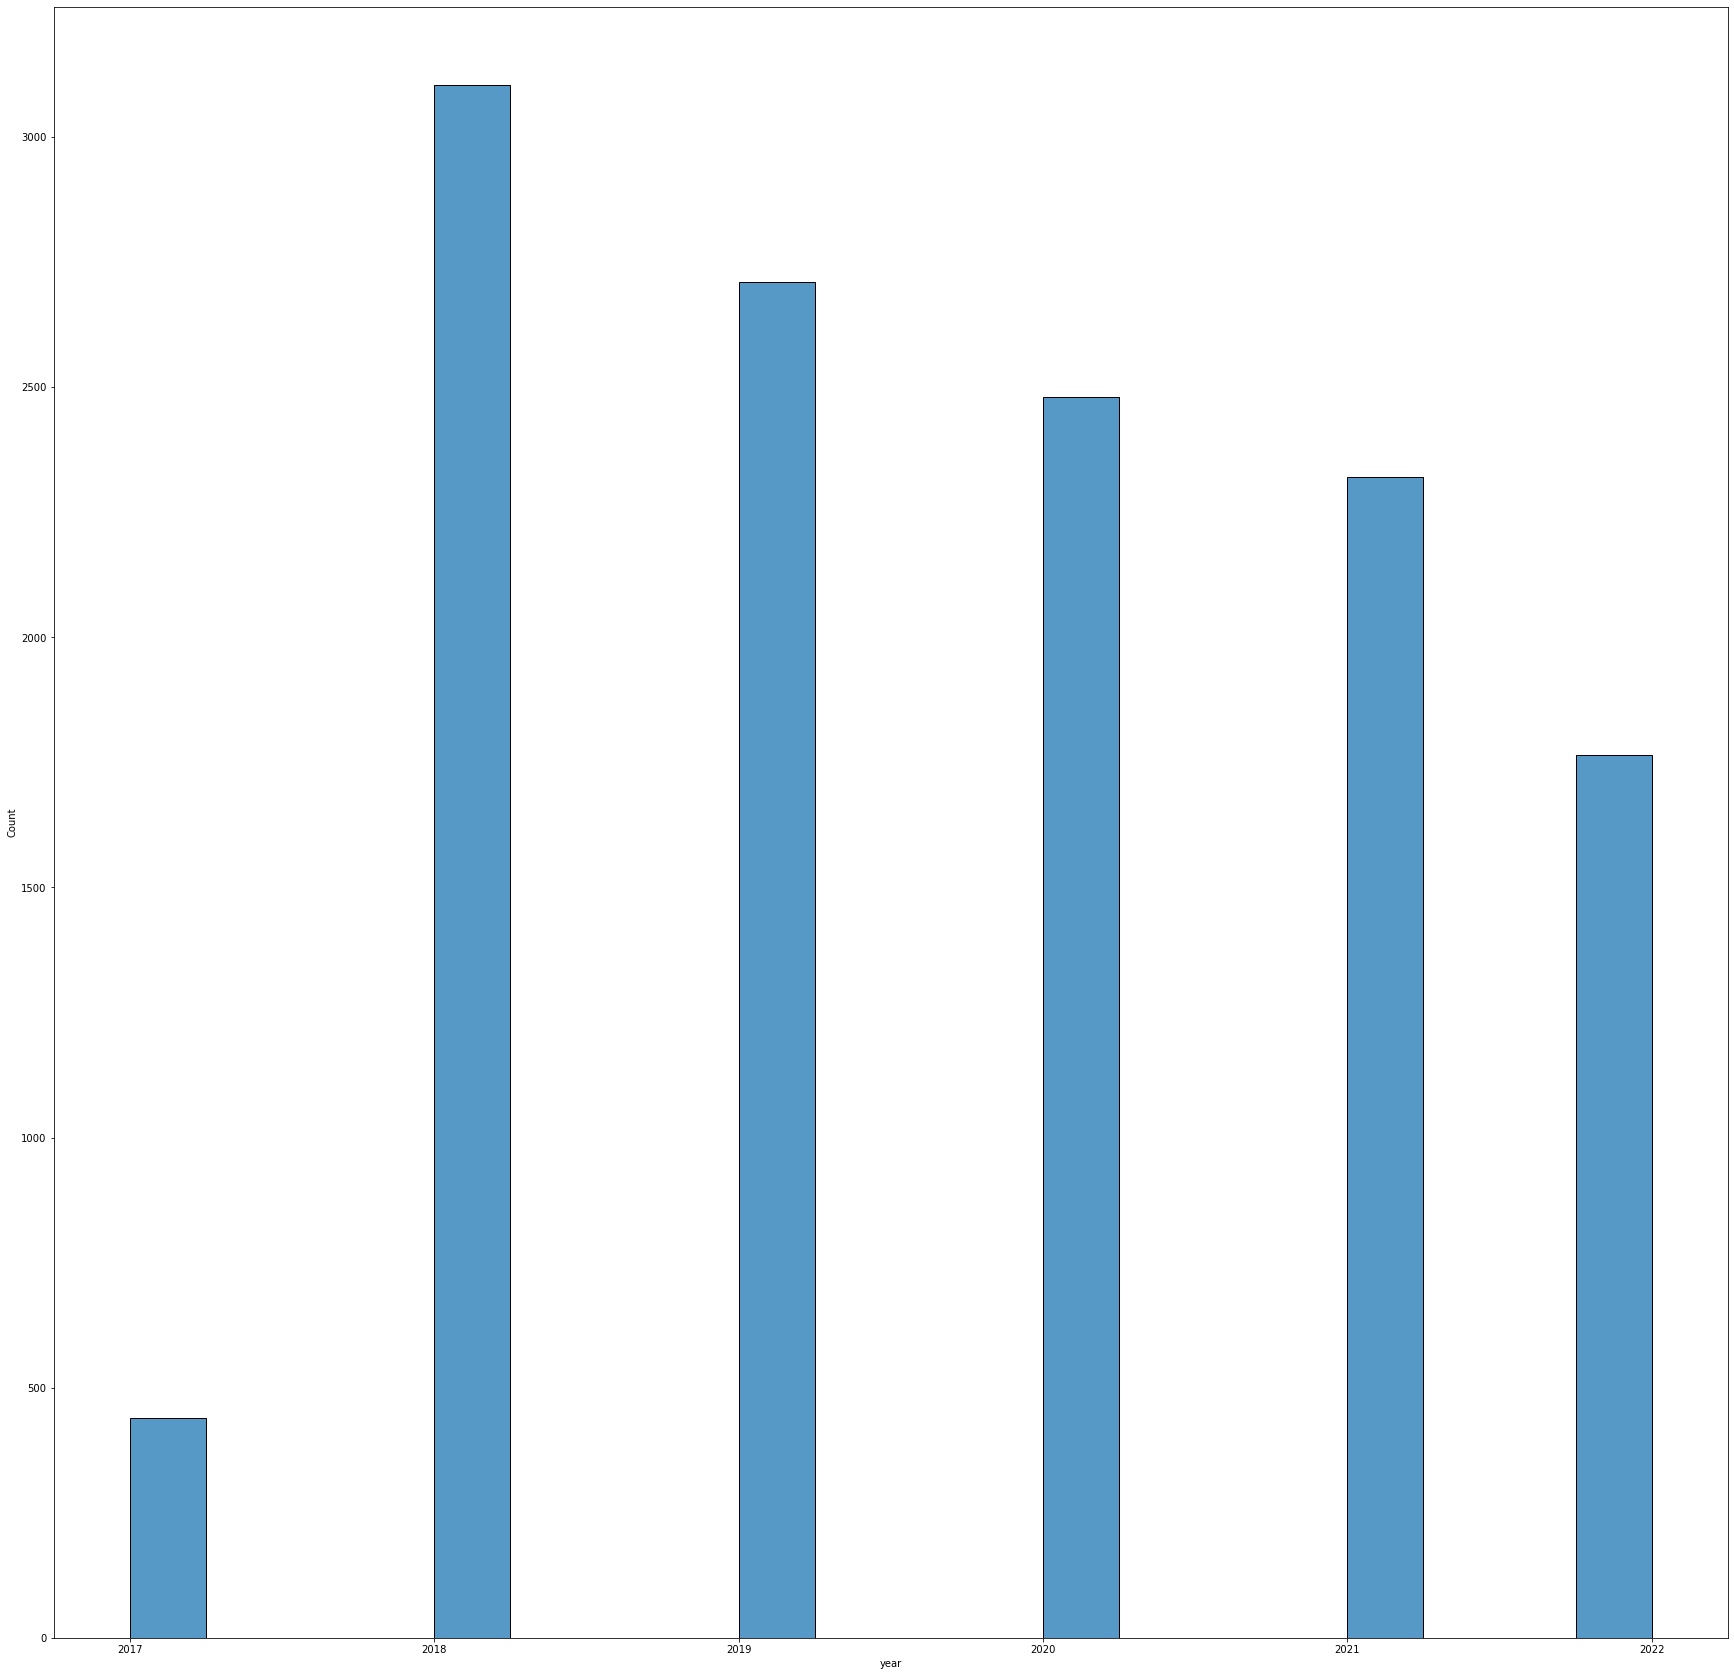

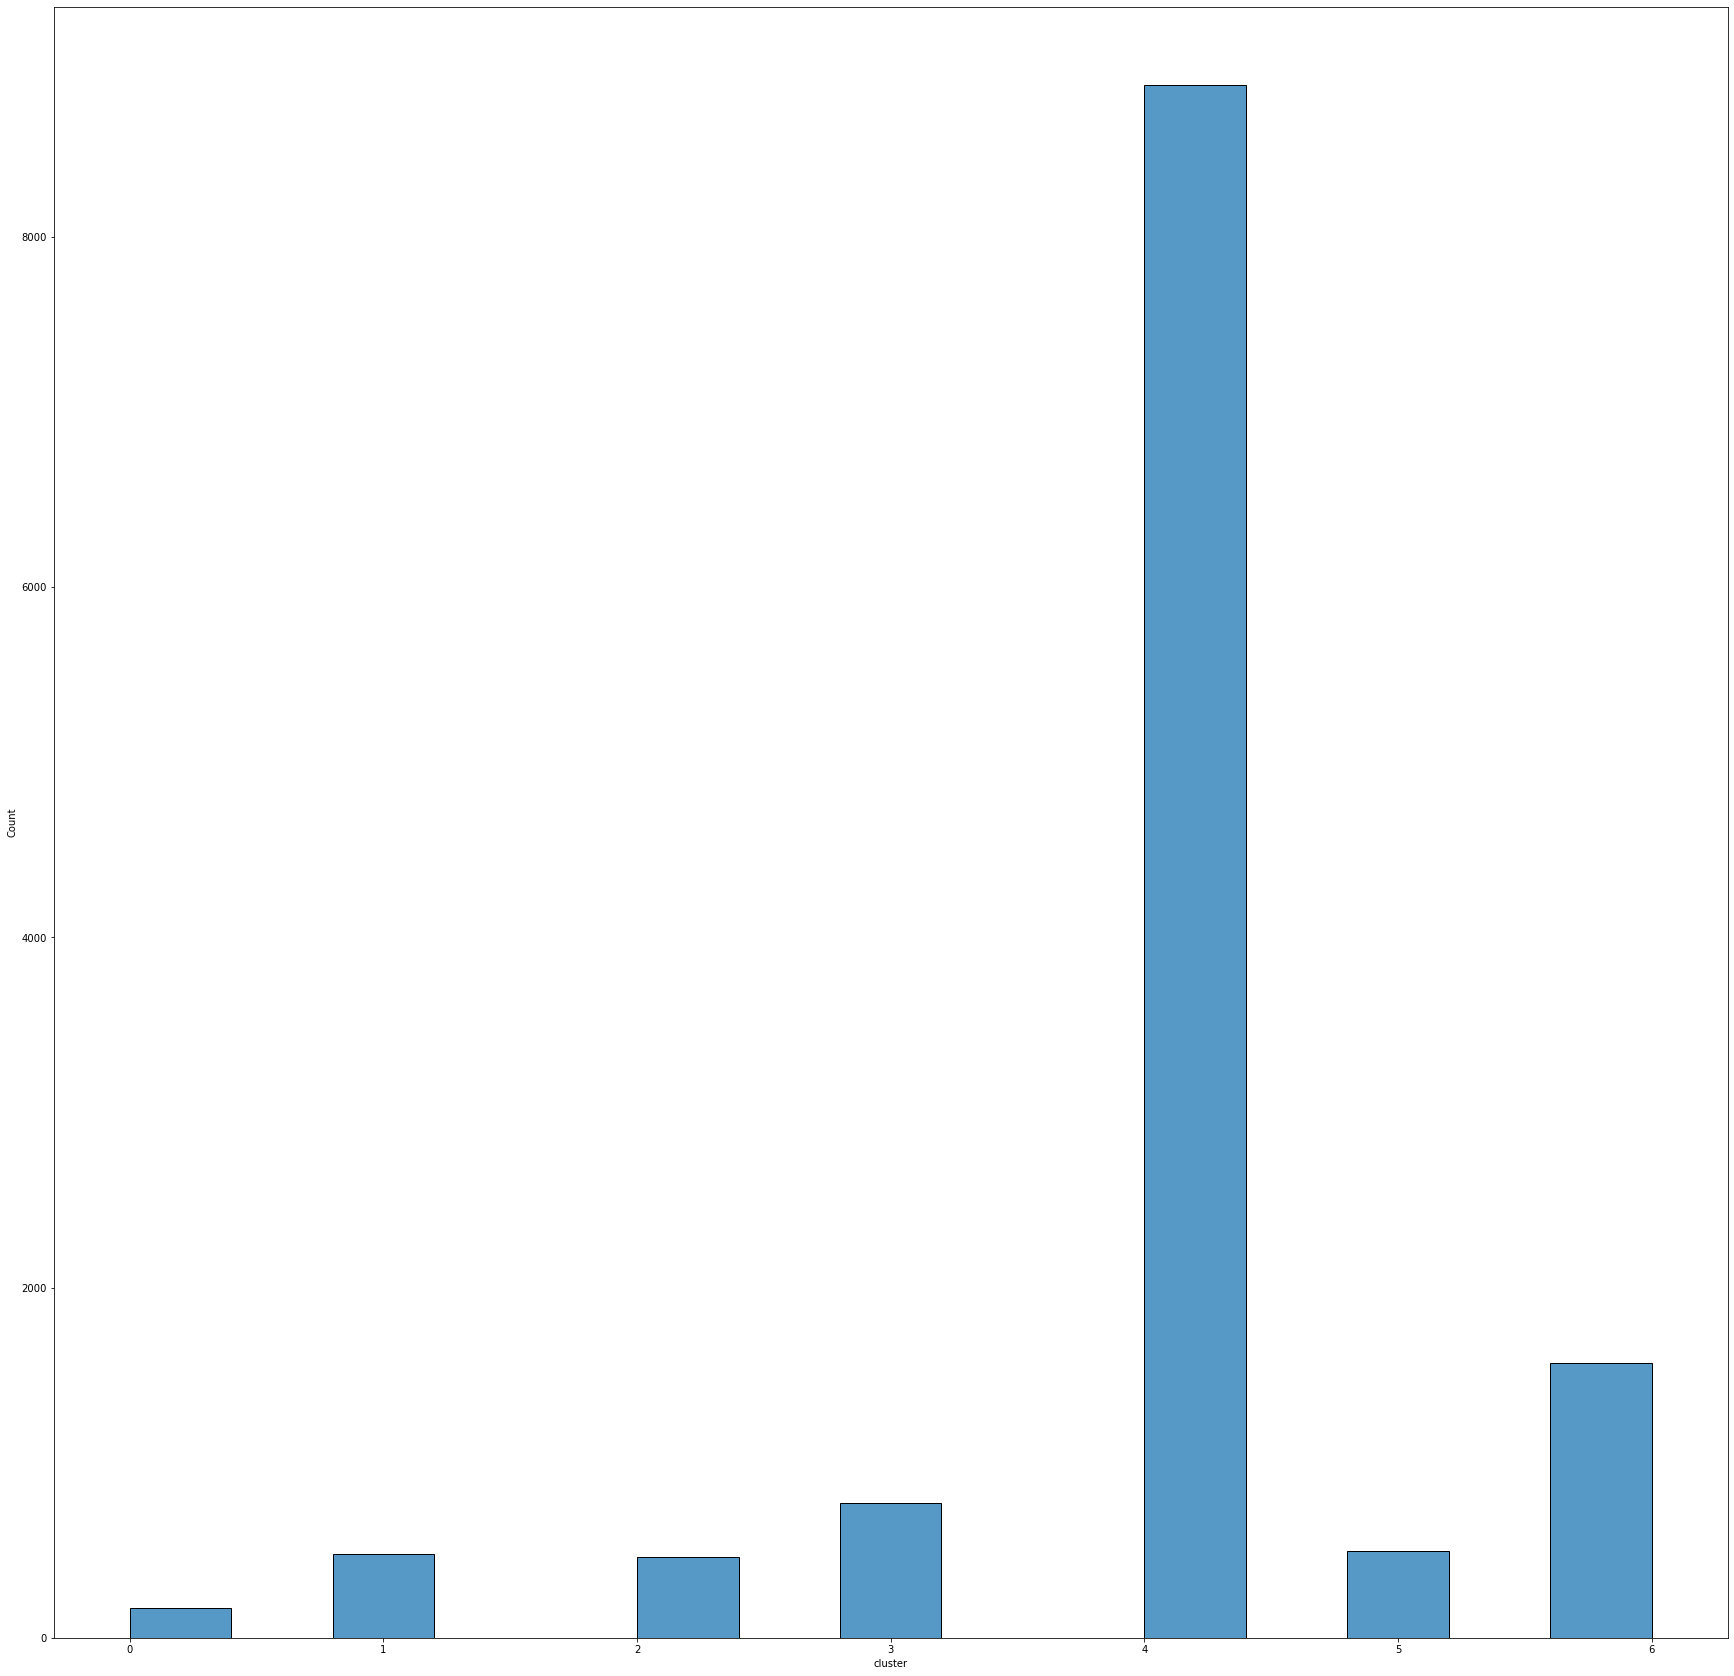

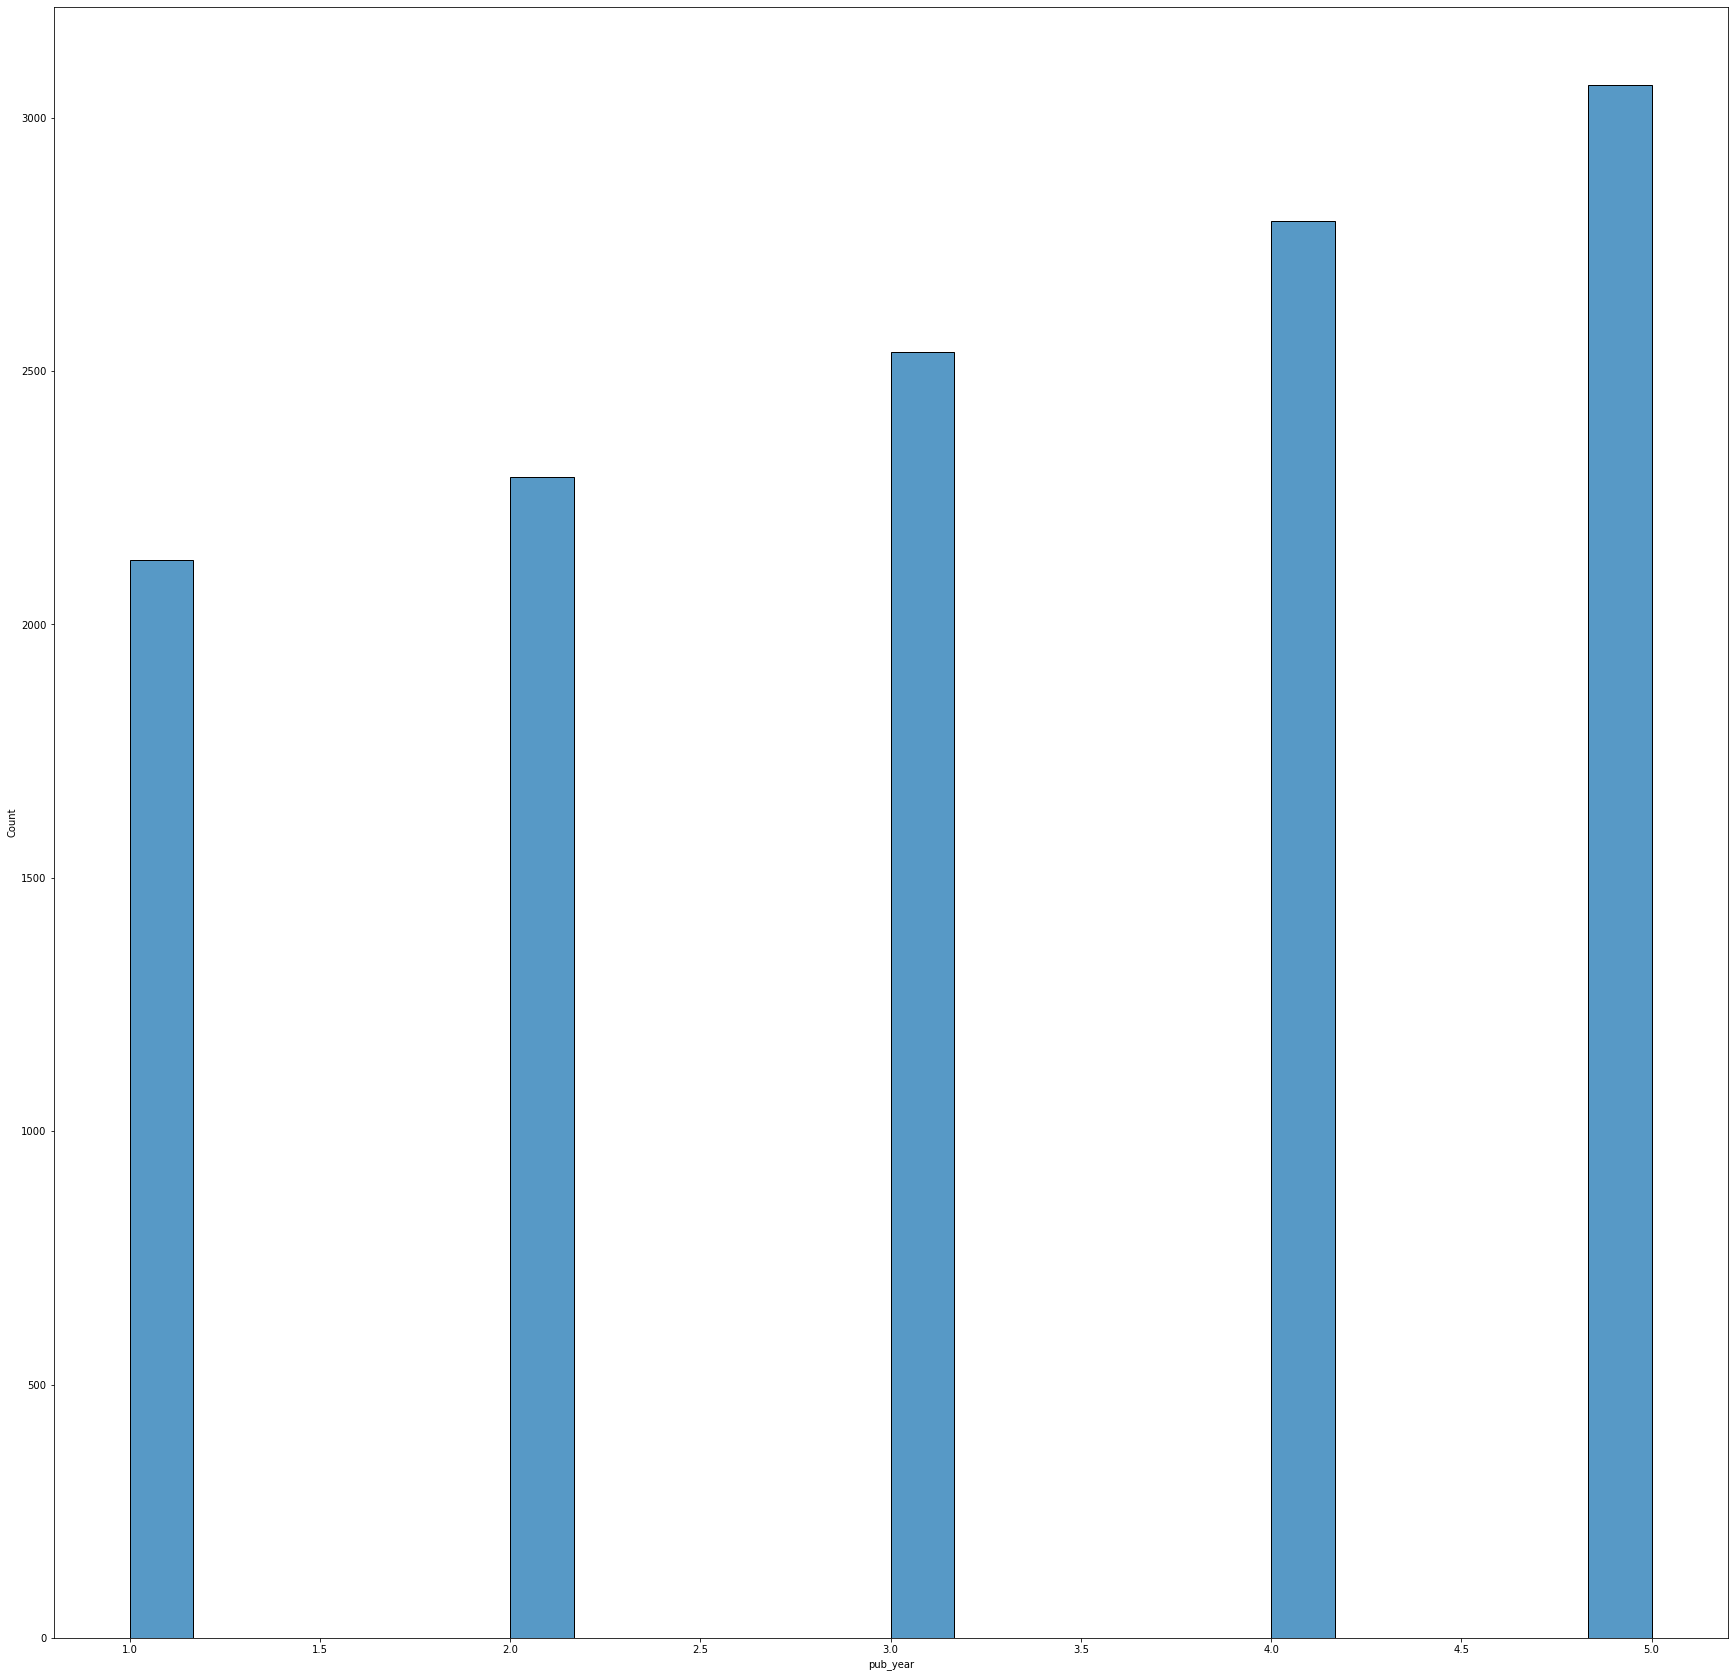

In [88]:
def plot(df):
    for column in data_ea:
        plt.figure(figsize=(30,30))
        sns.histplot(data_ea[column])
        plt.show()
plot(data_ea)

## Pivot Tables

In [114]:
pd.set_option('display.max_columns',None)

In [115]:
data_ea.pivot_table(index= ['pub_year'],columns=['section_name'])

cluster                                             \
section_name      Arts     Books  Briefing Business Day   Climate   
pub_year                                                            
1             3.851240  3.850000  4.552553     3.932836  3.976190   
2             3.823529  3.770833  4.949324     3.905405  3.875000   
3             3.849673  3.796610  4.359551     3.961538  3.931034   
4             3.816667  3.769231  5.015823     4.503401  3.971429   
5             3.895706  3.870968  5.036688     4.361702  3.956522   

                                                                              \
section_name Fashion&Style      Food    Health  Magazine    Movies  New York   
pub_year                                                                       
1                 4.000000  3.411765  3.882353  3.960000  3.981132  3.666667   
2                 3.916667  3.968750  3.882353  3.958333  3.937500  3.714286   
3                 3.969697  3.823529  3.953488  3.954545  4.000000  3.894737   
4                 4.000000  3.833333  4.000000  3.906250  4.000000  3.869565   
5                 3.964286  3.849057  3.900000  3.952381  3.894737  3.512195   

                                                                           \
section_name      Obit   Opinion   Science    Sports     Style T Magazine   
pub_year                                                                    
1             3.500000  3.979381  3.928571  3.365439  3.928571   3.880000   
2             4.000000  3.960396  3.901639  3.268293  3.920000   3.888889   
3             4.000000  3.977612  3.947368  2.872340  3.958333   3.812500   
4             3.967742  3.977941  3.964286  3.284457  3.923077   3.920000   
5             3.920000  3.923567  3.963636  3.296073  3.829268   3.857143   

                                                                            \
section_name Technology The Learning Network   Theater    Travel      U.S.   
pub_year                                                                     
1              3.916667             4.000000  3.785714  3.916667  3.738095   
2              3.931818             3.941176  3.952381  4.000000  2.467066   
3              3.969697             3.956522  4.000000  3.893617  2.919708   
4              3.931818             4.000000  3.969697  3.864407  3.945946   
5              3.736842             3.916667  3.642857  3.860000  3.945055   

                                               month                      \
section_name      Well     World    others      Arts     Books  Briefing   
pub_year                                                                   
1             3.941176  3.882883  3.983333  6.727273  6.900000  5.528529   
2             3.894737  3.857430  3.927536  7.042017  6.812500  6.405405   
3             4.000000  3.864504  3.958333  5.679739  6.186441  5.919101   
4             4.000000  3.843813  3.920000  6.300000  6.423077  6.281646   
5             4.000000  3.897770  3.810526  6.822086  5.870968  6.374214   

                                                                       \
section_name Business Day   Climate Fashion&Style      Food    Health   
pub_year                                                                
1                6.567164  6.642857      6.533333  6.323529  6.941176   
2                6.567568  7.225000      8.083333  6.656250  6.705882   
3                5.608974  6.241379      6.787879  6.607843  5.488372   
4                6.632653  7.885714      7.087719  6.066667  5.440000   
5                5.921986  6.304348      6.178571  6.622642  7.000000   

                                                                          \
section_name  Magazine    Movies  New York      Obit   Opinion   Science   
pub_year                                                                   
1             6.840000  6.471698  6.266667  7.000000  6.030928  6.696429   
2             5.208333  6.187500  7.142857  6.142857  7.257426  6.098361   
3    

In [117]:
data_ea.pivot_table(index= ['section_name'],columns=['pub_year'])

cluster                                          \
pub_year                     1         2         3         4         5   
section_name                                                             
Arts                  3.851240  3.823529  3.849673  3.816667  3.895706   
Books                 3.850000  3.770833  3.796610  3.769231  3.870968   
Briefing              4.552553  4.949324  4.359551  5.015823  5.036688   
Business Day          3.932836  3.905405  3.961538  4.503401  4.361702   
Climate               3.976190  3.875000  3.931034  3.971429  3.956522   
Fashion&Style         4.000000  3.916667  3.969697  4.000000  3.964286   
Food                  3.411765  3.968750  3.823529  3.833333  3.849057   
Health                3.882353  3.882353  3.953488  4.000000  3.900000   
Magazine              3.960000  3.958333  3.954545  3.906250  3.952381   
Movies                3.981132  3.937500  4.000000  4.000000  3.894737   
New York              3.666667  3.714286  3.894737  3.869565  3.512195   
Obit                  3.500000  4.000000  4.000000  3.967742  3.920000   
Opinion               3.979381  3.960396  3.977612  3.977941  3.923567   
Science               3.928571  3.901639  3.947368  3.964286  3.963636   
Sports                3.365439  3.268293  2.872340  3.284457  3.296073   
Style                 3.928571  3.920000  3.958333  3.923077  3.829268   
T Magazine            3.880000  3.888889  3.812500  3.920000  3.857143   
Technology            3.916667  3.931818  3.969697  3.931818  3.736842   
The Learning Network  4.000000  3.941176  3.956522  4.000000  3.916667   
Theater               3.785714  3.952381  4.000000  3.969697  3.642857   
Travel                3.916667  4.000000  3.893617  3.864407  3.860000   
U.S.                  3.738095  2.467066  2.919708  3.945946  3.945055   
Well                  3.941176  3.894737  4.000000  4.000000  4.000000   
World                 3.882883  3.857430  3.864504  3.843813  3.897770   
others                3.983333  3.927536  3.958333  3.920000  3.810526   

                         month                                          \
pub_year                     1         2         3         4         5   
section_name                                                             
Arts                  6.727273  7.042017  5.679739  6.300000  6.822086   
Books                 6.900000  6.812500  6.186441  6.423077  5.870968   
Briefing              5.528529  6.405405  5.919101  6.281646  6.374214   
Business Day          6.567164  6.567568  5.608974  6.632653  5.921986   
Climate               6.642857  7.225000  6.241379  7.885714  6.304348   
Fashion&Style         6.533333  8.083333  6.787879  7.087719  6.178571   
Food                  6.323529  6.656250  6.607843  6.066667  6.622642   
Health                6.941176  6.705882  5.488372  5.440000  7.000000   
Magazine              6.840000  5.208333  5.272727  5.687500  6.380952   
Movies                6.471698  6.187500  6.756098  6.617647  5.315789   
New York              6.266667  7.142857  7.052632  7.043478  7.048780   
Obit                  7.000000  6.142857  6.111111  5.870968  6.740000   
Opinion               6.030928  7.257426  5.679104  5.926471  6.636943   
Science               6.696429  6.098361  6.065789  6.607143  5.800000   
Sports                6.022663  6.295122  6.723404  6.137830  5.894260   
Style                 7.690476  6.200000  6.479167  6.480769  6.585366   
T Magazine            7.240000  5.888889  6.312500  6.400000  8.095238   
Technology            7.083333  6.318182  7.030303  5.840909  6.947368   
The Learning Network  3.857143  5.117647  5.173913  5.571429  5.541667   
Theater               6.571429  6.952381  5.235294  6.939394  6.642857   
Travel                5.583333  5.294118  5.680851  6.915254  7.160000   
U.S.                  6.345238  7.041916  6.423358  7.171171  6.714286   
Well                  6.647059  6.631579  5.619048  6.916667  5.428571   
World                 6.34

In [118]:
data_ea.pivot_table(index= ['news_desk'],columns=['pub_year'])

cluster                                             month  \
pub_year                1         2         3         4         5         1   
news_desk                                                                     
Arts&Leisure     3.843750  4.000000  3.868421  3.808511  3.928571  7.093750   
BookReview       3.900000  3.761905  3.777778  3.743590  3.846154  6.566667   
Business         3.926174  3.911392  3.967532  4.411429  4.291391  6.657718   
Climate          3.973684  3.918919  3.923077  3.965517  3.952381  6.263158   
Culture          3.855856  3.923913  3.909836  3.858108  3.872000  6.153153   
Dining           3.457143  3.966667  3.820000  3.833333  3.849057  6.314286   
Express          3.894737  3.888889  3.805556  3.886364  4.352941  6.921053   
Foreign          3.871429  3.915521  3.862423  3.838710  3.895954  6.328571   
Magazine         3.960000  3.958333  3.952381  3.909091  3.954545  6.840000   
NYTNow           4.492447  4.030864  4.147186  5.020734  5.038339  5.540785   
Natural          4.000000  3.894737  3.600000  3.931034  4.000000  7.095238   
Obits            3.958333  3.905660  4.000000  3.900000  3.914894  6.916667   
OpEd             3.978261  3.964706  3.991453  3.974359  3.942029  6.152174   
Science          3.903614  3.887640  3.945455  3.974026  3.945205  6.795181   
SpecialSections  3.986486  3.750000  3.780000  3.760000  3.648649  7.959459   
Sports           3.276316  3.217742  2.786290  3.226027  3.257840  5.779605   
Styles           3.923077  3.921569  3.965517  3.941176  3.921569  7.769231   
TStyle           3.880000  3.888889  3.812500  3.920000  3.857143  7.240000   
Travel           3.913043  4.000000  3.886364  3.866667  3.851064  5.521739   
Washington       3.961538  3.970588  3.895833  3.925926  3.955556  6.250000   
Weekend          3.914286  3.827586  3.911765  3.963636  3.808511  6.457143   
Well             3.941176  3.882353  4.000000  4.000000  4.000000  6.647059   
others           3.933962  3.830986  3.787879  3.962617  3.793427  5.594340   

                                                          word_count  \
pub_year                2         3         4         5            1   
news_desk                                                              
Arts&Leisure     6.137931  5.552632  6.659574  6.535714  2328.812500   
BookReview       6.785714  6.222222  6.256410  5.788462  1080.666667   
Business         6.569620  5.824675  6.285714  5.933775  1199.322148   
Climate          7.243243  6.500000  8.206897  6.333333  1196.631579   
Culture          6.967391  5.754098  6.405405  6.736000  1137.018018   
Dining           6.800000  6.640000  6.066667  6.622642  1185.285714   
Express          7.472222  6.722222  6.727273  7.705882   742.000000   
Foreign          6.491159  6.383984  6.187097  6.364162  1024.485714   
Magazine         5.208333  5.142857  5.636364  6.227273  5780.120000   
NYTNow           6.679012  6.000000  6.269537  6.374867  1303.404834   
Natural          7.578947  6.450000  6.724138  6.906250  1349.047619   
Obits            6.698113  6.866667  6.075000  6.617021  1227.187500   
OpEd             6.917647  5.461538  5.914530  6.644928  2550.989130   
Science          6.426966  5.772727  6.233766  5.917808  1201.614458   
SpecialSections  8.211538  7.000000  7.346667  7.378378  1183.310811   
Sports           6.155914  6.423387  5.941781  5.613240  1196.901316   
Styles           5.960784  6.534483  6.411765  6.313725  1374.128205   
TStyle           5.888889  6.312500  6.400000  8.095238  1734.960000   
Travel           5.333333  5.704545  6.833333  7.234043  1827.434783   
Washington       6.985294  6.166667  7.166667  6.244444  1398.961538   
Weekend          7.586207  5.852941  6.472727  6.127660   874.600000   
Well             6.823529  5.619048  7.043478  5.833333  1436.411765   
others           6.338028  6.398268  6.607477  6.469484  1466.905660   

                                                                     \
pub_year           

In [119]:
data_ea.pivot_table(index= ['keyword1'],columns=['pub_year'])

cluster                                          \
pub_year                          1         2         3         4         5   
keyword1                                                                      
Australia                  4.015385  4.000000  3.914286  3.976744  3.966102   
China                      4.375000  4.026316  3.971429  3.954545  3.800000   
Covid                      2.971429  3.485981  3.550432       NaN  4.000000   
Culture                    3.861314  3.791667  3.855346  3.847826  3.822660   
Global Warming             3.964286  3.939394  3.969697  3.966667  3.944444   
None                       4.629956  4.135359  4.286316  4.952527  4.979021   
Politics and Government    4.176471  4.220000  3.944444  3.962963  3.923077   
Tennis                     3.120603  2.541176  2.067568  2.962766  2.883838   
Travel and Vacations       3.733333  4.000000  3.875000  3.871795  3.764706   
US politics and relations  4.136364  4.000000  4.000000  3.947368  4.120000   
others                     3.922957  3.872226  3.902138  3.940453  3.933426   

                              month                                          \
pub_year                          1         2         3         4         5   
keyword1                                                                      
Australia                  6.107692  6.954545  5.942857  5.488372  6.711864   
China                      7.208333  6.368421  6.885714  6.136364  7.550000   
Covid                      5.900000  6.831776  5.247839       NaN  2.000000   
Culture                    5.912409  6.675000  6.081761  6.461957  6.339901   
Global Warming             7.500000  8.393939  5.393939  7.433333  7.388889   
None                       5.370044  6.483425  5.888421  6.283308  6.388611   
Politics and Government    5.764706  6.860000  6.277778  6.500000  7.128205   
Tennis                     5.668342  5.505882  6.452703  5.638298  5.656566   
Travel and Vacations       4.866667  7.250000  5.718750  6.692308  7.352941   
US politics and relations  6.636364  6.933333  5.954545  8.078947  6.960000   
others                     6.535409  6.618975  6.540296  6.377346  6.337725   

                            word_count                                         \
pub_year                             1            2            3            4   
keyword1                                                                        
Australia                   989.446154  1056.060606  1101.114286  1238.395349   
China                      1216.041667  1265.289474  1248.942857  1367.590909   
Covid                      1157.914286  1339.467290  2687.291066          NaN   
Culture                    1227.109489  1315.075000  1171.553459  1154.130435   
Global Warming             1156.214286  1473.333333   946.696970  1081.333333   
None                       1144.312775  1384.243094  1330.328421  1276.056662   
Politics and Government    1135.000000  1149.080000  1417.277778  1074.777778   
Tennis                     1156.341709  1119.023529  1099.310811  1070.175532   
Travel and Vacations       1855.866667  1973.375000  1601.375000  1375.282051   
US politics and relations  1281.045455  1435.933333  1180.590909  1072.815789   
others                     1432.574319  1229.520275  1244.250000  1256.370227   

                                               year                            \
pub_year                             5            1            2            3   
keyword1                                                                        
Australia                   805.203390  2021.815385  2020.818182  2019.857143   
China                      1152.050000  2021.750000  2020.868421  2019.800000   
Covid                       659.000000  2021.714286  2020.747664  2020.000000   
Culture                    1124.586207  2021.883212  2020.791667  2019.836478   
Global Warming             1291.555556  2021.678571  2020.787879  2019.818182   
None                       1264

In [120]:
data_ea.pivot_table(index= ['keyword2'],columns=['pub_year'])

cluster                                          \
pub_year                          1         2         3         4         5   
keyword2                                                                      
Australia                  3.925926  4.192308  3.945946  3.972973  3.897959   
China                      4.444444  4.052632  3.969697  4.100000  4.000000   
Covid                      3.793103  3.628378  3.793103  4.000000  3.750000   
Culture                    3.866667  3.725490  3.847458  3.685185  3.800000   
Global Warming             3.972973  3.888889  3.857143  4.000000  3.900000   
None                       4.429658  4.006466  4.007645  4.854620  4.918970   
Politics and Government    4.111111  4.000000  3.793103  3.967742  3.857143   
Tennis                     2.921569  2.449275  1.743363  2.626667  2.564286   
Travel and Vacations       3.900000  3.428571  3.764706  3.857143  3.923077   
US politics and relations  4.148148  4.030303  4.000000  4.000000  3.769231   
others                     3.897578  3.883842  3.888812  3.936295  3.928743   

                              month                                           \
pub_year                          1         2         3          4         5   
keyword2                                                                       
Australia                  5.222222  7.500000  4.162162   6.000000  5.795918   
China                      5.166667  7.473684  4.545455   5.750000  6.526316   
Covid                      4.689655  6.736486  5.086207  11.000000  5.000000   
Culture                    7.555556  6.960784  6.186441   5.944444  6.440000   
Global Warming             7.432432  7.370370  5.809524   7.428571  6.900000   
None                       5.600760  6.536638  5.990826   6.338315  6.371783   
Politics and Government    6.177778  6.942857  5.379310   6.580645  5.828571   
Tennis                     5.222222  5.449275  6.212389   5.373333  5.800000   
Travel and Vacations       7.500000  5.428571  6.294118   6.928571  5.307692   
US politics and relations  6.851852  7.333333  7.000000   6.666667  5.923077   
others                     6.489965  6.594937  6.432245   6.418469  6.441317   

                            word_count                                         \
pub_year                             1            2            3            4   
keyword2                                                                        
Australia                  1055.925926   896.115385   943.972973   966.594595   
China                      1441.000000  2045.368421  1601.272727  1319.350000   
Covid                      1124.034483  1143.290541  1429.198276  1157.000000   
Culture                    1733.288889  1316.568627  1187.457627  1102.296296   
Global Warming             1291.702703  1459.111111  1062.476190  1690.428571   
None                       1243.064639  1193.230603  1906.891437  1316.751359   
Politics and Government    1182.000000  1244.000000  1255.413793  1144.354839   
Tennis                     1169.150327  1109.094203  1102.964602  1052.306667   
Travel and Vacations       1270.900000  1477.571429  1232.411765  1348.214286   
US politics and relations  1266.000000  1302.242424  1656.050000  1330.259259   
others                     1368.334948  1296.116902  1292.537874  1222.227937   

                                               year                            \
pub_year                             5            1            2            3   
keyword2                                                                        
Australia                   906.551020  2021.888889  2020.846154  2019.918919   
China                      1205.263158  2021.833333  2020.736842  2020.000000   
Covid                       851.500000  2021.793103  2020.817568  2019.991379   
Culture                    1139.300000  2021.711111  2020.862745  2019.779661   
Global Warming              981.800000  2021.702703  2020.962963  2019.714286   
None             

In [121]:
data_ea.pivot_table(index= ['keyword3'],columns=['pub_year'])

cluster                                          \
pub_year                          1         2         3         4         5   
keyword3                                                                      
Australia                  3.903226  3.857143  3.923077  3.847826  3.933333   
China                      4.111111  4.666667  3.928571  3.954545  3.904762   
Covid                      3.471698  3.628319  3.837838  4.000000  4.000000   
Culture                    3.833333  3.791667  3.952381  3.782609  3.900000   
Global Warming             3.880000  3.952381  3.950000  3.937500  4.000000   
None                       4.302395  3.978846  3.957300  4.769976  4.783375   
Politics and Government    3.968750  3.902439  3.954545  3.846154  3.950000   
Tennis                     3.314286  2.452830  2.363636  2.600000  3.000000   
Travel and Vacations       3.833333  4.000000  3.812500  4.000000  4.000000   
US politics and relations  4.000000  4.025000  3.923077  4.031250  4.033333   
others                     3.856771  3.799169  3.773756  3.843216  3.832930   

                              month                                          \
pub_year                          1         2         3         4         5   
keyword3                                                                      
Australia                  5.129032  6.892857  5.333333  6.521739  6.826667   
China                      7.444444  7.000000  6.000000  6.863636  5.476190   
Covid                      5.415094  6.371681  5.121622  5.000000  4.000000   
Culture                    6.277778  7.416667  5.666667  7.434783  6.200000   
Global Warming             6.840000  8.047619  4.500000  7.562500  7.071429   
None                       5.706587  6.567308  6.084022  6.326877  6.386230   
Politics and Government    6.781250  7.560976  5.227273  6.346154  6.100000   
Tennis                     5.528571  5.113208  6.393939  5.485714  6.363636   
Travel and Vacations       6.666667  2.000000  5.062500  7.307692  8.666667   
US politics and relations  6.000000  6.800000  6.076923  7.156250  6.100000   
others                     6.430990  6.576177  6.333549  6.301596  6.334140   

                            word_count                                         \
pub_year                             1            2            3            4   
keyword3                                                                        
Australia                   910.225806   925.750000  1201.512821  1034.630435   
China                      1145.777778   923.333333  1312.214286  1221.318182   
Covid                      1097.528302  1190.601770  1506.459459   540.000000   
Culture                    1517.888889  1568.458333  1388.952381  1360.565217   
Global Warming             1681.000000  1297.000000   961.200000  1356.625000   
None                       1447.631737  1176.876923  1830.340220  1286.891041   
Politics and Government    1256.343750  1531.975610  1186.500000  1118.538462   
Tennis                     1169.342857  1107.471698  1198.575758  1069.400000   
Travel and Vacations       1362.166667  1708.750000  1216.937500  1796.923077   
US politics and relations  1667.857143  1349.925000  1479.923077  1279.375000   
others                     1318.639323  1287.909280  1286.734971  1216.228620   

                                               year                            \
pub_year                             5            1            2            3   
keyword3                                                                        
Australia                   947.333333  2021.903226  2020.821429  2019.897436   
China                      1144.333333  2021.666667  2021.000000  2019.928571   
Covid                       830.000000  2021.716981  2020.867257  2019.986486   
Culture                    1301.300000  2021.888889  2020.708333  2019.857143   
Global Warming             1043.285714  2021.880000  2020.809524  2019.850000   
None                       1232

## Heatmap

### Creating DF without column 'headline' and 'pub_date'

In [90]:
data_ea2 = data_ea.drop(['headline', 'pub_date'], axis=1)

In [93]:
data_ea2.head()

source   keyword1   keyword2   keyword3 news_desk  section_name  \
0    NYT  Australia     others     others   Foreign         World   
1    NYT     others     others  Australia   Foreign         World   
2    NYT     others     others     others   Foreign         World   
3    NYT     others  Australia     others  Business  Business Day   
4    NYT  Australia     others     others   Foreign         World   

  type_of_material  word_count  month  year  cluster  pub_year  
0             News        1321     10  2022        4         1  
1             News         910     10  2022        4         1  
2             News        1054     10  2022        4         1  
3             News        1165     10  2022        3         1  
4             News         395     10  2022        4         1

### Num-Cat-Split - Encoding - Standardizing (with df 'data_ea2')

In [96]:
data_ea2.dtypes

source              object
keyword1            object
keyword2            object
keyword3            object
news_desk           object
section_name        object
type_of_material    object
word_count           int64
month                int64
year                 int64
cluster              int64
pub_year             int64
dtype: object

In [97]:
data_ea2_num = data_ea2.select_dtypes(np.number)
data_ea2_cat= data_ea2.select_dtypes(object)

In [100]:
data_ea2_num.head()
data_ea2_cat.head()

source   keyword1   keyword2   keyword3 news_desk  section_name  \
0    NYT  Australia     others     others   Foreign         World   
1    NYT     others     others  Australia   Foreign         World   
2    NYT     others     others     others   Foreign         World   
3    NYT     others  Australia     others  Business  Business Day   
4    NYT  Australia     others     others   Foreign         World   

  type_of_material  
0             News  
1             News  
2             News  
3             News  
4             News

In [ ]:
# Encoding categorical columns:

In [101]:
from sklearn.preprocessing import OneHotEncoder

In [102]:
encoder = OneHotEncoder(drop='first').fit(data_ea2_cat)
data_ea2_cat_enc = encoder.transform(data_ea2_cat).toarray()

cols = encoder.get_feature_names_out(input_features=data_ea2_cat.columns)
cols

data_ea2_cat_enc = pd.DataFrame(data_ea2_cat_enc, columns=cols)

In [103]:
data_ea2_cat_enc.head()

source_NYT  keyword1_China  keyword1_Covid  keyword1_Culture  \
0         1.0             0.0             0.0               0.0   
1         1.0             0.0             0.0               0.0   
2         1.0             0.0             0.0               0.0   
3         1.0             0.0             0.0               0.0   
4         1.0             0.0             0.0               0.0   

   keyword1_Global Warming  keyword1_None  keyword1_Politics and Government  \
0                      0.0            0.0                               0.0   
1                      0.0            0.0                               0.0   
2                      0.0            0.0                               0.0   
3                      0.0            0.0                               0.0   
4                      0.0            0.0                               0.0   

   keyword1_Tennis  keyword1_Travel and Vacations  \
0              0.0                            0.0   
1              0.0                            0.0   
2              0.0                            0.0   
3              0.0                            0.0   
4              0.0                            0.0   

   keyword1_US politics and relations  ...  section_name_Travel  \
0                                 0.0  ...                  0.0   
1                                 0.0  ...                  0.0   
2                                 0.0  ...                  0.0   
3                                 0.0  ...                  0.0   
4                                 0.0  ...                  0.0   

   section_name_U.S.  section_name_Well  section_name_World  \
0                0.0                0.0                 1.0   
1                0.0                0.0                 1.0   
2                0.0                0.0                 1.0   
3                0.0                0.0                 0.0   
4                0.0                0.0                 1.0   

   section_name_others  type_of_material_News  type_of_material_Obit  \
0                  0.0                    1.0                    0.0   
1                  0.0                    1.0                    0.0   
2                  0.0                    1.0                    0.0   
3                  0.0                    1.0                    0.0   
4                  0.0                    1.0                    0.0   

   type_of_material_OpEd  type_of_material_Review  type_of_material_others  
0                    0.0                      0.0                      0.0  
1                    0.0                      0.0                      0.0  
2                    0.0                      0.0                      0.0  
3                    0.0                      0.0                      0.0  
4                    0.0                      0.0                      0.0  

[5 rows x 82 columns]

In [ ]:
# Standardizing numerical columns:

In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
transformer = StandardScaler().fit(data_ea2_num)
data_ea2_num_stand = transformer.transform(data_ea2_num)

cols = transformer.get_feature_names_out(input_features=data_ea2_num.columns)
cols


data_ea2_num_stand=pd.DataFrame(data_ea2_num_stand, columns=cols)

In [106]:
data_ea2_num_stand.head()

word_count     month      year   cluster  pub_year
0    0.031213  1.056374  1.615325  0.013079 -1.552081
1   -0.372869  1.056374  1.615325  0.013079 -1.552081
2   -0.231293  1.056374  1.615325  0.013079 -1.552081
3   -0.122161  1.056374  1.615325 -0.869243 -1.552081
4   -0.879202  1.056374  1.615325  0.013079 -1.552081

In [ ]:
# Concatinating numericals and categoricals back together:

In [107]:
data_ea2_processed = pd.concat([data_ea2_cat_enc,data_ea2_num_stand],axis=1)

In [108]:
data_ea2_processed.head()

source_NYT  keyword1_China  keyword1_Covid  keyword1_Culture  \
0         1.0             0.0             0.0               0.0   
1         1.0             0.0             0.0               0.0   
2         1.0             0.0             0.0               0.0   
3         1.0             0.0             0.0               0.0   
4         1.0             0.0             0.0               0.0   

   keyword1_Global Warming  keyword1_None  keyword1_Politics and Government  \
0                      0.0            0.0                               0.0   
1                      0.0            0.0                               0.0   
2                      0.0            0.0                               0.0   
3                      0.0            0.0                               0.0   
4                      0.0            0.0                               0.0   

   keyword1_Tennis  keyword1_Travel and Vacations  \
0              0.0                            0.0   
1              0.0                            0.0   
2              0.0                            0.0   
3              0.0                            0.0   
4              0.0                            0.0   

   keyword1_US politics and relations  ...  type_of_material_News  \
0                                 0.0  ...                    1.0   
1                                 0.0  ...                    1.0   
2                                 0.0  ...                    1.0   
3                                 0.0  ...                    1.0   
4                                 0.0  ...                    1.0   

   type_of_material_Obit  type_of_material_OpEd  type_of_material_Review  \
0                    0.0                    0.0                      0.0   
1                    0.0                    0.0                      0.0   
2                    0.0                    0.0                      0.0   
3                    0.0                    0.0                      0.0   
4                    0.0                    0.0                      0.0   

   type_of_material_others  word_count     month      year   cluster  pub_year  
0                      0.0    0.031213  1.056374  1.615325  0.013079 -1.552081  
1                      0.0   -0.372869  1.056374  1.615325  0.013079 -1.552081  
2                      0.0   -0.231293  1.056374  1.615325  0.013079 -1.552081  
3                      0.0   -0.122161  1.056374  1.615325 -0.869243 -1.552081  
4                      0.0   -0.879202  1.056374  1.615325  0.013079 -1.552081  

[5 rows x 87 columns]

## Heatmap

In [110]:
correlations_matrix = data_ea2_processed.corr()
#plt.rcParams["figure.figsize"] = (300,300)
#plt.figure(figsize=(300,300))
sns.set(rc = {'figure.figsize':(200,200)})
sns.heatmap(correlations_matrix, annot=True)
plt.show()

## Renaming some values to gain more clarity

### values in column 'cluster':

In [137]:
def renameCluster(x):
    if x == 0:
        return '0_Covid'
    elif x == 1:
        return '1_Tennis'    
    elif x == 2:
        return '2_WednesdayBriefing' 
    elif x == 3:
        return '3_Oceania&Culture'   
    elif x == 4:
        return '4_Various'
    elif x == 5:
        return '5_FridayBriefing'    
    else:
        return '6_otherBriefings'

In [138]:
data_ea['cluster'] = list(map(renameCluster, data_ea['cluster']))

In [136]:
data_ea['cluster'].value_counts(dropna=False)

4    8869
6    1570
3     770
5     494
1     480
2     463
0     172
Name: cluster, dtype: int64

### values in column 'pub_year':

In [140]:
data_ea['pub_year'].value_counts(dropna=False)

5    3065
4    2796
3    2538
2    2291
1    2128
Name: pub_year, dtype: int64

In [141]:
def renamePubYear(x):
    if x == 5:
        return '2017/2018'
    elif x == 4:
        return '2018/2019'    
    elif x == 3:
        return '2019/2020' 
    elif x == 2:
        return '2020/2021'       
    else:
        return '2021/2022'

In [142]:
data_ea['pub_year'] = list(map(renamePubYear, data_ea['pub_year']))

In [143]:
data_ea['pub_year'].value_counts(dropna=False)

2017/2018    3065
2018/2019    2796
2019/2020    2538
2020/2021    2291
2021/2022    2128
Name: pub_year, dtype: int64

In [144]:
data_ea.head()

source                                           headline   keyword1  \
0    NYT       Tensions Over Racism Rock Australian Netball  Australia   
1    NYT  After Years of ‘Hell’ in ISIS Detention Camp, ...     others   
2    NYT          How Australia Fell Behind on Data Privacy     others   
3    NYT  New Crack in Apple’s Armor as Dozens Strike at...     others   
4    NYT  Rising Waters Again Force Evacuations and Spre...  Australia   

    keyword2   keyword3   pub_date news_desk  section_name type_of_material  \
0     others     others 2022-10-30   Foreign         World             News   
1     others  Australia 2022-10-29   Foreign         World             News   
2     others     others 2022-10-21   Foreign         World             News   
3  Australia     others 2022-10-18  Business  Business Day             News   
4     others     others 2022-10-15   Foreign         World             News   

   word_count  month  year            cluster   pub_year  
0        1321     10  2022          4_Various  2021/2022  
1         910     10  2022          4_Various  2021/2022  
2        1054     10  2022          4_Various  2021/2022  
3        1165     10  2022  3_Oceania&Culture  2021/2022  
4         395     10  2022          4_Various  2021/2022

## Saving df as csv: 

In [145]:
data_ea.to_csv('NYT_Australia_articles_EA.csv', index=False)

In [146]:
data_ea.shape

(12818, 14)